In [1]:
# import ants
import tifffile
import numpy as np
import os
import cv2
import json
import time
from matplotlib import gridspec
from PIL import Image
import math
import pandas as pd
from numba import jit
import pickle
from skimage import io, morphology

# import seaborn as sns
from scipy import stats
import gc
from tifffile import TiffFile
from skimage import io
import tifffile
from scipy.ndimage import zoom
import traceback
import gzip
import shutil
from matplotlib.colors import LinearSegmentedColormap
# from colorspacious import cspace_convert
import cfospy
%matplotlib inline
import matplotlib.pyplot as plt

from multiprocessing import Pool
plt.gray()

import json, os.path, os, re, time
# import joblib
import subprocess as sp
# import nibabel as nib
import scipy.spatial
from scipy.signal import convolve
from matplotlib.colors import Normalize, LinearSegmentedColormap, BoundaryNorm, ListedColormap, hsv_to_rgb, rgb_to_hsv
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches
from PIL import Image

from matplotlib.colors import LinearSegmentedColormap
# from colorspacious import cspace_convert

/mnt/gpu_data/data1/kinoshita


<Figure size 640x480 with 0 Axes>

In [6]:

    


import math
def rad2ph(rad):
#     return (int((2*np.pi+rad)*180/np.pi*24/360),  int((rad)*180/np.pi*24/360))[rad>=0]
    if math.isnan(rad):
        return np.nan
    else:
        return (round((2*np.pi+rad)*180/np.pi*24/360, 1),  round((rad)*180/np.pi*24/360, 1))[rad>=0]
    
def calc_vb_CT(n, xmin, ymin, zmin, x_b_num, y_b_num, z_b_num, vb_r, mo, vx,  path):

    print(path)

#     moved_points_dir = savedir+exp+"/" + sample +"/" +"SYTOX-G/"+ants_dir_name +"/"

\
    df_cell = pd.read_pickle(path)


    vb_CT[:,n]= np.array([(len(df_cell[(df_cell["X(um)"]>=xmin*vx+x*mo*vx-int(vb_r*vx/2))&(df_cell["X(um)"]<xmin*vx+x*mo*vx+int(vb_r*vx/2))&(df_cell["Y(um)"]>=ymin*vx+y*mo*vx-int(vb_r*vx/2))&(df_cell["Y(um)"]<ymin*vx+y*mo*vx+int(vb_r*vx/2))&(df_cell["Z(um)"]>=zmin*vx+z*mo*vx-int(vb_r*vx/2))&(df_cell["Z(um)"]<zmin*vx+z*mo*vx+int(vb_r*vx/2))])/len(df_cell)) for x in range(x_b_num) for y in range(y_b_num) for z in range(z_b_num)])



def check_x_axis_center(image_path):
    # read tif image
    img = Image.open(image_path)
   
    img_array = np.array(img)

   
    depth, height, width = img_array.shape

    mid_x = width // 2

    # get center slice
    center_slice = img_array[:, :, mid_x]

    # check whether 1 is included in center slice
    if np.any(center_slice == 1):
        return True
    else:
        return False

In [3]:
# cfos_fol="/mnt/data1/yamashitaData1/231012_circadian_2nd_Data1/231012_circadian_2nd_Reconst/"
# exp = "2nd"
pre_root = "/mnt/"

src = pre_root+"/gpu_data/data1/kinoshita/"
dst = pre_root+"/gpu_data/data8/kinoshita_cfos/"


cfos_fol = pre_root+ "/gpu_data/data1//yamashitaData1/230828circadian_Data1/230828circadian_1st_Reconst/"
exp = "1st"
savedir = dst + "/cfos_app/"

CT_li = np.arange(0,48,4)
sample_ids = np.arange(1,7,1)

reconsts = os.listdir(cfos_fol)
sample_names=[]
colors=[]
data_parent_paths=[]
data_moving_paths =[]

for CT in CT_li:
#     if CT<44:
#         continue
    for sample_id in sample_ids:
#         if sample_id >1:
#             continue
        sample = "CT"+str(CT)+"_"+str(sample_id).zfill(2)

        for reconst in reconsts:
#             sample_names.append(("_").join(reconst.split("_")[1:3]))

            if sample in reconst:
                sample_names.append(sample)
                for color in os.listdir(cfos_fol+reconst):
                    if "cfos" in color:
                        data_moving_paths.append(cfos_fol+reconst+"/"+color)
                    else:
                        data_parent_paths.append(cfos_fol+reconst+"/"+color)

print(len(data_parent_paths))   
print(len(data_moving_paths))
print(len(sample_names))

72
72
72


In [8]:
#load atlas data


vx=20
rdir = src + "/CUBIC_R_atlas_ver5_scn/"

ca=cfospy.analysis.read_atlas_data(rdir, vx)

print(len(ca.ID_all))


uni_IDs,rev_IDs = ca.get_uni_rIDs()

df_sum = ca.get_sum_temp(uni_IDs)
print(df_sum)
df_sum["rgb_triplet2"] = df_sum["rgb_triplet"].apply(lambda x:np.array(list(map(int, x.strip('[]').split(', '))))/255)



atlas_mask = ca.get_atlas_mask()

print(ca.x_num)

target_file = "CUBIC-R_Atlas.csv"



voxel_num: 565541900
837
region_num: 832
remove IDs: [485, 928, 917, 514, 760]
     Unnamed: 0   id    acronym                           node_name  \
2             2  567         CH                            Cerebrum   
3             3  688        CTX                     Cerebral cortex   
4             4  695      CTXpl                      Cortical plate   
5             5  315  Isocortex                           Isocortex   
6             6  184        FRP       Frontal pole, cerebral cortex   
..          ...  ...        ...                                 ...   
834         834  129         V3                     third ventricle   
835         835  140         AQ                   cerebral aqueduct   
836         836  145         V4                    fourth ventricle   
837         837  153        V4r                      lateral recess   
838         838  164          c  central canal, spinal cord/medulla   

     graph_order      rgb_triplet  
2              2  [176, 240, 255

In [9]:
center_regions = [830, 347, 4, 302, 31, 935, 48, 588, 972, 171, 44, 707, 714, 731, 484, 589, 597,  605,  19,  564, 609, 59, 571, 181, 56559, 189, 599, 30,118,223, 272,763, 126, 133, 338, 491, 732,60655,60659 ,525, 63, 10671, 59923,323, 795, 634,165,12,100,60838,  60834, 60842,591, 898,679, 604, 354, 1048,154,169, 773, 949, 336, 117, 62, 158, 744, 198, 397, 530, 449, 611, 140]
# center_regions = [567, 688, 695, 315, 500, 993, 656, 962, 31, 39, 935, 211, 48, 588, 296, 972, 171, 304, 44, 707, 556, 714, 731, 484, 582, 746, 969, 254, 879, 442, 886, 542, 430, 698, 507, 159, 589, 597, 605, 814, 1089, 1080, 726, 10703, 982, 19, 623, 477, 275, 242, 258, 310, 333, 803, 826, 904, 564, 596, 581, 343, 1129, 549, 864, 406, 414, 609, 856, 239, 1120, 444, 59, 571, 149, 181, 56559, 51, 189, 599, 958, 483, 1097, 157, 38, 30, 118, 223, 141, 272, 830, 452, 763, 126, 133, 286, 338, 467, 331, 491, 732, 60651, 60655, 60659, 525, 557, 1126, 980, 63, 693, 946, 290, 173, 10671, 313, 339, 302, 851, 842, 834, 4, 820, 59923, 323, 128, 294, 26, 42, 17, 10, 795, 50, 587, 61277, 1100, 634, 35, 54211, 115, 757, 231, 348, 165, 12, 100, 60834, 60838, 60842, 60846, 60850, 60854, 60858, 60862, 591, 1065, 771, 987, 880, 59927, 898, 931, 1093, 318, 574, 1117, 679, 604, 354, 386, 720, 711, 1039, 651, 370, 653, 839, 1048, 83, 136, 307, 395, 1107, 938, 970, 154, 177, 169, 701, 202, 773, 512, 528, 645, 912, 920, 976, 984, 1091, 936, 944, 951, 957, 968, 1009, 967, 949, 840, 1016, 900, 848, 336, 117, 832, 62, 158, 933, 948, 841, 633, 792, 932, 697, 960, 744, 728, 983, 776, 1108, 48516, 986, 784, 190, 198, 1000, 877, 1043, 863, 397, 991, 768, 908, 1099, 530, 618, 443, 449, 824, 349, 46, 681, 1083, 611, 73, 81, 108, 129, 140]

In [11]:
#read rhythmicity data
jtkdir = src + "/JTK_results/"


res = "cos.cell_count_1st2nd_ai_fpr0.5.csv"
# f = open(path+res, "r")

CT_df = pd.read_csv(jtkdir+res)

# df_allen = pd.read_csv("Allen_ID_all.csv")

acronyms =[]
nodes =[]



CT_df = CT_df.drop(["Unnamed: 0"], axis=1)

CT_df

,id,acronym,node_name,BH.Q,ADJ.P,PER,Ph,LAG,max_corr,CT0_01,...,CT88_03,CT88_04,CT88_05,CT88_06,CT92_01,CT92_02,CT92_03,CT92_04,CT92_05,CT92_06
0,186,LH,Lateral habenula,3.293912e-09,3.940086e-12,24.0,-0.826749,20.8,0.959395,961,...,754,770,703,764,1035,669,1056,764,1046,1113
1,958,EPI,Epithalamus,6.025417e-09,1.441487e-11,24.0,-0.836291,20.8,0.953743,1177,...,972,1005,914,971,1291,815,1331,964,1259,1342
2,100,IPN,Interpeduncular nucleus,1.545533e-08,7.066173e-11,24.0,-0.953105,20.4,0.945737,502,...,776,887,721,625,925,433,1038,738,923,1277
3,679,CS,Superior central nucleus raphe,1.545533e-08,7.394894e-11,24.0,-0.883115,20.6,0.945489,991,...,1366,1403,1109,1255,1924,897,1854,1150,1875,1994
4,12,IF,Interfascicular nucleus raphe,1.957662e-08,1.170851e-10,24.0,-0.715464,21.3,0.942913,296,...,336,323,343,261,354,246,455,305,394,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,743,ENTm6,"Entorhinal area, medial part, dorsal zone, lay...",9.070145e-01,9.037596e-01,24.0,2.738670,10.5,0.098064,1249,...,2268,1718,1536,1804,1463,1603,1495,1476,1700,1901
833,805,VISpm1,"posteromedial visual area, layer 1",9.125947e-01,9.104115e-01,24.0,-0.722282,21.2,0.094461,108,...,483,144,130,232,193,94,167,77,177,202
834,955,LRNm,"Lateral reticular nucleus, magnocellular part",9.658986e-01,9.647432e-01,24.0,-0.231746,23.1,0.058495,309,...,372,149,253,82,276,534,215,208,220,201
835,911,IVn,trochlear nerve,9.853607e-01,9.853607e-01,24.0,-2.012103,16.3,0.037514,11,...,13,11,9,11,9,12,7,12,7,13


In [7]:
del atlas_mask
gc.collect()

219

In [12]:




def mask_range(IDs, vx, r):
#     self.region = ca.df_allen[ca.df_allen["ID"]==rID]["acronym"].iloc[0]
    ID_li = []
    for rID in IDs:
    
        if not ca.smallID_q(rID):
#             ID_li=[]
#             if rID in atlas_ID_li:
#                 ID_li.append(rID)

            child_IDs, child_regions, middle_IDs, middle_regions = ca.get_child_IDs2(rID)
#             for m_ID in child_IDs + middle_IDs:
#                 if m_ID in atlas_ID_li:
#                     ID_li.append(m_ID)
            ID_li += child_IDs,  middle_IDs
        else:
             ID_li+=[rID]
                
#     print(ID_li[0])

    mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), ID_li[0])
    v_ind = np.where(mask0)
    nv_ind = np.where(~mask0)
    # v_ind_xl = v_ind[2][np.where(v_ind[2]<xc)[0]]
    #         print(len(v_ind_xl))
    # v_ind_xr = v_ind[2][np.where(v_ind[2]>=xc)[0]]
    #         print(len(v_ind_xr))
    # xmin_l =  np.min(v_ind_xl)
    xmin = np.min(v_ind[2])
    ymin = np.min(v_ind[1])
    zmin = np.min(v_ind[0])
    # xmax_l = np.max(v_ind_xl)
    xmax = np.max(v_ind[2])
    ymax = np.max(v_ind[1])
    zmax = np.max(v_ind[0])


    xmin= int(xmin -(xmax-xmin)/r)
    ymin = int(ymin -(ymax-ymin)/r)
    zmin =int(zmin -(zmax-zmin)/r)
    xmax = int(xmax +(xmax-xmin)/r)
    ymax = int(ymax +(ymax-ymin)/r)
    zmax = int(zmax +(zmax-zmin)/r)

    if xmin < 0 :
        xmin =0
    # if xmin_l>xc:
    #     xmin_l = xc
    if xmax > ca.x_num:
        xmax = ca.x_num
    # if xmin_r<xc:
    #     xmin_r = xc
    if ymin < 0 :
        ymin =0
    if ymax > ca.y_num:
        ymax = ca.y_num
    if zmin < 0 :
        zmin =0
    if zmax > ca.z_num:
        zmax = ca.z_num

    return xmin, xmax, ymin, ymax, zmin, zmax




def mask_range_0(IDs, vx):
#     self.region = ca.df_allen[ca.df_allen["ID"]==rID]["acronym"].iloc[0]
    ID_li = []
    for rID in IDs:
    
        if not ca.smallID_q(rID):
#             ID_li=[]
#             if rID in atlas_ID_li:
#                 ID_li.append(rID)

            child_IDs, child_regions, middle_IDs, middle_regions = ca.get_child_IDs2(rID)
#             for m_ID in child_IDs + middle_IDs:
#                 if m_ID in atlas_ID_li:
#                     ID_li.append(m_ID)
            ID_li += child_IDs,  middle_IDs
        else:
             ID_li+=[rID]
                
#     print(ID_li[0])

    mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), ID_li[0])
    v_ind = np.where(mask0)
    nv_ind = np.where(~mask0)
    # v_ind_xl = v_ind[2][np.where(v_ind[2]<xc)[0]]
    #         print(len(v_ind_xl))
    # v_ind_xr = v_ind[2][np.where(v_ind[2]>=xc)[0]]
    #         print(len(v_ind_xr))
    # xmin_l =  np.min(v_ind_xl)
    xmin = np.min(v_ind[2])
    ymin = np.min(v_ind[1])
    zmin = np.min(v_ind[0])
    # xmax_l = np.max(v_ind_xl)
    xmax = np.max(v_ind[2])
    ymax = np.max(v_ind[1])
    zmax = np.max(v_ind[0])


    if xmin < 0 :
        xmin =0
    # if xmin_l>xc:
    #     xmin_l = xc
    if xmax > ca.x_num:
        xmax = ca.x_num
    # if xmin_r<xc:
    #     xmin_r = xc
    if ymin < 0 :
        ymin =0
    if ymax > ca.y_num:
        ymax = ca.y_num
    if zmin < 0 :
        zmin =0
    if zmax > ca.z_num:
        zmax = ca.z_num

    return xmin, xmax, ymin, ymax, zmin, zmax


def mask_range_hemi(IDs, vx, r):
#     self.region = ca.df_allen[ca.df_allen["ID"]==rID]["acronym"].iloc[0]
    ID_li = []
    for rID in IDs:
    
        if not ca.smallID_q(rID):
#             ID_li=[]
#             if rID in atlas_ID_li:
#                 ID_li.append(rID)

            child_IDs, child_regions, middle_IDs, middle_regions = ca.get_child_IDs2(rID)
#             for m_ID in child_IDs + middle_IDs:
#                 if m_ID in atlas_ID_li:
#                     ID_li.append(m_ID)
            ID_li += child_IDs,  middle_IDs
        else:
             ID_li+=[rID]
                
#     print(ID_li[0])

    mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), ID_li[0])
    xc = int(ca.x_num/2)
    
    v_ind = np.where(mask0)
    nv_ind = np.where(~mask0)
    
    try:
        v_ind_xl = v_ind[2][np.where(v_ind[2]<xc)[0]]
    #     print(len(v_ind_xl))
        v_ind_xr = v_ind[2][np.where(v_ind[2]>=xc)[0]]
    #     print(len(v_ind_xr))


        xmin_l =  np.min(v_ind_xl)
        xmin_r = np.min(v_ind_xr)
        ymin = np.min(v_ind[1])
        zmin = np.min(v_ind[0])
        xmax_l = np.max(v_ind_xl)
        xmax_r = np.max(v_ind_xr)
        ymax = np.max(v_ind[1])
        zmax = np.max(v_ind[0])


        xmin_l= int(xmin_l -(xmax_l-xmin_l)/r)
        xmin_r= int(xmin_r -(xmax_r-xmin_r)/r)
        ymin = int(ymin -(ymax-ymin)/r)
        zmin =int(zmin -(zmax-zmin)/r)
        xmax_l = int(xmax_l +(xmax_l-xmin_l)/r)
        xmax_r = int(xmax_r +(xmax_r-xmin_r)/r)
        ymax = int(ymax +(ymax-ymin)/r)
        zmax = int(zmax +(zmax-zmin)/r)

        if xmin_l < 0 :
            xmin_l =0
        # if xmin_l>xc:
        #     xmin_l = xc
        if xmax_r > ca.x_num:
            xmax_r = ca.x_num
        # if xmin_r<xc:
        #     xmin_r = xc
        if ymin < 0 :
            ymin =0
        if ymax > ca.y_num:
            ymax = ca.y_num
        if zmin < 0 :
            zmin =0
        if zmax > ca.z_num:
            zmax = ca.z_num
    except:
        xmin = np.min(v_ind[2])
        ymin = np.min(v_ind[1])
        zmin = np.min(v_ind[0])
        # xmax_l = np.max(v_ind_xl)
        xmax = np.max(v_ind[2])
        ymax = np.max(v_ind[1])
        zmax = np.max(v_ind[0])


        xmin= int(xmin -(xmax-xmin)/r)
        ymin = int(ymin -(ymax-ymin)/r)
        zmin =int(zmin -(zmax-zmin)/r)
        xmax = int(xmax +(xmax-xmin)/r)
        ymax = int(ymax +(ymax-ymin)/r)
        zmax = int(zmax +(zmax-zmin)/r)

        if xmin < 0 :
            xmin =0
        # if xmin_l>xc:
        #     xmin_l = xc
        if xmax > ca.x_num:
            xmax = ca.x_num
        # if xmin_r<xc:
        #     xmin_r = xc
        if ymin < 0 :
            ymin =0
        if ymax > ca.y_num:
            ymax = ca.y_num
        if zmin < 0 :
            zmin =0
        if zmax > ca.z_num:
            zmax = ca.z_num
            
        xmin_l = xmin
        xmax_l = xmax
        
        xmin_r=0
        xmax_r=0
        
        
    return xmin_l, xmax_l, xmin_r, xmax_r, ymin, ymax, zmin, zmax

def mask_range_hemi_0(IDs, vx):
#     self.region = ca.df_allen[ca.df_allen["ID"]==rID]["acronym"].iloc[0]
    ID_li = []
    for rID in IDs:
    
        if not ca.smallID_q(rID):
#             ID_li=[]
#             if rID in atlas_ID_li:
#                 ID_li.append(rID)

            child_IDs, child_regions, middle_IDs, middle_regions = ca.get_child_IDs2(rID)
#             for m_ID in child_IDs + middle_IDs:
#                 if m_ID in atlas_ID_li:
#                     ID_li.append(m_ID)
            ID_li += child_IDs,  middle_IDs
        else:
             ID_li+=[rID]
                
#     print(ID_li[0])

    mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), ID_li[0])
    xc = int(ca.x_num/2)
    v_ind = np.where(mask0)
    nv_ind = np.where(~mask0)
    
    
    try:
        v_ind_xl = v_ind[2][np.where(v_ind[2]<xc)[0]]
    #     print(len(v_ind_xl))
        v_ind_xr = v_ind[2][np.where(v_ind[2]>=xc)[0]]
    #     print(len(v_ind_xr))


        xmin_l =  np.min(v_ind_xl)
        xmin_r = np.min(v_ind_xr)
        ymin = np.min(v_ind[1])
        zmin = np.min(v_ind[0])
        xmax_l = np.max(v_ind_xl)
        xmax_r = np.max(v_ind_xr)
        ymax = np.max(v_ind[1])
        zmax = np.max(v_ind[0])


        if xmin_l < 0 :
            xmin_l =0
        # if xmin_l>xc:
        #     xmin_l = xc
        if xmax_r > ca.x_num:
            xmax_r = ca.x_num
        # if xmin_r<xc:
        #     xmin_r = xc
        if ymin < 0 :
            ymin =0
        if ymax > ca.y_num:
            ymax = ca.y_num
        if zmin < 0 :
            zmin =0
        if zmax > ca.z_num:
            zmax = ca.z_num
    except:
        xmin = np.min(v_ind[2])
        ymin = np.min(v_ind[1])
        zmin = np.min(v_ind[0])
        # xmax_l = np.max(v_ind_xl)
        xmax = np.max(v_ind[2])
        ymax = np.max(v_ind[1])
        zmax = np.max(v_ind[0])

        if xmin < 0 :
            xmin =0
        # if xmin_l>xc:
        #     xmin_l = xc
        if xmax > ca.x_num:
            xmax = ca.x_num
        # if xmin_r<xc:
        #     xmin_r = xc
        if ymin < 0 :
            ymin =0
        if ymax > ca.y_num:
            ymax = ca.y_num
        if zmin < 0 :
            zmin =0
        if zmax > ca.z_num:
            zmax = ca.z_num
            
        xmin_l = xmin
        xmax_l = xmax
        
        xmin_r=0
        xmax_r=0
    return xmin_l, xmax_l, xmin_r, xmax_r, ymin, ymax, zmin, zmax

def mask_range_hemi_0_rm(mask0):
#     self.region = ca.df_allen[ca.df_allen["ID"]==rID]["acronym"].iloc[0]
    v_ind = np.where(mask0)
    nv_ind = np.where(~mask0)
    # v_ind_xl = v_ind[2][np.where(v_ind[2]<xc)[0]]
    #         print(len(v_ind_xl))
    # v_ind_xr = v_ind[2][np.where(v_ind[2]>=xc)[0]]
    #         print(len(v_ind_xr))
    # xmin_l =  np.min(v_ind_xl)
    xmin = np.min(v_ind[2])
    ymin = np.min(v_ind[1])
    zmin = np.min(v_ind[0])
    # xmax_l = np.max(v_ind_xl)
    xmax = np.max(v_ind[2])
    ymax = np.max(v_ind[1])
    zmax = np.max(v_ind[0])


    if xmin < 0 :
        xmin =0
    # if xmin_l>xc:
    #     xmin_l = xc
    if xmax > ca.x_num:
        xmax = ca.x_num
    # if xmin_r<xc:
    #     xmin_r = xc
    if ymin < 0 :
        ymin =0
    if ymax > ca.y_num:
        ymax = ca.y_num
    if zmin < 0 :
        zmin =0
    if zmax > ca.z_num:
        zmax = ca.z_num



    xmin_l, xmax_l = xmin, xmax
    xmin_r, xmax_r = xmin, xmax
    return xmin_l, xmax_l, xmin_r, xmax_r, ymin, ymax, zmin, zmax


def mask_range_0_rm(mask0):
#     self.region = ca.df_allen[ca.df_allen["ID"]==rID]["acronym"].iloc[0]
    v_ind = np.where(mask0)
    nv_ind = np.where(~mask0)
    # v_ind_xl = v_ind[2][np.where(v_ind[2]<xc)[0]]
    #         print(len(v_ind_xl))
    # v_ind_xr = v_ind[2][np.where(v_ind[2]>=xc)[0]]
    #         print(len(v_ind_xr))
    # xmin_l =  np.min(v_ind_xl)
    xmin = np.min(v_ind[2])
    ymin = np.min(v_ind[1])
    zmin = np.min(v_ind[0])
    # xmax_l = np.max(v_ind_xl)
    xmax = np.max(v_ind[2])
    ymax = np.max(v_ind[1])
    zmax = np.max(v_ind[0])


    if xmin < 0 :
        xmin =0
    # if xmin_l>xc:
    #     xmin_l = xc
    if xmax > ca.x_num:
        xmax = ca.x_num
    # if xmin_r<xc:
    #     xmin_r = xc
    if ymin < 0 :
        ymin =0
    if ymax > ca.y_num:
        ymax = ca.y_num
    if zmin < 0 :
        zmin =0
    if zmax > ca.z_num:
        zmax = ca.z_num



    return xmin, xmax, ymin, ymax, zmin, zmax

def mask_range_SCH(IDs, vx, r):

    mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), 286)
    v_ind = np.where(mask0)
    nv_ind = np.where(~mask0)
    # v_ind_xl = v_ind[2][np.where(v_ind[2]<xc)[0]]
    #         print(len(v_ind_xl))
    # v_ind_xr = v_ind[2][np.where(v_ind[2]>=xc)[0]]
    #         print(len(v_ind_xr))
    # xmin_l =  np.min(v_ind_xl)
    xmin = np.min(v_ind[2])
    ymin = np.min(v_ind[1])
    zmin = np.min(v_ind[0])
    # xmax_l = np.max(v_ind_xl)
    xmax = np.max(v_ind[2])
    ymax = np.max(v_ind[1])
    zmax = np.max(v_ind[0])


    xmin= int(xmin -(xmax-xmin)/r)
    ymin = int(ymin -(ymax-ymin)/r)
    zmin =int(zmin -(zmax-zmin)/r)
    xmax = int(xmax +(xmax-xmin)/r)
    ymax = int(ymax +(ymax-ymin)/r)
    zmax = int(zmax +(zmax-zmin)/r)

    if xmin < 0 :
        xmin =0
    # if xmin_l>xc:
    #     xmin_l = xc
    if xmax > ca.x_num:
        xmax = ca.x_num
    # if xmin_r<xc:
    #     xmin_r = xc
    if ymin < 0 :
        ymin =0
    if ymax > ca.y_num:
        ymax = ca.y_num
    if zmin < 0 :
        zmin =0
    if zmax > ca.z_num:
        zmax = ca.z_num

    return xmin, xmax, ymin, ymax, zmin, zmax

def mask_range2(IDs, vx, r):
#     self.region = ca.df_allen[ca.df_allen["ID"]==rID]["acronym"].iloc[0]
    ID_li = []
    for rID in IDs:
    
        if not ca.smallID_q(rID):
#             ID_li=[]
#             if rID in atlas_ID_li:
#                 ID_li.append(rID)

            child_IDs, child_regions, middle_IDs, middle_regions = ca.get_child_IDs2(rID)
#             for m_ID in child_IDs + middle_IDs:
#                 if m_ID in atlas_ID_li:
#                     ID_li.append(m_ID)
            ID_li += child_IDs,  middle_IDs
        else:
             ID_li+=[rID]
                
#     print(ID_li[0])

    mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), ID_li[0])
    v_ind = np.where(mask0)
    nv_ind = np.where(~mask0)
    # v_ind_xl = v_ind[2][np.where(v_ind[2]<xc)[0]]
    #         print(len(v_ind_xl))
    # v_ind_xr = v_ind[2][np.where(v_ind[2]>=xc)[0]]
    #         print(len(v_ind_xr))
    # xmin_l =  np.min(v_ind_xl)
    xmin = np.min(v_ind[2])
    ymin = np.min(v_ind[1])
    zmin = np.min(v_ind[0])
    # xmax_l = np.max(v_ind_xl)
    xmax = np.max(v_ind[2])
    ymax = np.max(v_ind[1])
    zmax = np.max(v_ind[0])


    xmin= int(xmin -(xmax-xmin)/r)
    ymin = int(ymin -(ymax-ymin)/r)
    zmin =int(zmin -(zmax-zmin)/r)
    xmax = int(xmax +(xmax-xmin)/r)
    ymax = int(ymax +(ymax-ymin)/r)
    zmax = int(zmax +(zmax-zmin)/r)

    if xmin < 0 :
        xmin =0
    # if xmin_l>xc:
    #     xmin_l = xc
    if xmax > ca.x_num:
        xmax = ca.x_num
    # if xmin_r<xc:
    #     xmin_r = xc
    if ymin < 0 :
        ymin =0
    if ymax > ca.y_num:
        ymax = ca.y_num
    if zmin < 0 :
        zmin =0
    if zmax > ca.z_num:
        zmax = ca.z_num

    return xmin, xmax, ymin, ymax, zmin, zmax

def corner_rounding(orig_mask, kn=3):
    mask = np.copy(orig_mask)
    nonzero_indices = np.nonzero(mask)
    half = kn//2
    for z, y, x in zip(*nonzero_indices):
        if z < half or z > mask.shape[0]-half-1:
            continue
        if y < half or y > mask.shape[1]-half-1:
            continue
        if x < half or x > mask.shape[2]-half-1:
            continue
        zero_count = 0
        for i in range(-half, half+1):
            for j in range(-half, half+1):
                for k in range(-half, half+1):
                    if mask[z+i, y+j, x+k] == 0:
                        zero_count += 1
        if zero_count > (kn**3)//2:
            mask[z, y, x] = 0
    return mask

from numba import jit
@jit(nopython=True)
def make_edge(rID, mask):

    nonzero_indices = np.nonzero(mask)
    #print(len(nonzero_indices[0]))

    list = []
    for z, y, x in zip(*nonzero_indices):
        if z < 1 or z > mask.shape[0]-2:
            continue
        if y < 1 or y > mask.shape[1]-2:
            continue
        if x < 1 or x > mask.shape[2]-2:
            continue

        is_edge = False
        for i in range(-1, 2):
            for j in range(-1, 2):
                for k in range(-1, 2):
                    if abs(i)+abs(j)+abs(k) == 1:
                        if mask[z+i, y+j, x+k] == 0:
                            is_edge = True
                            break
                if is_edge:
                    break
            if is_edge:
                break
        if is_edge:
            list.append((z, y, x, rID))
    return list


def make_nuc_atlas_image(ants_dir_name):
        
        after_ants_file = savedir + "/mean_nuc_img_{}um.tif".format(vx)
        # th_intensity = 1300
        #         xmin_scn, xmax_scn =  160, 182
        #         ymin_scn, ymax_scn = 213, 229
        #         zmin_scn, zmax_scn = 182, 192
        with tifffile.TiffFile(after_ants_file) as tif:
            img = tif.asarray()
#         plt.hist(np.ravel(img))
#         plt.show()

        img_mask= img>200
        mask_ind = np.where(img_mask==1)

        img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
                # 8ビット深度に変換
        img = img.astype(np.uint8)
        img[mask_ind] += 50
        
        return img
    
from matplotlib.colors import ListedColormap

def shift_hsv_cmap():
    reversed_hue = [(1 - i/255) for i in range(256)]
    shifted_hue = [(hue + 1/3 - 1) if (hue + 1/3) > 1 else (hue + 1/3) for hue in reversed_hue]
    original_hue = np.array([hsv_to_rgb([h, 1, 1]) for h in shifted_hue])
    return ListedColormap(original_hue)

norm_phase_li = []
for phase_e in CT_df["LAG"].tolist():
    norm_phase = phase_e / 24
    norm_phase_li.append(norm_phase)
    
import cv2

def trim_image(input_path, output_path):
    image = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)
    
    print(image.shape)
    
    

    image_zero = np.ones((image.shape[0], image.shape[1]), dtype="uint8")*0

    image_zero[np.where(image!=(255,255,255, 255))[0:2]]=255

    coords = cv2.findNonZero(image_zero)
    x, y, w, h = cv2.boundingRect(coords)

    trimmed_image = image[y:y+h, x:x+w]


    plt.figure(figsize=(10, 10))
    plt.imshow(trimmed_image)
    plt.axis('off')
    plt.show()

    cv2.imwrite(output_path , trimmed_image)
    
def trim_image_r(input_path, output_path, angle):
    image = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)
    image = rotate_image(image, angle)
    
    print(image.shape)
    
    

    image_zero = np.ones((image.shape[0], image.shape[1]), dtype="uint8")*0

    image_zero[np.where(image!=(255,255,255, 255))[0:2]]=255

    coords = cv2.findNonZero(image_zero)
    x, y, w, h = cv2.boundingRect(coords)

    trimmed_image = image[y:y+h, x:x+w]


    plt.figure(figsize=(10, 10))
    plt.imshow(trimmed_image)
    plt.axis('off')
    plt.show()

    cv2.imwrite(output_path , trimmed_image)
    
def rotate_image(image, angle):
   
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)

    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))


    M[0, 2] += (new_w / 2) - center[0]
    M[1, 2] += (new_h / 2) - center[1]

   
    rotated_image = cv2.warpAffine(image, M, (new_w, new_h), borderValue=(255, 255, 255, 255))

    return rotated_image
    

    
def trim_image_pil(input_path, output_path):
    
    image = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)
    itertools.combinations
#     print(image.shape)
    
    

    image_zero = np.ones((image.shape[0], image.shape[1]), dtype="uint8")*0

    image_zero[np.where(image!=(255,255,255, 255))[0:2]]=255

    coords = cv2.findNonZero(image_zero)
    x, y, w, h = cv2.boundingRect(coords)

    trimmed_image = image[y:y+h, x:x+w]


#     plt.figure(figsize=(10, 10))
#     plt.imshow(trimmed_image)
#     plt.axis('off')
#     plt.show()

#     cv2.imwrite(output_path , trimmed_image)
    trimmed_image= Image.fromarray(cv2.cvtColor(trimmed_image, cv2.COLOR_BGR2RGB))
    dpi = (600, 600)  # DPI (x, y)
    trimmed_image.save(output_path, dpi=dpi)
    




#draw thick regional edges
def thicken_specific_lines(image, coordinates, radius=2):
    # make mask
    mask = np.zeros_like(image, dtype=bool)
    for z, y, x, _ in coordinates:
        mask[z, y, x] = True
    
    # 
    selem = morphology.ball(radius)
    
    # dilate mask
    dilated_mask = morphology.binary_dilation(mask, selem)
    dilated_coords = np.where(dilated_mask==1) 

    result = np.logical_or(image.astype(bool), dilated_mask)
    
    return result.astype(np.uint8), dilated_coords



In [12]:
# fig_dir = savedir + "figures_article/"

In [14]:

region_per_IDs, ratio = ca.region_periodic(CT_df, 1097, 0.1)  #1097 549  1065

HY
num of small regions  48
num of middle regions 8
num of total regions 57
number of periodic regions in HY 52
% of periodic regions 91.22807017543859


In [ ]:
#make 3D gray whole brain image  with regional masks
from PIL import Image


fig_dir = dst+"cfos_app/whole_3D_2_phasec/"
os.makedirs(fig_dir, exist_ok=True)

from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# vx=20

xcenter = int(ca.x_num/2)
r = 5

angles  = ["hor", "cor", "sag"]
region_IDs = [147] #[286, 909, 726,830,162, 1061, 302, 4,385,1002, 347, 1097]
# region_rev =[286, 194, 56, 689, 382, 170, 749,  726] #[30, 118, 129, 133, 173, 347]##region_per_IDs_all##[194, 286, 56, 689, 382, 170, 749, 830, 385]#region_per_IDs

brain_IDs = [315, 698, 1089, 703, 477, 803, 549, 1097,  313, 771, 354,  512]
# region_IDs = region_per_IDs

xmin, xmax, ymin, ymax, zmin, zmax = mask_range2(brain_IDs, vx, r)

x_scale = 1
y_scale = 1.5
z_scale = 1


brain_masks = []
face_colors = []
for rID in brain_IDs:
    
    
    ind = ca.get_vx_ind(rID)
#     print(len(ind))
    brain_mask = np.zeros(ca.voxel_nums, dtype="uint16")
    brain_mask[ind]=1
    brain_mask = np.swapaxes(brain_mask.reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2)
#     brain_mask=np.repeat(brain_mask, x_scale, axis=2)
    brain_mask=np.repeat(brain_mask, y_scale, axis=1)
#     brain_mask=np.repeat(brain_mask, z_scale, axis=0)

    brain_masks.append(brain_mask)
#     face_colors.append((0.75, 0.75, 0.75))#df_sum[df_sum["id"]==rID]["rgb_triplet2"].iloc[0])
    if rID == 315:
        face_colors.append((0.78, 0.78, 0.78))
    else:
        face_colors.append((0.93, 0.93, 0.93))
    
for m, region_ID in enumerate(region_IDs):
    # if region_ID in region_rev:
    #     continue
    region = ca.df_allen[ca.df_allen["ID"]==region_ID]["acronym"].iloc[0]
    print(region, region_ID)
    if "/" in region:
        region = region.replace("/", "_")
    
    # if os.path.exists(fig_dir+"{}_{}_tri.png".format(region, "sag")):
    #     continue
    

    ind = ca.get_vx_ind(region_ID)
    region_mask = np.zeros(ca.voxel_nums, dtype="uint16")
    region_mask[ind]=1

    region_mask = np.swapaxes(region_mask.reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2)

    #phase color
    ph = CT_df[CT_df["id"]==region_ID]["LAG"].tolist()
    ph = 1-(ph[0]/24)
    if (ph + 1/3) > 1:
        ph = ph + 1/3 - 1
    else:
        ph = ph + 1/3
    face_color_r = hsv_to_rgb([ph, 1, 1])
    print(face_color_r)

    #allen color
    # try:
    #     face_color_r=df_sum[df_sum["id"]==region_ID]["rgb_triplet2"].iloc[0]
    # except:
    #     df_c  = pd.read_csv("parcellation_term.csv")
    #     region_pre = ca.df_allen[ca.df_allen["ID"]==region_ID]["acronym"].iloc[0]
    #     face_color_r = (df_c[df_c["acronym"]==region_pre]["red"].iloc[0]/255, df_c[df_c["acronym"]==region_pre]["green"].iloc[0]/255, df_c[df_c["acronym"]==region_pre]["blue"].iloc[0]/255)
       
    
#     for lr in lrs:
       
       
    region_mask=np.repeat(region_mask, y_scale, axis=1)
    #     region_mask=np.repeat(region_mask, z_scale, axis=0)
    if np.sum(region_mask)==0:
        continue
        print(lr, "0 mask continue")


    for n, angle in enumerate(angles):
        # if n!=0:
        #     continue
        if angle == "hor":
            elevs =[90]
            azims =[85] 
        elif angle == "cor":
            elevs = [0]#,180, -180]#[0]
            azims = [90]#, -90, 270]#[270] 
        elif angle == "sag":
            elevs = [0]#  hor ,cor, sag [0,0.0]
            azims = [0] #                [0,0,90]

        for elev in elevs:
            for azim in azims:

#                 print("elev {}, azim {}".format(elev, azim))
                fig = plt.figure(figsize=(8,8))
                ax = fig.add_subplot(111, projection='3d')


                 # 等値面の抽出
                for brain_mask, face_color in zip(brain_masks, face_colors):
                    verts, faces, _, _ = measure.marching_cubes(brain_mask, level=0.5)
                    verts_swapped = verts[:, [2, 1, 0]]
                    mesh = Poly3DCollection(verts_swapped[faces], alpha=0.025)
                    mesh.set_facecolor(face_color)
                    ax.add_collection3d(mesh)

                verts, faces, _, _ = measure.marching_cubes(region_mask, level=0.5)
                verts_swapped = verts[:, [2, 1, 0]]
                mesh = Poly3DCollection(verts_swapped[faces], alpha=1.0)
                mesh.set_facecolor(face_color_r)
                ax.add_collection3d(mesh)

                ax.view_init(elev=elev, azim=azim)

                ax.set_xlim(xmin, xmax)
                ax.set_ylim(ymin, ymax)
                ax.set_zlim(zmin, zmax)

                ax.set_xlabel('X')
                ax.set_ylabel('Y')
                ax.set_zlabel('Z')
                ax.set_zlim(ax.get_zlim()[::-1])
                ax.axis("off")

                fig.savefig(fig_dir+"{}_{}.png".format(region, angle))
                plt.show()
                plt.close()


#                 if not os.path.exists(fig_dir+"{}_{}_tri.png".format(region, angle)):

                img1=Image.open(fig_dir+"{}_{}.png".format(region, angle))
                if angle =="hor":
                    img1 = img1.rotate(3.0, expand=True, fillcolor=(255, 255, 255))
                    left=280
                    top=220
                    right=590
                    bottom=640
                elif angle =="sag":
                    left=215
                    top=270
                    right=645
                    bottom=565
                elif angle =="cor":
                    left=230
                    top=247
                    right=603
                    bottom=603
                img1 = img1.crop((left,top,right,bottom))

                fig = plt.figure(figsize=(8,8))
                ax = fig.add_subplot()
                ax.imshow(img1)
                ax.axis('off')

                img1.save(fig_dir+"{}_{}_tri.png".format(region, angle))
#                     plt.show()
#                     plt.close()

In [ ]:
#make 3D gray whole brain image  with regional masks  color blindness
from PIL import Image
#region 3D object region/whole mask

bc_fol = savedir + "/blindness/"
# bc_fol = savedir + "/vx_new/"
os.makedirs(bc_fol, exist_ok=True)
fig_dir=bc_fol

from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# vx=20

xcenter = int(ca.x_num/2)
r = 5

angles  = ["hor", "cor", "sag"]
region_IDs = [147, 909, 726,830,162, 1061, 302,382, 4,385,1002, 347, 1079]
# region_rev =[286, 194, 56, 689, 382, 170, 749,  726] #[30, 118, 129, 133, 173, 347]##region_per_IDs_all##[194, 286, 56, 689, 382, 170, 749, 830, 385]#region_per_IDs

brain_IDs = [315, 698, 1089, 703, 477, 803, 549, 1097,  313, 771, 354,  512]
# region_IDs = region_per_IDs

xmin, xmax, ymin, ymax, zmin, zmax = mask_range2(brain_IDs, vx, r)

x_scale = 1
y_scale = 1.5
z_scale = 1


brain_masks = []
face_colors = []
for rID in brain_IDs:
    
    
    ind = ca.get_vx_ind(rID)
#     print(len(ind))
    brain_mask = np.zeros(ca.voxel_nums, dtype="uint16")
    brain_mask[ind]=1
    brain_mask = np.swapaxes(brain_mask.reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2)
#     brain_mask=np.repeat(brain_mask, x_scale, axis=2)
    brain_mask=np.repeat(brain_mask, y_scale, axis=1)
#     brain_mask=np.repeat(brain_mask, z_scale, axis=0)

    brain_masks.append(brain_mask)
#     face_colors.append((0.75, 0.75, 0.75))#df_sum[df_sum["id"]==rID]["rgb_triplet2"].iloc[0])
    if rID == 315:
        face_colors.append((0.78, 0.78, 0.78))
    else:
        face_colors.append((0.93, 0.93, 0.93))
    
for m, region_ID in enumerate(region_IDs):
    # if region_ID in region_rev:
    #     continue
    region = ca.df_allen[ca.df_allen["ID"]==region_ID]["acronym"].iloc[0]
    print(region, region_ID)
    if "/" in region:
        region = region.replace("/", "_")
    
    # if os.path.exists(fig_dir+"{}_{}_tri.png".format(region, "sag")):
    #     continue
    

    ind = ca.get_vx_ind(region_ID)
    region_mask = np.zeros(ca.voxel_nums, dtype="uint16")
    region_mask[ind]=1

    region_mask = np.swapaxes(region_mask.reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2)

    #phase color
    ph = CT_df[CT_df["id"]==region_ID]["LAG"].tolist()
    ph = (ph[0]/24)
    face_color_r = cmap_icefire(ph)
    print(face_color_r)

    #allen color
    # try:
    #     face_color_r=df_sum[df_sum["id"]==region_ID]["rgb_triplet2"].iloc[0]
    # except:
    #     df_c  = pd.read_csv("parcellation_term.csv")
    #     region_pre = ca.df_allen[ca.df_allen["ID"]==region_ID]["acronym"].iloc[0]
    #     face_color_r = (df_c[df_c["acronym"]==region_pre]["red"].iloc[0]/255, df_c[df_c["acronym"]==region_pre]["green"].iloc[0]/255, df_c[df_c["acronym"]==region_pre]["blue"].iloc[0]/255)
       
    
#     for lr in lrs:
       
       
    region_mask=np.repeat(region_mask, y_scale, axis=1)
    #     region_mask=np.repeat(region_mask, z_scale, axis=0)
    if np.sum(region_mask)==0:
        continue
        print(lr, "0 mask continue")


    for n, angle in enumerate(angles):
        # if n!=0:
        #     continue
        if angle == "hor":
            elevs =[90]
            azims =[85] 
        elif angle == "cor":
            elevs = [0]#,180, -180]#[0]
            azims = [90]#, -90, 270]#[270] 
        elif angle == "sag":
            elevs = [0]#  hor ,cor, sag [0,0.0]
            azims = [0] #                [0,0,90]

        for elev in elevs:
            for azim in azims:

#                 print("elev {}, azim {}".format(elev, azim))
                fig = plt.figure(figsize=(8,8))
                ax = fig.add_subplot(111, projection='3d')


                 # 等値面の抽出
                for brain_mask, face_color in zip(brain_masks, face_colors):
                    verts, faces, _, _ = measure.marching_cubes(brain_mask, level=0.5)
                    verts_swapped = verts[:, [2, 1, 0]]
                    mesh = Poly3DCollection(verts_swapped[faces], alpha=0.025)
                    mesh.set_facecolor(face_color)
                    ax.add_collection3d(mesh)

                verts, faces, _, _ = measure.marching_cubes(region_mask, level=0.5)
                verts_swapped = verts[:, [2, 1, 0]]
                mesh = Poly3DCollection(verts_swapped[faces], alpha=1.0)
                mesh.set_facecolor(face_color_r)
                ax.add_collection3d(mesh)

                ax.view_init(elev=elev, azim=azim)

                ax.set_xlim(xmin, xmax)
                ax.set_ylim(ymin, ymax)
                ax.set_zlim(zmin, zmax)

                ax.set_xlabel('X')
                ax.set_ylabel('Y')
                ax.set_zlabel('Z')
                ax.set_zlim(ax.get_zlim()[::-1])
                ax.axis("off")

                fig.savefig(fig_dir+"{}_{}.png".format(region, angle))
                plt.show()
                plt.close()


                # if not os.path.exists(fig_dir+"{}_{}_tri.png".format(region, angle)):

                img1=Image.open(fig_dir+"{}_{}.png".format(region, angle))
                if angle =="hor":
                    img1 = img1.rotate(3.0, expand=True, fillcolor=(255, 255, 255))
                    left=280
                    top=220
                    right=590
                    bottom=640
                elif angle =="sag":
                    left=215
                    top=270
                    right=645
                    bottom=565
                elif angle =="cor":
                    left=230
                    top=247
                    right=603
                    bottom=603
                img1 = img1.crop((left,top,right,bottom))

                fig = plt.figure(figsize=(8,8))
                ax = fig.add_subplot()
                ax.imshow(img1)
                ax.axis('off')

                img1.save(fig_dir+"{}_{}_tri.png".format(region, angle))
                plt.show()
#                     plt.close()

In [ ]:
##make 3D colorful whole brain image  
from PIL import Image
#region 3D object region/whole mask
dst = "/mnt/gpu_data/data8/"
fig_dir = dst+"cfos_app/figures_article/"
os.makedirs(fig_dir, exist_ok=True)

from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
vx=20

xcenter = int(ca.x_num/2)
r = 5

angles  = ["hor", "cor", "sag"]

# region_IDs =region_per_IDs##[194, 286, 56, 689, 382, 170, 749, 830, 385]#region_per_IDs

brain_IDs = [315, 698, 1089, 703, 477, 803, 549, 1097,  313, 771, 354,  512]
# region_IDs = region_per_IDs

xmin, xmax, ymin, ymax, zmin, zmax = mask_range2(brain_IDs, vx, r)

x_scale = 1
y_scale = 1.5
z_scale = 1


brain_masks = []
face_colors = []
for rID in brain_IDs:
    
    
    ind = ca.get_vx_ind(rID)
#     print(len(ind))
    brain_mask = np.zeros(ca.voxel_nums, dtype="uint16")
    brain_mask[ind]=1
    brain_mask = np.swapaxes(brain_mask.reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2)
#     brain_mask=np.repeat(brain_mask, x_scale, axis=2)
    brain_mask=np.repeat(brain_mask, y_scale, axis=1)
#     brain_mask=np.repeat(brain_mask, z_scale, axis=0)

    brain_masks.append(brain_mask)
    face_colors.append(df_sum[df_sum["id"]==rID]["rgb_triplet2"].iloc[0])



for n, angle in enumerate(angles):
    if angle == "hor":
        elevs =[90]
        azims =[85] 
    elif angle == "cor":
        elevs = [0]#,180, -180]#[0]
        azims = [90]#, -90, 270]#[270] 
    elif angle == "sag":
        elevs = [0]#  hor ,cor, sag [0,0.0]
        azims = [0] #                [0,0,90]

    for elev in elevs:
        for azim in azims:

#                 print("elev {}, azim {}".format(elev, azim))
            fig = plt.figure(figsize=(8,8))
            ax = fig.add_subplot(111, projection='3d')


             # 等値面の抽出
            for brain_mask, face_color in zip(brain_masks, face_colors):
                verts, faces, _, _ = measure.marching_cubes(brain_mask, level=0.5)
                verts_swapped = verts[:, [2, 1, 0]]
                mesh = Poly3DCollection(verts_swapped[faces], alpha=0.2)
                mesh.set_facecolor(face_color)
                ax.add_collection3d(mesh)

#                 verts, faces, _, _ = measure.marching_cubes(region_mask, level=0.5)
#                 verts_swapped = verts[:, [2, 1, 0]]
#                 mesh = Poly3DCollection(verts_swapped[faces], alpha=1.0)
#                 mesh.set_facecolor(face_color_r)
#                 ax.add_collection3d(mesh)

            ax.view_init(elev=elev, azim=azim)

            ax.set_xlim(xmin, xmax)
            ax.set_ylim(ymin, ymax)
            ax.set_zlim(zmin, zmax)

            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            ax.set_zlim(ax.get_zlim()[::-1])
            ax.axis("off")




            input_path = fig_dir + "whole3D_{}_20um.png".format(angle)
            output_path = fig_dir + "whole3D_{}_20um_tri.png".format(angle)
#             fig.savefig(fig_dir + "whole3D_{}_{}_{}.png".format(angle, elev, azim))
#             fig.savefig(fig_dir + "whole3D_{}_{}_{}.SVG".format(angle, elev, azim))
            fig.savefig(input_path)
#             fig.savefig(fig_dir + "whole3D_{}_{}_{}_{}.SVG".format(angle, elev, azim, cut))
            plt.show()
            plt.close()
#             if not os.path.exists(output_path):

            img1=Image.open(input_path)


            if angle =="hor":
                img1 = img1.rotate(3.0, expand=True, fillcolor=(255, 255, 255))
                left=280
                top=220
                right=590
                bottom=640
            elif angle =="sag":
                left=215
                top=270
                right=645
                bottom=565
            elif angle =="cor":
                left=230
                top=247
                right=603
                bottom=603
            img1 = img1.crop((left,top,right,bottom))

            img1.save(output_path)

            fig = plt.figure(figsize=(8,8))
            ax = fig.add_subplot()
            ax.imshow(img1)
            ax.axis('off')
            plt.show()
            plt.close()

In [33]:
#slice vb regions  with border   other regions 

op1="fdr"
op2="nuc_atlas"

calc_fol = "whole_vb_a"
vb_r=3
mo=1

angles = ["hor", "cor", "sag"]
r=10  #1000
CT_li2 = np.arange(0, 24, 4)
    

# n=4
# b = 0.2
# a = (1-b)/(-1)**n
op ="hemi"

sl_num = 7
md=0
mdc=0
mdh = 0#-12

zoff = 25*20/vx
yoff=10*20/vx
xoff=-10*20/vx

region_IDs = region_per_IDs#[382]#[194, 286, 56, 689, 382, 170, 749, 830, 194, 385]#, [302, 385, 425, 533, 56, 689, 170, 382, 10703, 749, 194, 830] #1126,  830, 347, 38, 149] #VISUAL 302, 385, 425, 533 #lGD170, #DR 872,  VTA 749, TMd 1126,  LHA 194  #  SPZ, DMH, PVN(PVH),PVT   347, 830, 38, 149

rx=1
s1=0
s2=0
s22 = 0
s3=0  #SCH -4
s33 = 0
offc = 0
for n, region_ID in enumerate(region_per_IDs):
    
    if n>0:
        continue
    region_ID = 201
    region = ca.df_allen[ca.df_allen["ID"]==region_ID]["acronym"].iloc[0]
    print(region)
    print(region_ID)


    if "/" in region:
            region = region.replace("/", "_")
    try:

        if not ca.smallID_q(region_ID):
                ID_li=[]
    #             if rID in atlas_ID_li:
                ID_li.append(region_ID)

                child_IDs, child_regions, middle_IDs, middle_regions = ca.get_child_IDs2(region_ID)
                for m_ID in child_IDs + middle_IDs:
    #                 if m_ID in atlas_ID_li:
                    ID_li.append(m_ID)
        else:
            ID_li=[region_ID]



        mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), ID_li)

        # img_vx = tifffile.imread(savedir + "/vb_fig/whole_vb_{}/whole_vb_{}_{}_img.tif".format(name,op1, op2))  #whole brain vx image
        img_vx = tifffile.imread(savedir +"{}/{}um/whole/vb{}_mo{}/vb_{}_img.tif".format(calc_fol,vx,vb_r, mo, op1))


        if not os.path.exists(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format( region, vx, r)):
            r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
            edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
            edge_vx_ind = np.where(edge_mask==1)
            r_edge[edge_vx_ind] = (255,255,255, 100) #other regions border
            edge_list = make_edge(region_ID, mask0)
            for z, y, x, _ in edge_list:
                r_edge[z, y, x] = (139, 69, 19, 255)  #border of region of interest
            r_edge[edge_mask==0] ==  (0,0,0, 0) #non edge voxel
            os.makedirs(savedir + "region_edge/", exist_ok=True)
            tifffile.imwrite(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
        else:
            r_edge = tifffile.imread(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region, vx, r))


        r_img = tifffile.imread(savedir+"1st"+"/"+"CT0_01"+"/cfos/"+"ANTsR{}".format(vx) + "/after_ants.tif")

        hw_r = np.zeros(3)
        for l, angle in enumerate(angles):
    #         if rID==286:
            if op =="hemi" and angle =="sag":
                xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
            else:
                xmin, xmax, ymin, ymax, zmin, zmax = mask_range([region_ID], vx, r)


            if angle=="hor":

                xmin = xmin 
                xmax = xmax 
                ymin = ymin 
                ymax = ymax 
                zmin = zmin -s1
                zmax = zmax -s1

                hw_r[0] = (ymax-ymin)/(xmax-xmin)

            elif angle=="cor":
                xmin = xmin 
                xmax = xmax 
                ymin = ymin -s2
                ymax = ymax -s22
                zmin = zmin 
                zmax = zmax 

                hw_r[1] = (zmax-zmin)/(xmax-xmin)

            elif angle=="sag":
                if op=="hemi":
                    xmin = int(xmin_l -s3*rx)
                    xmax = int(xmax_l -s33*rx)
                else:
                    xmin = int(xmin -s3*rx)
                    xmax = int(xmax -s33*rx)
                ymin = ymin #-80
                ymax = ymax #+80
                zmin = zmin 
                zmax = zmax 

                hw_r[2] = (zmax-zmin)/(ymax-ymin)
        max_r = np.max(hw_r)
        print("max_r", max_r)
        maxin = np.argmax(hw_r)
        print("maxin", maxin)

        for l, angle in enumerate(angles):
    #         if rID==286:
            if op =="hemi" and angle =="sag":
                xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
            else:
                xmin, xmax, ymin, ymax, zmin, zmax = mask_range([region_ID], vx, r)


            if angle=="hor":

                xmin = xmin 
                xmax = xmax 
                ymin = ymin 
                ymax = ymax 
                zmin = zmin -s1
                zmax = zmax -s1

                h = max_r * (xmax-xmin)
                h_pre = ymax-ymin
                dh = h - h_pre
                ymin = ymin-dh/2
                ymax = ymax+dh/2
                if ymin<0:
                    ymin = ymin+dh/2
                    ymax = ymax+dh/2
                elif ymax > ca.y_num:
                    ymin = ymin-dh/2
                    ymax = ymax-dh/2


            elif angle=="cor":
                xmin = xmin 
                xmax = xmax 
                ymin = ymin -s2
                ymax = ymax -s22
                zmin = zmin 
                zmax = zmax 

                h = max_r * (xmax-xmin)
                h_pre = zmax-zmin
                dh = h - h_pre
                zmin = zmin-dh/2
                zmax = zmax+dh/2
                if zmin<0:
                    zmin = zmin+dh/2
                    zmax = zmax+dh/2
                elif zmax > ca.z_num:
                    zmin = zmin-dh/2
                    zmax = zmax-dh/2


            elif angle=="sag":
                if op=="hemi":
                    xmin = int(xmin_l -s3*rx)
                    xmax = int(xmax_l -s33*rx)
                else:
                    xmin = int(xmin -s3*rx)
                    xmax = int(xmax -s33*rx)
                ymin = ymin# -80
                ymax = ymax #+80
                zmin = zmin 
                zmax = zmax 

                h = max_r * (ymax-ymin)
                h_pre = zmax-zmin
                dh = h - h_pre
                zmin = zmin-dh/2
                zmax = zmax+dh/2

                if zmin<0:
                    zmin = zmin+dh/2
                    zmax = zmax+dh/2
                elif zmax > ca.z_num:
                    zmin = zmin-dh/2
                    zmax = zmax-dh/2



    #         else:
    #             xmin, xmax, ymin, ymax, zmin, zmax = mask_range([rID], vx, r)


            if angle=="sag" and op=="hemi":
                r_img_c = r_img[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin_l):int(xmax_l)]
                img_vx_c = img_vx[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin_l):int(xmax_l)]
                r_edge_c = r_edge[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin_l):int(xmax_l)]
            else:
                r_img_c = r_img[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
                img_vx_c = img_vx[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
                r_edge_c = r_edge[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]


            fig = plt.figure(figsize=(25,10))

            if angle=="hor":

        #      
                slice_vs = np.linspace(0, zmax-zmin, sl_num)
            elif angle=="cor":
        #      
                slice_vs = np.linspace(0, ymax-ymin, sl_num)
            elif angle=="sag" and op=="hemi":
                slice_vs = np.linspace(0, xmax_l-xmin_l, sl_num)

            elif angle=="sag" and op!="hemi":
        #        
                slice_vs = np.linspace(0, xmax-xmin, sl_num)

        #     
            for k, sl in enumerate(slice_vs):
        #         zmin + step*sl
        #         if k==0 or k==1 or k== sl_num-1 or k==sl_num-2:
                if k==0 or k== sl_num-1:
                    continue

        #             ax = fig.add_subplot(sl_num, len(CT_li2), k*len(CT_li2)+j+1)

                if angle=="hor":
                    ax = fig.add_subplot(1, 5, k+1 -1)
                    ax.imshow(r_img_c[int(sl+mdh),:,:])
                    ax.imshow(img_vx_c[int(sl+mdh),:,:])
                    ax.imshow(r_edge_c[int(sl+mdh),:,:])
    #                 ax.set_xlim(xmin, xmax)

    #                 ax.set_ylim(ymax, ymin)

                    if k == sl_num-2:
                        width =  xmax-xmin
                        height = ymax-ymin 
                        base = 1/ca.x_num*width

                        if base < 0.05:
                            var = 0.05
                        elif 0.05<= base < 0.1:
                            var = 0.1
                        elif 0.1<=base and base < 0.2:
                            var = 0.2
                        elif base >= 0.2 and base <0.5:
                            var = 0.5
                        elif base >= 0.5 and base <1.0:
                            var = 1.0
                        else:
                            var=1.0

                        scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                        scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(2/37*height))
                        # スケールバーを追加します。
                        scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
                        ax.add_patch(scalebar)
                        # スケールバーの近くにテキストを追加します。
                        text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(2/45*height) )
                        ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)

                elif angle=="cor":
                    ax = fig.add_subplot(1, 5, k+1 -1)
                    ax.imshow(r_img_c[:,int(sl+mdc),:])
                    ax.imshow(img_vx_c[:,int(sl+mdc),:])
                    ax.imshow(r_edge_c[:,int(sl+mdc),:])
    #                 ax.set_ylim(zmax, zmin)
    #                 ax.set_xlim(xmin, xmax)
                    if k == sl_num-2:
                        width =  xmax-xmin
                        height = zmax-zmin 
                        base = 1/ca.x_num*width

                        if base < 0.05:
                            var = 0.05
                        elif 0.05<= base < 0.1:
                            var = 0.1
                        elif 0.1<=base and base < 0.2:
                            var = 0.2
                        elif base >= 0.2 and base <0.5:
                            var = 0.5
                        elif base >= 0.5 and base <1.0:
                            var = 1.0
                        else:
                            var=1.0

                        scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                        scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(3/37*height))
                        # スケールバーを追加します。
                        scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
                        ax.add_patch(scalebar)
                        # スケールバーの近くにテキストを追加します。
                        text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(4/45*height) )
                        ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)

                elif angle=="sag":

                    reversed_k = (sl_num - 1) - k
                    ax = fig.add_subplot(1, 5, reversed_k+1 -1)
                    ax.imshow(r_img_c[:,:,int(sl+md)])
                    ax.imshow(img_vx_c[:,:,int(sl+md)])
                    ax.imshow(r_edge_c[:,:,int(sl+md)])
    #                 ax.set_ylim(zmax, zmin)
    #                 ax.set_xlim(ymin, ymax)
                    if k == 1:
                        width =  ymax-ymin
                        height = zmax-zmin 
                        base = 1/ca.y_num*width

                        if base < 0.05:
                            var = 0.05
                        elif 0.05<= base < 0.1:
                            var = 0.1
                        elif 0.1<=base and base < 0.2:
                            var = 0.2
                        elif base >= 0.2 and base <0.5:
                            var = 0.5
                        elif base >= 0.5 and base <1.0:
                            var = 1.0
                        else:
                            var=1.0

                        scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                        scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(3/37*height))
                        # スケールバーを追加します。
                        scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
                        ax.add_patch(scalebar)
                        # スケールバーの近くにテキストを追加します。
                        text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(4/45*height) )
                        ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)


                ax.axis("off")
            plt.tight_layout()
            os.makedirs(savedir +"{}/{}um/{}/vb{}_mo{}/".format(calc_fol, vx,region, vb_r,mo), exist_ok=True)

    #         if angle =="sag" and op == "hemi":
            plt.savefig(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op))
    #             plt.savefig(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso.SVG".format(calc_fol, vx,region, vb_r,mo, op1, angle, op))
            plt.show()



            input_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)
            output_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)

    #         if not os.path.exists(output_path):
            trim_image(input_path, output_path)
    except:
        traceback.print_exc()

[194, 286, 56, 689, 382, 170, 749, 830, 385]

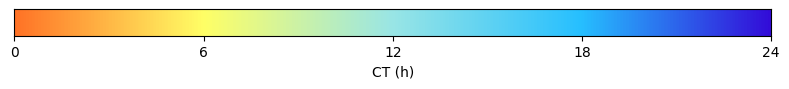

In [18]:
#color map  for color blindness
# 1) ERDC IceFire + black + ダークレッド 制御点
control_points_mod_final = [
    (0.00, (1.00, 0.45, 0.15)),  # orange
    (0.25, (1.00, 1.00, 0.40)),  # yellowish
    (0.50, (0.60, 0.90, 0.90)),  # light cyan
    (0.75, (0.15, 0.75, 1.00)),  # cyan-blue
    (1.00, (0.20, 0.05, 0.85))   # blue-violet
]

cmap_icefire = LinearSegmentedColormap.from_list(
    "erdc_icefire_darkred",
    control_points_mod_final,
    N=256
)

fig, ax = plt.subplots(figsize=(8, 1.0))
grad = np.linspace(0, 1, 1200)[None, :]
ax.imshow(grad, aspect='auto', cmap=cmap_icefire, extent=[0, 24, 0, 1])
ax.set_yticks([])
ax.set_xlim(0, 24)
ax.set_xlabel("CT (h)")
ax.set_xticks([0, 6, 12, 18, 24])
plt.tight_layout()



# pdf_path_final = "/home/gpu_data/data8/kinoshita_cfos/bc_colorbar2.pdf"
# plt.savefig(pdf_path_final, bbox_inches="tight")
# plt.show()


In [19]:
# phase images for color blindness
vb_r=8  #8
mo=1  
r=100
calc_fol ="whole_vb_a_new"
fol = "/"+calc_fol+"/{}um/{}/vb{}_mo{}/".format(vx, "whole", vb_r, mo)


n=3
b = 0.01
a = (1-b)/(-1)**n

# img_vx = tifffile.imread(savedir +"{}/{}um/whole/vb{}_mo{}/vb_{}_img.tif".format(calc_fol,vx,vb_r, mo, op1))

cos_v_df = pd.read_csv(savedir + fol+"/" + "cos_1st2nd.csv")
print(cos_v_df)


ph_li = (cos_v_df["LAG"]/24)
# ph_li = 1-ph_li
# ph_li = [(hue + 1/3 - 1) if (hue + 1/3) > 1 else (hue + 1/3) for hue in ph_li]


rgba_float = cmap_icefire(np.array(ph_li)) #[cmap_icefire([i) for i in ph_li]
rgba_u8 = (rgba_float * 255).astype(np.uint8)   # shape=(N,4)
rgb_u8 = rgba_u8[:, :3] 

fdr_vs = np.array(cos_v_df["BH.Q"])
alpha_li = -np.log10(fdr_vs)
a_max = np.max(alpha_li)
alpha_li = alpha_li/a_max
alpha_li = (-a*(alpha_li-1)**n + 1)


# alpha_li = np.ones(len(alpha_li))
# nonsig = np.where(fdr_vs >= 0.1)[0]
# alpha_li[nonsig] = 0
print(alpha_li)


# fdr_vs = np.array(cos_v_df["BH.Q"])


brain_ind = np.where(np.ravel(np.swapaxes(atlas_mask, 0, 2))==1)[0]


img_vx2 =np.zeros((ca.z_num*ca.y_num*ca.x_num, 4) , dtype=np.uint8)
img_vx2[brain_ind,:3] = rgb_u8
img_vx2[brain_ind,3] = alpha_li*255
img_vx2 = np.swapaxes(img_vx2.reshape(ca.x_num,ca.y_num,ca.z_num, 4), 0, 2)

           Unnamed: 0         id     ADJ.P  PER      BH.Q            Ph   LAG  \
0                   0          0  0.579966   24  0.671620  1.015350e-01   0.4   
1                   1          1  0.391625   24  0.515931  2.810349e-01   1.1   
2                   2          2  0.556772   24  0.652573  2.810350e-01   1.1   
3                   3          3  0.774722   24  0.826910  3.601138e-01   1.4   
4                   4          4  0.792861   24  0.841467  5.620698e-01   2.1   
...               ...        ...       ...  ...       ...           ...   ...   
133092072   133092072  133092072  0.382608   24  0.507589  2.049284e-01   0.8   
133092073   133092073  133092073  0.567043   24  0.660951  4.086378e-01   1.6   
133092074   133092074  133092074  0.889363   24  0.916303  8.125297e-08   0.0   
133092075   133092075  133092075  0.887639   24  0.914901 -1.901256e-01  23.3   
133092076   133092076  133092076  0.913761   24  0.935156 -1.000359e-08  24.0   

           max_corr  
0    

In [ ]:
#slice vb regions  with border   other regions  isometric  vx20  small and large  all hemi_right or center, flip,  for Figures white color
region_rev = [194, 56, 689, 170, 749, 830, 286, 382, 726, 162, 1061, 452]#, 147, 557, 872, 38, 149, 302, 867, 1061, 162, 452]
region_IDs = [302, 4] #302, 4] #382, 726, # uni_IDs[300:] #[162, 1061, 830, 223]#1061#[147, 557, 872, 38, 149, 302, 867, 1061, 162, 452]# [56, 689, 170, 749, 830, 286]  #[382, 726]
op1="fdr"
op2="nuc_atlas"

calc_fol = "whole_vb_a"
vb_r=8
mo=1
vx = 20

angles = ["sag"]
r= 20   #VLPO, 1079  15, # LGD, others #20     #  DG  CA1  385, 1002,50
sca = 0#35  #CA1



CT_li2 = np.arange(0, 24, 4)
    

# n=4
# b = 0.2
# a = (1-b)/(-1)**n
# op_sag ="hemi_right"
op_r ="hemi_right"


sl_num = 7
md=0
mdc=0
mdh = 0#-12
xcenter = int(ca.x_num/2)

zoff = 25*20/vx
yoff=10*20/vx
xoff=-10*20/vx

# region_IDs = [194]#region_per_IDs_all #1061, 162, 867, 149, 38]#[262, 38, 149]#[194, 56, 689, 170, 749, 830]

rx=1

s1=0
s11=0
s2=0
s22=0
s3=0  
s33=0
sx=0
sy=0
sz=0


offc = 0
color_rgb = (255 / 255, 255 / 255, 255 / 255)
for n, region_ID in enumerate(region_IDs):
#     if region_ID in region_rev:
#         continue
#     if region_ID in center_regions:
#         continue

    region = ca.df_allen[ca.df_allen["ID"]==region_ID]["acronym"].iloc[0]
    print(region)
    print(region_ID)
    if "/" in region:
                region = region.replace("/", "_")
    output_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2.png".format(calc_fol, vx,region, vb_r,mo, op1, "sag", op_r)

#     if os.path.exists(output_path):
#         continue
        
    try:
        

        if not ca.smallID_q(region_ID):
                ID_li=[]
    #             if rID in atlas_ID_li:
                ID_li.append(region_ID)

                child_IDs, child_regions, middle_IDs, middle_regions = ca.get_child_IDs2(region_ID)
                for m_ID in child_IDs + middle_IDs:
    #                 if m_ID in atlas_ID_li:
                    ID_li.append(m_ID)
        else:
            ID_li=[region_ID]



        mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), ID_li)
        if op_r == "hemi_right":
            if r == 0:
                xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi_0_rm(mask0)
            else:
                xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
        else:
            if r == 0:
                xmin, xmax, ymin, ymax, zmin, zmax =  mask_range_0_rm(mask0)
            else:
                 xmin, xmax, ymin, ymax, zmin, zmax =  mask_range([region_ID], vx, r)

        # img_vx = tifffile.imread(savedir + "/vb_fig/whole_vb_{}/whole_vb_{}_{}_img.tif".format(name,op1, op2))  #whole brain vx image
        img_vx = tifffile.imread(savedir +"{}/{}um/whole/vb{}_mo{}/vb_{}_img.tif".format(calc_fol,vx,vb_r, mo, op1))
#         if angle =="sag":

        
    
        
#         else:
#         xmin, xmax, ymin, ymax, zmin, zmax =  mask_range([region_ID], vx, r)
        if op_r == "hemi_right":
            print((zmax-zmin) * (ymax-ymin)*(xmax_l-xmin_l))
            if (zmax-zmin) * (ymax-ymin)*(xmax_l-xmin_l) > ca.x_num*ca.y_num*ca.z_num/10:
                edge_thick = "large"
            else:
                edge_thick ="small"
        else:
            print((zmax-zmin) * (ymax-ymin)*(xmax-xmin))
            if (zmax-zmin) * (ymax-ymin)*(xmax-xmin) > ca.x_num*ca.y_num*ca.z_num/10:
                edge_thick = "large"
            else:
                edge_thick ="small"
                
        if edge_thick=="large":
            print("large")#, (zmax-zmin) * (ymax-ymin)*(xmax_l-xmin_l))
#             if not os.path.exists(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format( region, vx, r)):
            r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
            edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
            edge_list = make_edge(region_ID, mask0)

            edge_mask2, dilated_coords = thicken_specific_lines(edge_mask, edge_list, radius=2.0)

            edge_vx_ind = np.where(edge_mask2==1)
            r_edge[edge_vx_ind] = (255,255,255, 100) #other regions border
        #     for z, y, x in dilated_coords:
            r_edge[dilated_coords] = (255, 255, 255, 255)#(227, 178, 155, 255)#(139, 69, 19, 255)  #color border of region of interest

            r_edge[edge_mask2==0] ==  (0,0,0, 0) #non edge voxel

#                 os.makedirs(savedir + "region_edge_thick/", exist_ok=True)
#                 tifffile.imwrite(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
#             else:
#                 r_edge = tifffile.imread(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format(region, vx, r))


        else:
            print("smalll")#, (zmax-zmin) * (ymax-ymin)*(xmax_l-xmin_l))
#                 if not os..path.exists(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format( region, vx, r)):
            r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
            edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
            edge_vx_ind = np.where(edge_mask==1)
            r_edge[edge_vx_ind] = (255,255,255, 100) #other regions border
            edge_list = make_edge(region_ID, mask0)
            for z, y, x, _ in edge_list:
                r_edge[z, y, x] = (255, 255, 255, 255) #(227, 178, 155, 255)#(227, 178, 155, 255)  #(227, 178, 155) ##border of region of interest
            r_edge[edge_mask==0] ==  (0,0,0, 0) #non edge voxel
#                 os.makedirs(savedir + "region_edge/", exist_ok=True)
#                 tifffile.imwrite(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
# #             else:
#                 r_edge = tifffile.imread(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region, vx, r))


        r_img = tifffile.imread(savedir+"1st"+"/"+"CT0_01"+"/cfos/"+"ANTsR{}".format(vx) + "/after_ants.tif")

        hw_r = np.zeros(3)
        for l, angle in enumerate(angles):
#             if os.path.exists(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)):
#                 continue
    #         if rID==286:

#             if np.sum(np.max(mask0, axis=l)) >90 *50/vx:

#             if angle =="sag":
            if op_r == "hemi_right":
                if r == 0:
                    xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi_0_rm(mask0)
                else:
                    xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
            else:
                if r == 0:
                    xmin, xmax, ymin, ymax, zmin, zmax =  mask_range_0_rm(mask0)
                else:
                     xmin, xmax, ymin, ymax, zmin, zmax =  mask_range([region_ID], vx, r)
#             
            

            if angle=="hor":
                if op_r =="hemi_right":
                    xmin = xmin_l
                    xmax = xmax_l
            
                    
        
        
                ymin = ymin
                ymax = ymax
                zmin = zmin -s1
                zmax = zmax -s11

                hw_r[0] = (ymax-ymin)/(xmax-xmin)

            elif angle=="cor":
                if op_r =="hemi_right":
                    xmin = xmin_l
                    xmax = xmax_l
                ymin = ymin -s2
                ymax = ymax -s22
                zmin = zmin 
                zmax = zmax 

                hw_r[1] = (zmax-zmin)/(xmax-xmin)

            elif angle=="sag":
                if op_r =="hemi_right":
                    xmin = int(xmin_l -s3)
                    xmax = int(xmax_l -s33)
                else:
                    xmin = int(xmin -s3)
                    xmax = int(xmax -s33)
                ymin = ymin -sca
                ymax = ymax +sca
                zmin = zmin 
                zmax = zmax 

                hw_r[2] = (zmax-zmin)/(ymax-ymin)
        max_r = np.max(hw_r)
        print("max_r", max_r)
        maxin = np.argmax(hw_r)
        print("maxin", maxin)

#       
        
        
        for l, angle in enumerate(angles):
#             if l>0:
#                 continue
#             if os.path.exists(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)):
#                 continue
    #         if rID==286:
#             if angle =="sag":
            if op_r == "hemi_right":
                if r == 0:
                    xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi_0_rm(mask0)
                else:
                    xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
            else:
                if r == 0:
                    xmin, xmax, ymin, ymax, zmin, zmax =  mask_range_0_rm(mask0)
                else:
                    xmin, xmax, ymin, ymax, zmin, zmax =  mask_range([region_ID], vx, r)
#             else:
#                 xmin, xmax, ymin, ymax, zmin, zmax =  mask_range([region_ID], vx, r)
            


            if angle=="hor":
                if op_r == "hemi_right":
                    xmin = xmin_l
                    xmax = xmax_l
                ymin = ymin 
                ymax = ymax 
                zmin = zmin -s1
                zmax = zmax -s11

                h = max_r * (xmax-xmin)
                h_pre = ymax-ymin
                dh = h - h_pre
                ymin = ymin-dh/2
                ymax = ymax+dh/2
                if ymin<0:
                    ymin = ymin+dh/2
                    ymax = ymax+dh/2
                elif ymax > ca.y_num:
                    ymin = ymin-dh/2
                    ymax = ymax-dh/2


            elif angle=="cor":
                if op_r == "hemi_right":
                    xmin = xmin_l
                    xmax = xmax_l
                ymin = ymin -s2
                ymax = ymax -s22
                zmin = zmin 
                zmax = zmax 

                h = max_r * (xmax-xmin)
                h_pre = zmax-zmin
                dh = h - h_pre
                zmin = zmin-dh/2
                zmax = zmax+dh/2
                if zmin<0:
                    zmin = zmin+dh/2
                    zmax = zmax+dh/2
                elif zmax > ca.z_num:
                    zmin = zmin-dh/2
                    zmax = zmax-dh/2


            elif angle=="sag":
#                 if op=="hemi":
                if op_r == "hemi_right":
                    xmin = int(xmin_l -s3)
                    xmax = int(xmax_l -s33)
                else:
                    xmin = int(xmin -s3)
                    xmax = int(xmax -s33)
                ymin = ymin -sca
                ymax = ymax +sca
                zmin = zmin 
                zmax = zmax 

                h = max_r * (ymax-ymin)
                h_pre = zmax-zmin
                dh = h - h_pre
                zmin = zmin-dh/2
                zmax = zmax+dh/2

                if zmin<0:
                    zmin = zmin+dh/2
                    zmax = zmax+dh/2
                elif zmax > ca.z_num:
                    zmin = zmin-dh/2
                    zmax = zmax-dh/2



    #         else:
    #             xmin, xmax, ymin, ymax, zmin, zmax = mask_range([rID], vx, r)


#             if angle=="sag" and op=="hemi":
#                 r_img_c = r_img[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin_l):int(xmax_l)]
#                 img_vx_c = img_vx[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin_l):int(xmax_l)]
#                 r_edge_c = r_edge[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin_l):int(xmax_l)]
#             else:
            
            
#             if angle == "hor":
#                 ex_x = xmax-xmin + 2*ex1
#                 ex_y = max_r * ex_x
#                 dy = (ex_y - (ymax-ymin))/2
#                 r_img_c = r_img[int(zmin):int(zmax), int(ymin-dy):int(ymax+dy), int(xmin-ex1):int(xmax+ex1)]
#                 img_vx_c = img_vx[int(zmin):int(zmax), int(ymin-dy):int(ymax+dy), int(xmin-ex1):int(xmax+ex1)]
#                 r_edge_c = r_edge[int(zmin):int(zmax), int(ymin-dy):int(ymax+dy), int(xmin-ex1):int(xmax+ex1)]
#             elif angle == "cor":
#                 ex_x = xmax-xmin + 2*ex2
#                 ex_z = max_r * ex_x
#                 dz = (ex_z - (zmax-zmin))/2
#                 r_img_c = r_img[int(zmin-dz):int(zmax+dz), int(ymin):int(ymax), int(xmin-ex2):int(xmax+ex2)]
#                 img_vx_c = img_vx[int(zmin-dz):int(zmax+dz), int(ymin):int(ymax), int(xmin-ex2):int(xmax+ex2)]
#                 r_edge_c = r_edge[int(zmin-dz):int(zmax+dz), int(ymin):int(ymax), int(xmin-ex2):int(xmax+ex2)]
#             else:
            r_img_c = r_img[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
            img_vx_c = img_vx[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
            r_edge_c = r_edge[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]



            fig = plt.figure(figsize=(25,10))

            if angle=="hor":

        #      
                slice_vs = np.linspace(0, zmax-zmin, sl_num)
            elif angle=="cor":
        #      
                slice_vs = np.linspace(0, ymax-ymin, sl_num)

            elif angle=="sag":
        #        
                slice_vs = np.linspace(0, xmax-xmin, sl_num)

        #     
            for k, sl in enumerate(slice_vs):
        #         zmin + step*sl
        #         if k==0 or k==1 or k== sl_num-1 or k==sl_num-2:
                if k==0 or k== sl_num-1:
                    continue

        #             ax = fig.add_subplot(sl_num, len(CT_li2), k*len(CT_li2)+j+1)

                if angle=="hor":
                    ax = fig.add_subplot(1, 5, k+1 -1)
                    r_img_c2 = r_img_c[int(sl+mdh),:,:]
                    r_img_c2 = np.fliplr(r_img_c2)
                    img_vx_c2 = img_vx_c[int(sl+mdh),:,:]
                    img_vx_c2 = np.fliplr(img_vx_c2)
                    r_edge_c2 = r_edge_c[int(sl+mdh),:,:]
                    r_edge_c2 = np.fliplr(r_edge_c2)
                    
                    
                    ax.imshow(r_img_c2)
                    ax.imshow(img_vx_c2)
                    ax.imshow(r_edge_c2)
    #                 ax.set_xlim(xmin, xmax)

    #                 ax.set_ylim(ymax, ymin)

                    if k == sl_num-2:
                        width =  r_img_c.shape[0]
                        height =  r_img_c.shape[1] #ymax-ymin 
                        base = 1/ca.x_num*width

                        if base < 0.05:
                            var = 0.05
                        elif 0.05<= base < 0.1:
                            var = 0.1
                        elif 0.1<=base and base < 0.2:
                            var = 0.2
                        elif base >= 0.2 and base <0.5:
                            var = 0.5
                        elif base >= 0.5 and base <1.0:
                            var = 1.0
                        else:
                            var=1.0
                            
                        print(angle, height)

                        scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img  #- scalebar_length #int(15/147*width)   #-int(2/37*height)
                        scalebar_position = (width*2, height-10)
                        scalebar = patches.Rectangle(scalebar_position, scalebar_length, 1.2/93*height, color=color_rgb)
                        ax.add_patch(scalebar)
                        text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1])#-int(2/45*height) )
                        ax.text(*text_position, '{} mm'.format(var), color=color_rgb, ha='center', fontsize = 15)

                elif angle=="cor":
                    ax = fig.add_subplot(1, 5, k+1 -1)
                    r_img_c2 = r_img_c[:,int(sl+mdc),:]
                    r_img_c2 = np.fliplr(r_img_c2)
                    img_vx_c2 = img_vx_c[:,int(sl+mdc),:]
                    img_vx_c2 = np.fliplr(img_vx_c2)
                    r_edge_c2 = r_edge_c[:,int(sl+mdc),:]
                    r_edge_c2 = np.fliplr(r_edge_c2)
                    
                    ax.imshow(r_img_c2)
                    ax.imshow(img_vx_c2)
                    ax.imshow(r_edge_c2)
    #                 ax.set_ylim(zmax, zmin)
    #                 ax.set_xlim(xmin, xmax)
                    if k == sl_num-2:
                        width =  r_img_c.shape[0]
                        height =  r_img_c.shape[1] #ymax-ymin 
#                         width =  xmax-xmin
#                         height = zmax-zmin 
                        base = 1/ca.x_num*width

                        if base < 0.05:
                            var = 0.05
                        elif 0.05<= base < 0.1:
                            var = 0.1
                        elif 0.1<=base and base < 0.2:
                            var = 0.2
                        elif base >= 0.2 and base <0.5:
                            var = 0.5
                        elif base >= 0.5 and base <1.0:
                            var = 1.0
                        else:
                            var=1.0
                        print(angle, height)
                        scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                        scalebar_position = (width*2, height-10)
                        scalebar = patches.Rectangle(scalebar_position, scalebar_length, 1.2/10*height, color=color_rgb)
                        ax.add_patch(scalebar)
                        text_position = (scalebar_position[0] , scalebar_position[1] )
                        ax.text(*text_position, '{} mm'.format(var), color=color_rgb, ha='center', fontsize = 15)

                elif angle=="sag":

                    reversed_k = (sl_num - 1) - k
                    ax = fig.add_subplot(1, 5, reversed_k+1 -1)
                    ax.imshow(r_img_c[:,:,int(sl+md)])
                    ax.imshow(img_vx_c[:,:,int(sl+md)])
                    ax.imshow(r_edge_c[:,:,int(sl+md)])
    #                 ax.set_ylim(zmax, zmin)
    #                 ax.set_xlim(ymin, ymax)
                    if k == 1:
                        width =  r_img_c.shape[0]
                        height =  r_img_c.shape[1] #ymax-ymin 
#                         width =  ymax-ymin
#                         height = zmax-zmin 
                        base = 1/ca.y_num*width

                        if base < 0.05:
                            var = 0.05
                        elif 0.05<= base < 0.1:
                            var = 0.1
                        elif 0.1<=base and base < 0.2:
                            var = 0.2
                        elif base >= 0.2 and base <0.5:
                            var = 0.5
                        elif base >= 0.5 and base <1.0:
                            var = 1.0
                        else:
                            var=1.0
                            
                        print(angle, height)
                        scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                        scalebar_position = (width*2, height-10)
                        scalebar = patches.Rectangle(scalebar_position, scalebar_length, 1.2/10*height, color=color_rgb)
                        ax.add_patch(scalebar)
                        text_position = (scalebar_position[0] , scalebar_position[1])
                        ax.text(*text_position, '{} mm'.format(var), color=color_rgb, ha='center', fontsize = 15)


                ax.axis("off")
            plt.tight_layout()
            os.makedirs(savedir +"{}/{}um/{}/vb{}_mo{}/".format(calc_fol, vx,region, vb_r,mo), exist_ok=True)

    #         if angle =="sag" and op == "hemi":
            plt.savefig(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r))
            plt.show()
            plt.close()



            input_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r)
            output_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r)

    #         if not os.path.exists(output_path):
            trim_image(input_path, output_path)
        
        
            
            
            
        
        
        
        
        
    except:
        traceback.print_exc()

In [ ]:
#slice vb regions  with border  isometric  vx20  small and large   flip,  for databases white color regional summary
# region_rev = [194, 56, 689, 170, 749, 830, 286, 382, 726, 162, 1061, 452]#, 147, 557, 872, 38, 149, 302, 867, 1061, 162, 452]
region_IDs = [286]# uni_IDs[5:]#center_regions#302, 4] #382, 726, # uni_IDs[300:] #[162, 1061, 830, 223]#1061#[147, 557, 872, 38, 149, 302, 867, 1061, 162, 452]# [56, 689, 170, 749, 830, 286]  #[382, 726]
# regions = ["root", "grey"]
op1="fdr"
op2="nuc_atlas"

vb_r=8


mo=1
vx = 20

angles = ["hor", "cor", "sag"]
r= 0   #VLPO, 1079  15, # LGD, others #20     #  DG  CA1  385, 1002,50
sca = 0#35  #CA1



CT_li2 = np.arange(0, 24, 4)
    

# n=4
# b = 0.2
# a = (1-b)/(-1)**n
# op_sag ="hemi_right"
op_r = "center"


sl_num = 7
md=0
mdc=0
mdh = 0#-12
xcenter = int(ca.x_num/2)

zoff = 25*20/vx
yoff=10*20/vx
xoff=-10*20/vx

# region_IDs = [194]#region_per_IDs_all #1061, 162, 867, 149, 38]#[262, 38, 149]#[194, 56, 689, 170, 749, 830]

rx=1

s1=0
s11=0
s2=0
s22=0
s3=0  
s33=0
sx=0
sy=0
sz=0


offc = 0
color_rgb = (255 / 255, 255 / 255, 255 / 255)


sets =[ ["count", "vb"]]#[["count", "vb"], ["count", "region"],["count_ratio", "vb"], ["count_ratio", "region"] ]


for typev, unit in sets:
    if unit =="region":
        if typev=="count":
            calc_fol = "whole_region_a"
        else:
            calc_fol = "whole_region"
    else:
        if typev=="count":
            calc_fol ="whole_vb_a"
        else:
            calc_fol = "whole_vb"
    for n, region_ID in enumerate(region_IDs):
    #     if region_ID in region_rev:
    #         continue

        if region_ID ==286:
            continue

        if region_ID in center_regions:
            op_r="center"
        else:
            op_r="hemi_right"

        op_r="hemi_right"

#         if op_r=="hemi_right":
#             if region_ID in center_regions:
#                 continue
        if region_ID ==382 or region_ID ==726 or region_ID ==830 :
            
            s1= -10  #-10
            s11= 0 #20
            s2=0
            s22=0
            s3=0  
            s33=0
            sx=0
            sy=0
            sz=0
        elif region_ID ==1079:          
            #MGv 1079
            s1=-10
            s11=0
            s2=-10
            s22=0
            s3=0  
            s33=0
            sx=0
            sy=0
            sz=0
        else:            
            s1=0
            s11=0
            s2=0
            s22=0
            s3=0  
            s33=0
            sx=0
            sy=0
            sz=0

        region = ca.df_allen[ca.df_allen["ID"]==region_ID]["acronym"].iloc[0]
    #     region = regions[n]
        print(region)
        print(region_ID)
        if "/" in region:
                    region = region.replace("/", "_")
        output_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns_nf_new.png".format(calc_fol, vx,region, vb_r,mo, op1, "sag", op_r)

        if os.path.exists(output_path):
            continue
        # if os.path.exists(db_dir + "{}um/{}/{}_{}_{}_border_slice_iso_all.png".format(vx, region, region, unit,typev)):
        #     continue

        try:


            if not ca.smallID_q(region_ID):
                    ID_li=[]
        #             if rID in atlas_ID_li:
                    ID_li.append(region_ID)

                    child_IDs, child_regions, middle_IDs, middle_regions = ca.get_child_IDs2(region_ID)
                    for m_ID in child_IDs + middle_IDs:
        #                 if m_ID in atlas_ID_li:
                        ID_li.append(m_ID)
            else:
                ID_li=[region_ID]



            mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), ID_li)
            mask_size = np.sum(mask0)
            print("mask_size", mask_size)
            if mask_size >= 1800000:
                r = 50
                edge_thick ="large"
            elif mask_size  < 1800000 and mask_size >= 18000:
                r = 20
                edge_thick ="small"
            else:
                r = 15
                edge_thick ="small"

    #         if op_r == "hemi_right":
    #             if r == 0:
    #                 xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi_0_rm(mask0)
    #             else:
    #                 xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
    #         else:
    #             if r == 0:
    #                 xmin, xmax, ymin, ymax, zmin, zmax =  mask_range_0_rm(mask0)
    #             else:
    #                  xmin, xmax, ymin, ymax, zmin, zmax =  mask_range([region_ID], vx, r)

            # img_vx = tifffile.imread(savedir + "/vb_fig/whole_vb_{}/whole_vb_{}_{}_img.tif".format(name,op1, op2))  #whole brain vx image
            if unit =="vb":
                img_vx = tifffile.imread(savedir +"{}/{}um/whole/vb{}_mo{}/vb_{}_img.tif".format(calc_fol,vx,vb_r, mo, op1))
            elif unit == "region":
                img_vx = tifffile.imread(savedir +"{}/{}um/whole/region_{}_img.tif".format(calc_fol,vx, op1))
    #         if angle =="sag":


            if edge_thick=="large":
                print("large")#, (zmax-zmin) * (ymax-ymin)*(xmax_l-xmin_l))
                if not os.path.exists(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format( region, vx, r)):
                    r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
                    edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
                    edge_list = make_edge(region_ID, mask0)
    
                    edge_mask2, dilated_coords = thicken_specific_lines(edge_mask, edge_list, radius=2.0)
    
                    edge_vx_ind = np.where(edge_mask2==1)
                    r_edge[edge_vx_ind] = (255,255,255, 60) #other regions border
                #     for z, y, x in dilated_coords:
                    r_edge[dilated_coords] = (255, 255, 255, 255)#(227, 178, 155, 255)#(139, 69, 19, 255)  #color border of region of interest
    
                    r_edge[edge_mask2==0] ==  (0,0,0, 0) #non edge voxel
    
                    os.makedirs(savedir + "region_edge_thick/", exist_ok=True)
                    tifffile.imwrite(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
                else:
                    r_edge = tifffile.imread(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format(region, vx, r))


            else:
                print("smalll")#, (zmax-zmin) * (ymax-ymin)*(xmax_l-xmin_l))
                if not os..path.exists(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format( region, vx, r)):
                    r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
                    edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
                    edge_vx_ind = np.where(edge_mask==1)
                    r_edge[edge_vx_ind] = (255,255,255, 60) #other regions border
                    edge_list = make_edge(region_ID, mask0)
                    for z, y, x, _ in edge_list:
                        r_edge[z, y, x] = (255, 255, 255, 255) #(227, 178, 155, 255)#(227, 178, 155, 255)  #(227, 178, 155) ##border of region of interest
                    r_edge[edge_mask==0] ==  (0,0,0, 0) #non edge voxel
                    os.makedirs(savedir + "region_edge/", exist_ok=True)
                    tifffile.imwrite(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
                else:
                    r_edge = tifffile.imread(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region, vx, r))

    
            r_img = tifffile.imread(savedir+"1st"+"/"+"CT0_01"+"/cfos/"+"ANTsR{}".format(vx) + "/after_ants.tif")

            hw_r = np.zeros(3)
            for l, angle in enumerate(angles):
    #             if os.path.exists(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)):
    #                 continue
        #         if rID==286:

    #             if np.sum(np.max(mask0, axis=l)) >90 *50/vx:

    #             if angle =="sag":
                if op_r == "hemi_right":
                    if r == 0:
                        xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi_0_rm(mask0)
                    else:
                        xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
                else:
                    if r == 0:
                        xmin, xmax, ymin, ymax, zmin, zmax =  mask_range_0_rm(mask0)
                    else:
                         xmin, xmax, ymin, ymax, zmin, zmax =  mask_range([region_ID], vx, r)
    #             


                if angle=="hor":
                    if op_r =="hemi_right":
                        xmin = xmin_l
                        xmax = xmax_l




                    ymin = ymin
                    ymax = ymax
                    zmin = zmin -s1
                    zmax = zmax -s11

                    hw_r[0] = (ymax-ymin)/(xmax-xmin)

                elif angle=="cor":
                    if op_r =="hemi_right":
                        xmin = xmin_l
                        xmax = xmax_l
                    ymin = ymin -s2
                    ymax = ymax -s22
                    zmin = zmin 
                    zmax = zmax 

                    hw_r[1] = (zmax-zmin)/(xmax-xmin)

                elif angle=="sag":
                    if op_r =="hemi_right":
                        xmin = int(xmin_l -s3)
                        xmax = int(xmax_l -s33)
                    else:
                        xmin = int(xmin -s3)
                        xmax = int(xmax -s33)
                    ymin = ymin -sca
                    ymax = ymax +sca
                    zmin = zmin 
                    zmax = zmax 

                    hw_r[2] = (zmax-zmin)/(ymax-ymin)
            max_r = np.max(hw_r)
            print("max_r", max_r)
            maxin = np.argmax(hw_r)
            print("maxin", maxin)

            for l, angle in enumerate(angles):
                output_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns_nf_s_new.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r)

                if os.path.exists(output_path):
                    continue
    #             if l>0:
    #                 continue
    #             if os.path.exists(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)):
    #                 continue
        #         if rID==286:
    #             if angle =="sag":
                if op_r == "hemi_right":
                    if r == 0:
                        xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi_0_rm(mask0)
                    else:
                        xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
                else:
                    if r == 0:
                        xmin, xmax, ymin, ymax, zmin, zmax =  mask_range_0_rm(mask0)
                    else:
                         xmin, xmax, ymin, ymax, zmin, zmax =  mask_range([region_ID], vx, r)



                if angle=="hor":
                    if op_r =="hemi_right":
                        xmin = xmin_l
                        xmax = xmax_l
                    ymin = ymin 
                    ymax = ymax 
                    zmin = zmin -s1
                    zmax = zmax -s11

                    h = max_r * (xmax-xmin)
                    h_pre = ymax-ymin
                    dh = h - h_pre
                    ymin = ymin-dh/2
                    ymax = ymax+dh/2
                    if ymin<0:
                        ymin = ymin+dh/2
                        ymax = ymax+dh/2
                    elif ymax > ca.y_num:
                        ymin = ymin-dh/2
                        ymax = ymax-dh/2


                elif angle=="cor":
                    if op_r =="hemi_right":
                        xmin = xmin_l
                        xmax = xmax_l
                    ymin = ymin -s2
                    ymax = ymax -s22
                    zmin = zmin 
                    zmax = zmax 

                    h = max_r * (xmax-xmin)
                    h_pre = zmax-zmin
                    dh = h - h_pre
                    zmin = zmin-dh/2
                    zmax = zmax+dh/2
                    if zmin<0:
                        zmin = zmin+dh/2
                        zmax = zmax+dh/2
                    elif zmax > ca.z_num:
                        zmin = zmin-dh/2
                        zmax = zmax-dh/2


                elif angle=="sag":
    #                 if op=="hemi":
                    if op_r =="hemi_right":
                        xmin = int(xmin_l -s3)
                        xmax = int(xmax_l -s33)
                    else:
                        xmin = int(xmin -s3)
                        xmax = int(xmax -s33)
                    ymin = ymin -sca
                    ymax = ymax +sca
                    zmin = zmin 
                    zmax = zmax 

                    h = max_r * (ymax-ymin)
                    h_pre = zmax-zmin
                    dh = h - h_pre
                    zmin = zmin-dh/2
                    zmax = zmax+dh/2

                    if zmin<0:
                        zmin = zmin+dh/2
                        zmax = zmax+dh/2
                    elif zmax > ca.z_num:
                        zmin = zmin-dh/2
                        zmax = zmax-dh/2



        #        
                if xmin<0:
                    xmin =0
                if xmax > ca.x_num:
                    xmax = ca.x_num

                if ymin < 0 :
                    ymin =0
                if ymax > ca.y_num:
                    ymax = ca.y_num
                if zmin < 0 :
                    zmin =0
                if zmax > ca.z_num:
                    zmax = ca.z_num

                r_img_c = r_img[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
                img_vx_c = img_vx[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
                r_edge_c = r_edge[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]



                fig = plt.figure(figsize=(25,10))

                if angle=="hor":

            #      
                    slice_vs = np.linspace(0, zmax-zmin, sl_num)
                elif angle=="cor":
            #      
                    slice_vs = np.linspace(0, ymax-ymin, sl_num)

                elif angle=="sag":
            #        
                    slice_vs = np.linspace(0, xmax-xmin, sl_num)

            #     
                for k, sl in enumerate(slice_vs):
            #         zmin + step*sl
            #         if k==0 or k==1 or k== sl_num-1 or k==sl_num-2:
                    if k==0 or k== sl_num-1:
                        continue

            #             ax = fig.add_subplot(sl_num, len(CT_li2), k*len(CT_li2)+j+1)

                    if angle=="hor":
                        ax = fig.add_subplot(1, 5, k+1 -1)
                        r_img_c2 = r_img_c[int(sl+mdh),:,:]
                        # r_img_c2 = np.fliplr(r_img_c2)
                        img_vx_c2 = img_vx_c[int(sl+mdh),:,:]
                        # img_vx_c2 = np.fliplr(img_vx_c2)
                        r_edge_c2 = r_edge_c[int(sl+mdh),:,:]
                        # r_edge_c2 = np.fliplr(r_edge_c2)


                        ax.imshow(r_img_c2)
                        ax.imshow(img_vx_c2)
                        ax.imshow(r_edge_c2)
        #                 ax.set_xlim(xmin, xmax)

        #                 ax.set_ylim(ymax, ymin)

                        if k == sl_num-2:
                            width =  r_img_c.shape[0]
                            height =  r_img_c.shape[1] #ymax-ymin 
                            base = 1/ca.x_num*width

                            if base < 0.05:
                                var = 0.05
                            elif 0.05<= base < 0.1:
                                var = 0.1
                            elif 0.1<=base and base < 0.2:
                                var = 0.2
                            elif base >= 0.2 and base <0.5:
                                var = 0.5
                            elif base >= 0.5 and base <1.0:
                                var = 1.0
                            else:
                                var=1.0

                            print(angle, height)

    #                         scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img  #- scalebar_length #int(15/147*width)   #-int(2/37*height)
    #                         scalebar_position = (width*2, height)
    #                         scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color=color_rgb)
    #                         ax.add_patch(scalebar)
    #                         text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(2/45*height) )
    #                         ax.text(*text_position, '{} mm'.format(var), color=color_rgb, ha='center', fontsize = 15)

                    elif angle=="cor":
                        ax = fig.add_subplot(1, 5, k+1 -1)
                        r_img_c2 = r_img_c[:,int(sl+mdc),:]
                        # r_img_c2 = np.fliplr(r_img_c2)
                        img_vx_c2 = img_vx_c[:,int(sl+mdc),:]
                        # img_vx_c2 = np.fliplr(img_vx_c2)
                        r_edge_c2 = r_edge_c[:,int(sl+mdc),:]
                        # r_edge_c2 = np.fliplr(r_edge_c2)

                        ax.imshow(r_img_c2)
                        ax.imshow(img_vx_c2)
                        ax.imshow(r_edge_c2)
        #                 ax.set_ylim(zmax, zmin)
        #                 ax.set_xlim(xmin, xmax)
                        if k == sl_num-2:
                            width =  r_img_c.shape[0]
                            height =  r_img_c.shape[1] #ymax-ymin 
    #                         width =  xmax-xmin
    #                         height = zmax-zmin 
                            base = 1/ca.x_num*width

                            if base < 0.05:
                                var = 0.05
                            elif 0.05<= base < 0.1:
                                var = 0.1
                            elif 0.1<=base and base < 0.2:
                                var = 0.2
                            elif base >= 0.2 and base <0.5:
                                var = 0.5
                            elif base >= 0.5 and base <1.0:
                                var = 1.0
                            else:
                                var=1.0
                            print(angle, height)
    #                         scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
    #                         scalebar_position = (width*2, height)
    #                         scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/10*height, color=color_rgb)
    #                         ax.add_patch(scalebar)
    #                         text_position = (scalebar_position[0] , scalebar_position[1] )
    #                         ax.text(*text_position, '{} mm'.format(var), color=color_rgb, ha='center', fontsize = 15)

                    elif angle=="sag":

                        reversed_k = (sl_num - 1) - k
                        ax = fig.add_subplot(1, 5, reversed_k+1 -1)
                        ax.imshow(r_img_c[:,:,int(sl+md)])
                        ax.imshow(img_vx_c[:,:,int(sl+md)])
                        ax.imshow(r_edge_c[:,:,int(sl+md)])
        #                 ax.set_ylim(zmax, zmin)
        #                 ax.set_xlim(ymin, ymax)
                        if k == 1:
                            width =  r_img_c.shape[0]
                            height =  r_img_c.shape[1] #ymax-ymin 
    #                         width =  ymax-ymin
    #                         height = zmax-zmin 
                            base = 1/ca.y_num*width

                            if base < 0.05:
                                var = 0.05
                            elif 0.05<= base < 0.1:
                                var = 0.1
                            elif 0.1<=base and base < 0.2:
                                var = 0.2
                            elif base >= 0.2 and base <0.5:
                                var = 0.5
                            elif base >= 0.5 and base <1.0:
                                var = 1.0
                            else:
                                var=1.0

                            print(angle, height)
    #                         scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
    #                         scalebar_position = (width*2, height)
    #                         scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/10*height, color=color_rgb)
    #                         ax.add_patch(scalebar)
    #                         text_position = (scalebar_position[0] , scalebar_position[1])
    #                         ax.text(*text_position, '{} mm'.format(var), color=color_rgb, ha='center', fontsize = 15)


                    ax.axis("off")
                plt.tight_layout()
                os.makedirs(savedir +"{}/{}um/{}/vb{}_mo{}/".format(calc_fol, vx,region, vb_r,mo), exist_ok=True)

        #         if angle =="sag" and op == "hemi":
                plt.savefig(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2_w_ns_nf_s_new.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r))
                plt.savefig(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2_w_ns_nf_s_new.SVG".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r))
                
                
                
                plt.show()
    



                input_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2_w_ns_nf_s_new.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r)
                output_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns_nf_s_new.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r)

        #         if not os.path.exists(output_path):
                trim_image(input_path, output_path)


    #



        except:
            traceback.print_exc()

In [ ]:
#color blindness
#slice vb regions  with border  isometric  vx20  small and large  all hemi_right or center, flip,  for databases white color regional summary
# region_rev = [194, 56, 689, 170, 749, 830, 286, 382, 726, 162, 1061, 452]#, 147, 557, 872, 38, 149, 302, 867, 1061, 162, 452]

bc_fol = savedir + "/blindness/"
# bc_fol = savedir + "/vx_new/"
os.makedirs(bc_fol, exist_ok=True)


region_IDs = [830] #[147, 382, 726, 909, 830,162, 1061, 302, 4,385,1002, 347, 1079]#  #1067 (MGv)  artcle figures
# uni_IDs[5:]#center_regions#302, 4] #382, 726, # uni_IDs[300:] #[162, 1061, 830, 223]#1061#[147, 557, 872, 38, 149, 302, 867, 1061, 162, 452]# [56, 689, 170, 749, 830, 286]  #[382, 726]
# regions = ["root", "grey"]
op1="fdr"
op2="nuc_atlas"

vb_r=8
mo=1
vx = 20

angles = ["sag"]
r= 0   #VLPO, 1079  15, # LGD, others #20     #  DG  CA1  385, 1002,50
sca = 0#35  #CA1



CT_li2 = np.arange(0, 24, 4)
    

# n=4
# b = 0.2
# a = (1-b)/(-1)**n
# op_sag ="hemi_right"
op_r = "center"


sl_num = 7
md=0
mdc=0
mdh = 0#-12
xcenter = int(ca.x_num/2)

zoff = 25*20/vx
yoff=10*20/vx
xoff=-10*20/vx

# region_IDs = [194]#region_per_IDs_all #1061, 162, 867, 149, 38]#[262, 38, 149]#[194, 56, 689, 170, 749, 830]

rx=1



offc = 0
color_rgb = (255 / 255, 255 / 255, 255 / 255)


sets =[ ["count", "vb"]]#[["count", "vb"], ["count", "region"],["count_ratio", "vb"], ["count_ratio", "region"] ]


for typev, unit in sets:
    if unit =="region":
        if typev=="count":
            calc_fol = "whole_region_a"
        else:
            calc_fol = "whole_region"
    else:
        if typev=="count":
            calc_fol ="whole_vb_a_new"
        else:
            calc_fol = "whole_vb"
    for n, region_ID in enumerate(region_IDs):
    #     if region_ID in region_rev:
    #         continue

        # if region_ID ==286:
        #     continue

        if region_ID in center_regions:
            op_r="center"
        else:
            op_r="hemi_right"

        op_r="hemi_right"

#         if op_r=="hemi_right":
#             if region_ID in center_regions:
#                 continue

        if region_ID ==382 or region_ID ==726 or region_ID ==830 :
            
            s1= -10  #-10
            s11= 0 #20
            s2=0
            s22=0
            s3=0  
            s33=0
            sx=0
            sy=0
            sz=0
        elif region_ID ==1079:          
            #MGv 1079
            s1=-10
            s11=0
            s2=-10
            s22=0
            s3=0  
            s33=0
            sx=0
            sy=0
            sz=0
        else:            
            s1=0
            s11=0
            s2=0
            s22=0
            s3=0  
            s33=0
            sx=0
            sy=0
            sz=0

        region = ca.df_allen[ca.df_allen["ID"]==region_ID]["acronym"].iloc[0]
    #     region = regions[n]
        print(region)
        print(region_ID)
        if "/" in region:
                    region = region.replace("/", "_")
        output_path = bc_fol +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns_nf.png".format(calc_fol, vx,region, vb_r,mo, op1, "sag", op_r)

        if os.path.exists(output_path):
            continue
        # if os.path.exists(db_dir + "{}um/{}/{}_{}_{}_border_slice_iso_all.png".format(vx, region, region, unit,typev)):
        #     continue

        try:


            if not ca.smallID_q(region_ID):
                    ID_li=[]
        #             if rID in atlas_ID_li:
                    ID_li.append(region_ID)

                    child_IDs, child_regions, middle_IDs, middle_regions = ca.get_child_IDs2(region_ID)
                    for m_ID in child_IDs + middle_IDs:
        #                 if m_ID in atlas_ID_li:
                        ID_li.append(m_ID)
            else:
                ID_li=[region_ID]



            mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), ID_li)
            mask_size = np.sum(mask0)
            print("mask_size", mask_size)
            if mask_size >= 1800000:
                r = 50
                edge_thick ="large"
            elif mask_size  < 1800000 and mask_size >= 18000:
                r = 20
                edge_thick ="small"
            else:
                r = 15
                edge_thick ="small"

    #         if op_r == "hemi_right":
    #             if r == 0:
    #                 xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi_0_rm(mask0)
    #             else:
    #                 xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
    #         else:
    #             if r == 0:
    #                 xmin, xmax, ymin, ymax, zmin, zmax =  mask_range_0_rm(mask0)
    #             else:
    #                  xmin, xmax, ymin, ymax, zmin, zmax =  mask_range([region_ID], vx, r)

            # img_vx = tifffile.imread(savedir + "/vb_fig/whole_vb_{}/whole_vb_{}_{}_img.tif".format(name,op1, op2))  #whole brain vx image
            if unit =="vb":
                img_vx = tifffile.imread(savedir +"{}/{}um/whole/vb{}_mo{}/vb_{}_img.tif".format(calc_fol,vx,vb_r, mo, op1))
            elif unit == "region":
                img_vx = tifffile.imread(savedir +"{}/{}um/whole/region_{}_img.tif".format(calc_fol,vx, op1))
    #         if angle =="sag":

            # N = len(img_vx)
            # out = np.zeros((N,4), dtype=np.uint8)
            # mask = (
            #     (~np.isnan(img_vx)) &
            #     (img_vx != -1) 
            # )
            # # mask=True のピクセルは IceFire 色を使い，それ以外は黒＋不透明
            # out[mask]    = rgba_u8[mask]
            # out[~mask]   = np.array([0,0,0,255], dtype=np.uint8)
            
            # # 6) 必要なら元の画像形状 (H,W,4) に reshape
            # #    たとえば img_vx.shape が (H,W) なら
            # H, W = img_vx.shape
            # img_vx = out.reshape((H, W, 4))

            

    #         else:
    #         xmin, xmax, ymin, ymax, zmin, zmax =  mask_range([region_ID], vx, r)
    #         if op_r == "hemi_right":
    #             print((zmax-zmin) * (ymax-ymin)*(xmax_l-xmin_l))

    #             if (zmax-zmin) * (ymax-ymin)*(xmax_l-xmin_l) > ca.x_num*ca.y_num*ca.z_num/10:
    #                 edge_thick = "large"
    #             else:
    #                 edge_thick ="small"
    #         else:
    #             print((zmax-zmin) * (ymax-ymin)*(xmax-xmin))
    #             if (zmax-zmin) * (ymax-ymin)*(xmax-xmin) > ca.x_num*ca.y_num*ca.z_num/10:
    #                 edge_thick = "large"
    #             else:
    #                 edge_thick ="small"

            # if edge_thick=="large":
            if region_ID == 726 or region_ID==382:
                print("large")#, (zmax-zmin) * (ymax-ymin)*(xmax_l-xmin_l))
                # if not os.path.exists(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format( region, vx, r)):
                r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
                edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
                edge_list = make_edge(region_ID, mask0)
    
                edge_mask2, dilated_coords = thicken_specific_lines(edge_mask, edge_list, radius=2.0)
    
                edge_vx_ind = np.where(edge_mask2==1)
                r_edge[edge_vx_ind] = (255,255,255, 60) #other regions border
            #     for z, y, x in dilated_coords:
                r_edge[dilated_coords] = (255, 255, 255, 255)#(227, 178, 155, 255)#(139, 69, 19, 255)  #color border of region of interest
    
                r_edge[edge_mask2==0] ==  (0,0,0, 0) #non edge voxel

                # os.makedirs(savedir + "region_edge_thick/", exist_ok=True)
                # tifffile.imwrite(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
                # else:
                #     r_edge = tifffile.imread(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format(region, vx, r))


           
            else:
                print("smalll")#, (zmax-zmin) * (ymax-ymin)*(xmax_l-xmin_l))
                # if not os.path.exists(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format( region, vx, r)):
                r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
                edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
                edge_vx_ind = np.where(edge_mask==1)
                r_edge[edge_vx_ind] = (255,255,255, 60) #other regions border
                edge_list = make_edge(region_ID, mask0)
                for z, y, x, _ in edge_list:
                    r_edge[z, y, x] = (255, 255, 255, 255) #(227, 178, 155, 255)#(227, 178, 155, 255)  #(227, 178, 155) ##border of region of interest
                r_edge[edge_mask==0] ==  (0,0,0, 0) #non edge voxel
                # os.makedirs(savedir + "region_edge/", exist_ok=True)
                # tifffile.imwrite(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
                # else:
                #     r_edge = tifffile.imread(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region, vx, r))


            r_img = tifffile.imread(savedir+"1st"+"/"+"CT0_01"+"/cfos/"+"ANTsR{}".format(vx) + "/after_ants.tif")

            hw_r = np.zeros(3)
            for l, angle in enumerate(angles):
    #             if os.path.exists(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)):
    #                 continue
        #         if rID==286:

    #             if np.sum(np.max(mask0, axis=l)) >90 *50/vx:

    #             if angle =="sag":
                if op_r == "hemi_right":
                    if r == 0:
                        xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi_0_rm(mask0)
                    else:
                        xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
                else:
                    if r == 0:
                        xmin, xmax, ymin, ymax, zmin, zmax =  mask_range_0_rm(mask0)
                    else:
                         xmin, xmax, ymin, ymax, zmin, zmax =  mask_range([region_ID], vx, r)
    #             


                if angle=="hor":
                    if op_r =="hemi_right":
                        xmin = xmin_l
                        xmax = xmax_l




                    ymin = ymin
                    ymax = ymax
                    zmin = zmin -s1
                    zmax = zmax -s11

                    hw_r[0] = (ymax-ymin)/(xmax-xmin)

                elif angle=="cor":
                    if op_r =="hemi_right":
                        xmin = xmin_l
                        xmax = xmax_l
                    ymin = ymin -s2
                    ymax = ymax -s22
                    zmin = zmin 
                    zmax = zmax 

                    hw_r[1] = (zmax-zmin)/(xmax-xmin)

                elif angle=="sag":
                    if op_r =="hemi_right":
                        xmin = int(xmin_l -s3)
                        xmax = int(xmax_l -s33)
                    else:
                        xmin = int(xmin -s3)
                        xmax = int(xmax -s33)
                    ymin = ymin -sca
                    ymax = ymax +sca
                    zmin = zmin 
                    zmax = zmax 

                    hw_r[2] = (zmax-zmin)/(ymax-ymin)
            max_r = np.max(hw_r)
            print("max_r", max_r)
            maxin = np.argmax(hw_r)
            print("maxin", maxin)
            if region_ID ==302:
                max_r = 3.61/4.25 # 302  SCs
          
            for l, angle in enumerate(angles):
                output_path = bc_fol +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns_nf_s.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r)

    #             if os.path.exists(output_path):
    #                 continue
    #             if l>0:
    #                 continue
    #             if os.path.exists(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)):
    #                 continue
        #         if rID==286:
    #             if angle =="sag":
                if op_r == "hemi_right":
                    if r == 0:
                        xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi_0_rm(mask0)
                    else:
                        xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
                else:
                    if r == 0:
                        xmin, xmax, ymin, ymax, zmin, zmax =  mask_range_0_rm(mask0)
                    else:
                         xmin, xmax, ymin, ymax, zmin, zmax =  mask_range([region_ID], vx, r)



                if angle=="hor":
                    if op_r =="hemi_right":
                        xmin = xmin_l
                        xmax = xmax_l
                    ymin = ymin 
                    ymax = ymax 
                    zmin = zmin -s1
                    zmax = zmax -s11

                    h = max_r * (xmax-xmin)
                    h_pre = ymax-ymin
                    dh = h - h_pre
                    ymin = ymin-dh/2
                    ymax = ymax+dh/2
                    if ymin<0:
                        ymin = ymin+dh/2
                        ymax = ymax+dh/2
                    elif ymax > ca.y_num:
                        ymin = ymin-dh/2
                        ymax = ymax-dh/2


                elif angle=="cor":
                    if op_r =="hemi_right":
                        xmin = xmin_l
                        xmax = xmax_l
                    ymin = ymin -s2
                    ymax = ymax -s22
                    zmin = zmin 
                    zmax = zmax 

                    h = max_r * (xmax-xmin)
                    h_pre = zmax-zmin
                    dh = h - h_pre
                    zmin = zmin-dh/2
                    zmax = zmax+dh/2
                    if zmin<0:
                        zmin = zmin+dh/2
                        zmax = zmax+dh/2
                    elif zmax > ca.z_num:
                        zmin = zmin-dh/2
                        zmax = zmax-dh/2


                elif angle=="sag":
    #                 if op=="hemi":
                    if op_r =="hemi_right":
                        xmin = int(xmin_l -s3)
                        xmax = int(xmax_l -s33)
                    else:
                        xmin = int(xmin -s3)
                        xmax = int(xmax -s33)
                    ymin = ymin -sca
                    ymax = ymax +sca
                    zmin = zmin 
                    zmax = zmax 

                    h = max_r * (ymax-ymin)
                    h_pre = zmax-zmin
                    dh = h - h_pre
                    zmin = zmin-dh/2
                    zmax = zmax+dh/2

                    if zmin<0:
                        zmin = zmin+dh/2
                        zmax = zmax+dh/2
                    elif zmax > ca.z_num:
                        zmin = zmin-dh/2
                        zmax = zmax-dh/2



        #
                if xmin<0:
                    xmin =0
                if xmax > ca.x_num:
                    xmax = ca.x_num

                if ymin < 0 :
                    ymin =0
                if ymax > ca.y_num:
                    ymax = ca.y_num
                if zmin < 0 :
                    zmin =0
                if zmax > ca.z_num:
                    zmax = ca.z_num

                r_img_c = r_img[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
                img_vx_c = img_vx2[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
                r_edge_c = r_edge[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]

                #change colormap
        

                
                
                fig = plt.figure(figsize=(25,10))

                if angle=="hor":

            #      
                    slice_vs = np.linspace(0, zmax-zmin, sl_num)
                elif angle=="cor":
            #      
                    slice_vs = np.linspace(0, ymax-ymin, sl_num)

                elif angle=="sag":
            #        
                    slice_vs = np.linspace(0, xmax-xmin, sl_num)

            #     
                for k, sl in enumerate(slice_vs):
            #         zmin + step*sl
            #         if k==0 or k==1 or k== sl_num-1 or k==sl_num-2:
                    if k==0 or k== sl_num-1:
                        continue

            #             ax = fig.add_subplot(sl_num, len(CT_li2), k*len(CT_li2)+j+1)

                    if angle=="hor":
                        ax = fig.add_subplot(1, 5, k+1 -1)
                        r_img_c2 = r_img_c[int(sl+mdh),:,:]
                        # r_img_c2 = np.fliplr(r_img_c2)
                        img_vx_c2 = img_vx_c[int(sl+mdh),:,:]
                        # img_vx_c2 = np.fliplr(img_vx_c2)
                        r_edge_c2 = r_edge_c[int(sl+mdh),:,:]
                        # r_edge_c2 = np.fliplr(r_edge_c2)


                        ax.imshow(r_img_c2)
                        ax.imshow(img_vx_c2)
                        ax.imshow(r_edge_c2)
        #                 ax.set_xlim(xmin, xmax)

        #                 ax.set_ylim(ymax, ymin)

                        if k == sl_num-2:
                            width =  r_img_c.shape[0]
                            height =  r_img_c.shape[1] #ymax-ymin 
                            base = 1/ca.x_num*width

                            if base < 0.05:
                                var = 0.05
                            elif 0.05<= base < 0.1:
                                var = 0.1
                            elif 0.1<=base and base < 0.2:
                                var = 0.2
                            elif base >= 0.2 and base <0.5:
                                var = 0.5
                            elif base >= 0.5 and base <1.0:
                                var = 1.0
                            else:
                                var=1.0

                            print(angle, height)

    #                         scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img  #- scalebar_length #int(15/147*width)   #-int(2/37*height)
    #                         scalebar_position = (width*2, height)
    #                         scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color=color_rgb)
    #                         ax.add_patch(scalebar)
    #                         text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(2/45*height) )
    #                         ax.text(*text_position, '{} mm'.format(var), color=color_rgb, ha='center', fontsize = 15)

                    elif angle=="cor":
                        ax = fig.add_subplot(1, 5, k+1 -1)
                        r_img_c2 = r_img_c[:,int(sl+mdc),:]
                        # r_img_c2 = np.fliplr(r_img_c2)
                        img_vx_c2 = img_vx_c[:,int(sl+mdc),:]
                        # img_vx_c2 = np.fliplr(img_vx_c2)
                        r_edge_c2 = r_edge_c[:,int(sl+mdc),:]
                        # r_edge_c2 = np.fliplr(r_edge_c2)

                        ax.imshow(r_img_c2)
                        ax.imshow(img_vx_c2)
                        ax.imshow(r_edge_c2)
        #                 ax.set_ylim(zmax, zmin)
        #                 ax.set_xlim(xmin, xmax)
                        if k == sl_num-2:
                            width =  r_img_c.shape[0]
                            height =  r_img_c.shape[1] #ymax-ymin 
    #                         width =  xmax-xmin
    #                         height = zmax-zmin 
                            base = 1/ca.x_num*width

                            if base < 0.05:
                                var = 0.05
                            elif 0.05<= base < 0.1:
                                var = 0.1
                            elif 0.1<=base and base < 0.2:
                                var = 0.2
                            elif base >= 0.2 and base <0.5:
                                var = 0.5
                            elif base >= 0.5 and base <1.0:
                                var = 1.0
                            else:
                                var=1.0
                            print(angle, height)
    #                         scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
    #                         scalebar_position = (width*2, height)
    #                         scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/10*height, color=color_rgb)
    #                         ax.add_patch(scalebar)
    #                         text_position = (scalebar_position[0] , scalebar_position[1] )
    #                         ax.text(*text_position, '{} mm'.format(var), color=color_rgb, ha='center', fontsize = 15)

                    elif angle=="sag":

                        reversed_k = (sl_num - 1) - k
                        ax = fig.add_subplot(1, 5, reversed_k+1 -1)
                        ax.imshow(r_img_c[:,:,int(sl+md)])
                        ax.imshow(img_vx_c[:,:,int(sl+md)])
                        ax.imshow(r_edge_c[:,:,int(sl+md)])
        #                 ax.set_ylim(zmax, zmin)
        #                 ax.set_xlim(ymin, ymax)
                        if k == 1:
                            width =  r_img_c.shape[0]
                            height =  r_img_c.shape[1] #ymax-ymin 
    #                         width =  ymax-ymin
    #                         height = zmax-zmin 
                            base = 1/ca.y_num*width

                            if base < 0.05:
                                var = 0.05
                            elif 0.05<= base < 0.1:
                                var = 0.1
                            elif 0.1<=base and base < 0.2:
                                var = 0.2
                            elif base >= 0.2 and base <0.5:
                                var = 0.5
                            elif base >= 0.5 and base <1.0:
                                var = 1.0
                            else:
                                var=1.0

                            print(angle, height)
    #                         scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
    #                         scalebar_position = (width*2, height)
    #                         scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/10*height, color=color_rgb)
    #                         ax.add_patch(scalebar)
    #                         text_position = (scalebar_position[0] , scalebar_position[1])
    #                         ax.text(*text_position, '{} mm'.format(var), color=color_rgb, ha='center', fontsize = 15)


                    ax.axis("off")
                plt.tight_layout()
                os.makedirs(savedir +"{}/{}um/{}/vb{}_mo{}/".format(calc_fol, vx,region, vb_r,mo), exist_ok=True)
                plt.savefig(bc_fol +"/{}_{}_{}_bc_hemi.png".format(vx, region,  angle))
        #         if angle =="sag" and op == "hemi":
                # plt.savefig(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2_w_ns_nf_s_bc.png".format(calblindnessc_fol, vx,region, vb_r,mo, op1, angle, op_r))
                # plt.savefig(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2_w_ns_nf_s_bc.SVG".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r))
                
                
                
                plt.show()
    



                input_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2_w_ns_nf_s_bc.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r)
                output_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns_nf_s_bc.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r)

        #         if not os.path.exists(output_path):
                # trim_image(input_path, output_path)




        except:
            traceback.print_exc()

In [19]:
#align figures by regions  small and large  all right hemi or center,  white color, scale or noscalebartrim_image_top, no cut for Figures
from matplotlib import gridspec
from PIL import Image
import itertools
region_rev = [194, 56, 689, 170, 749,286, 382]#[286, 194, 56, 689, 170, 749, 830, 286, 382, 726, 147, 557, 872, 38, 149, 302, 867, 1061, 162, 452]
fig_dir = savedir + "figures_article/"
os.makedirs(fig_dir, exist_ok=True)

fig_dir_whole = savedir + "whole_3D_2/"
ex_dir=savedir + "slices_ex/"
db_dir = savedir + "/slices/"
calc_fol = "whole_vb_a"
vb_r=8
mo=1

angles = ["hor", "cor", "sag"]
    
op = "hemi"

op_r = "hemi_right"# "center"
op1="fdr"
op2="nuc_atlas"

cut_angles  =["sag", "sag", "hor"]#[ "hor"] #
cut_sets = ["zcut", "ycut", "xcut"]# ["xcut"]#
# 1061, 162, 867, 149, 38  #r300egion_per_IDs_all#
region_IDs = [909]#[170, 1079] #[385, 1002, 689, 382, 726, 1079, 170]#[302, 4, 452]


elevzs = [0]
azimzs = [-3]#,3,-3]#, 3, -3]

elevys = [0]#, 3, -3]
azimys = [2]#, -3, 3]

vx=20
vx2 = 20
rx=vx/vx2
r = 10


for region_ID in region_IDs:
#     if region_ID ==286:
#         continue
#     if region_ID in center_regions:
#         continue

    region = ca.df_allen[ca.df_allen["ID"]==region_ID]["acronym"].iloc[0]
    print(region_ID, region)

    region_pre = region
    if "/" in region:
        region = region.replace("/", "_")
#     output_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all_tri2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, op)
#     if os.path.exists(output_path):
#         continue
        
    try:
        img0 = Image.open(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, "hor", op_r))



        if 7/316 * img0.height <1:
            fig = plt.figure(figsize=(18, 2))
        else:
            fig = plt.figure(figsize=(18, 7/316 * img0.height))

        gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

        region_color = tuple(df_sum[df_sum["id"]==region_ID]["rgb_triplet2"].iloc[0])

        for n, angle in enumerate(angles):
            cut_angle = cut_angles[n]
            cut = cut_sets[n]

#                             ax =  fig.add_subplot(gs[n, 0])

#                             if cut =="xcut":

#                                 img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
#                             else:
#                     #             img_path = fig_dir  + "{}_{}_{}_slice_tri.png".format(region, cut_angle, cut)
#                                 if cut=="ycut":
#                                     if elevy==0 and azimy==0:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
#                                     else:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_elev{}_azim{}_tri2.png".format(region, cut_angle, cut,op_r, elevy, azimy)
#                                 elif cut =="zcut":
#                                     if elevz==0 and azimz==0:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
#                                     else:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_elev{}_azim{}_tri2.png".format(region, cut_angle, cut,op_r, elevz, azimz)


#                             if not os.path.exists(img_path):
#                                 print("{} not found".format(img_path))
#     #                             continue
#                             img = Image.open(img_path)

    #         if n==0:
    #             print(img.height)
    #             ax.text(img.width/2, -60*img.height/358, region_pre, color=region_color, ha='center', va='top',  fontsize = 25)

#                             ax.imshow(img)
#                             ax.axis("off")

            ax =  fig.add_subplot(gs[n, 0])
            img = Image.open(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r))

    #         if n==0:
    #             print(img.height)
    #             ax.text(-140, -50*358/img.height, region_pre, color=region_color, ha='center', va='top',  fontsize = 25)

            ax.imshow(img)
            ax.axis("off")



        input_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, op_r)
        output_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all_tri2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, op_r)

        plt.tight_layout()
        plt.subplots_adjust(wspace=0.01, hspace=0.01)
        fig.savefig(input_path, dpi=600)
        fig.savefig(ex_dir + "/{}_vb{}_mo{}_vb_{}_border_{}_iso_all2_w.SVG".format(region, vb_r,mo, op1, op_r))
        trim_image_top(input_path, output_path, 10)
        plt.close()

        print("size", 6/316 * img0.height )

        if 6/316 * img0.height <0.3:
            fig = plt.figure(figsize=(17, 3))
        else:
            fig = plt.figure(figsize=(17, 6/316 * img0.height))
        gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[0.15 ,0.7])
        for n, angle in enumerate(angles):
            ax =  fig.add_subplot(gs[n, 0])
            img = Image.open(fig_dir_whole+"{}_{}_tri_20.png".format(region, angle))
            ax.imshow(img)
            ax.axis("off")

        ax =  fig.add_subplot(gs[0:, 1])
        img = Image.open(output_path)
        ax.imshow(img)
        ax.axis("off")
#                         os.makedirs(db_dir + "{}um/{}/".format(vx, region), exist_ok = True)
#                         fig.savefig(db_dir + "{}um/{}/{}_vb_border_slice_iso_all_w.png".format(vx, region, region)) 
        fig.savefig(ex_dir + "3D_{}_{}_vb_border_{}_slice_iso_all_w.SVG".format(region, region, op_r)) 
        plt.show()


        #non scalebar
        if 7/316 * img0.height <1:
            fig = plt.figure(figsize=(18, 2))
        else:
            fig = plt.figure(figsize=(18, 7/316 * img0.height))

        gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

        region_color = tuple(df_sum[df_sum["id"]==region_ID]["rgb_triplet2"].iloc[0])
        for n, angle in enumerate(angles):
#                          

            ax =  fig.add_subplot(gs[n,0])
            img = Image.open(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r))

    #         if n==0:
    #             print(img.height)
    #             ax.text(-140, -50*358/img.height, region_pre, color=region_color, ha='center', va='top',  fontsize = 25)

            ax.imshow(img)
            ax.axis("off")




        input_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all2_w_ns.png".format(calc_fol, vx,region, vb_r,mo, op1, op_r)
        output_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all_tri2_w_ns.png".format(calc_fol, vx,region, vb_r,mo, op1, op_r)

        plt.tight_layout()
        plt.subplots_adjust(wspace=0.01, hspace=0.01)
        fig.savefig(input_path, dpi=600)
        fig.savefig(ex_dir + "{}_vb{}_mo{}_vb_{}_border_{}_iso_all2_w_ns.SVG".format(region, vb_r,mo, op1, op_r))
        trim_image_top(input_path, output_path, 10)
        plt.show()
        plt.close()

        print("size", 6/316 * img0.height )

        if 6/316 * img0.height <0.3:
            fig = plt.figure(figsize=(17, 3))
        else:
            fig = plt.figure(figsize=(17, 6/316 * img0.height))
        gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[0.15 ,0.7])
        for n, angle in enumerate(angles):
            ax =  fig.add_subplot(gs[n, 0])
            img = Image.open(fig_dir_whole+"{}_{}_tri_20.png".format(region, angle))
            ax.imshow(img)
            ax.axis("off")

        ax =  fig.add_subplot(gs[0:, 1])
        img = Image.open(output_path)
        ax.imshow(img)
        ax.axis("off")
#                         os.makedirs(db_dir + "{}um/{}/".format(vx, region), exist_ok = True)
#                         fig.savefig(db_dir + "{}um/{}/{}_vb_border_slice_iso_all_w_ns.png".format(vx, region, region)) 


        fig.savefig(ex_dir + "3D_{}_{}_vb_border_{}_slice_iso_all_w_ns.SVG".format(region, region, op_r)) 

        plt.show()
        plt.close()



        trim_image_pil(input_path, output_path)
    except:
        traceback.print_exc()

        

'/mnt/gpu_data/data8//cfos_app/whole_vb_a/20um/VLPO/vb8_mo1/vb_fdr_border_hor_hemi_right_iso_tri2_w.png'

1097 HY
size 18.417721518987342


Traceback (most recent call last):
  File "/tmp/ipykernel_1112157/2683574638.py", line 126, in <module>
    img = Image.open(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns_nf.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r))
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3218, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/mnt/gpu_data/data8//cfos_app/whole_vb_a/20um/HY/vb8_mo1/vb_fdr_border_sag_hemi_right_iso_tri2_w_ns_nf.png'


<Figure size 1800x2148.73 with 0 Axes>

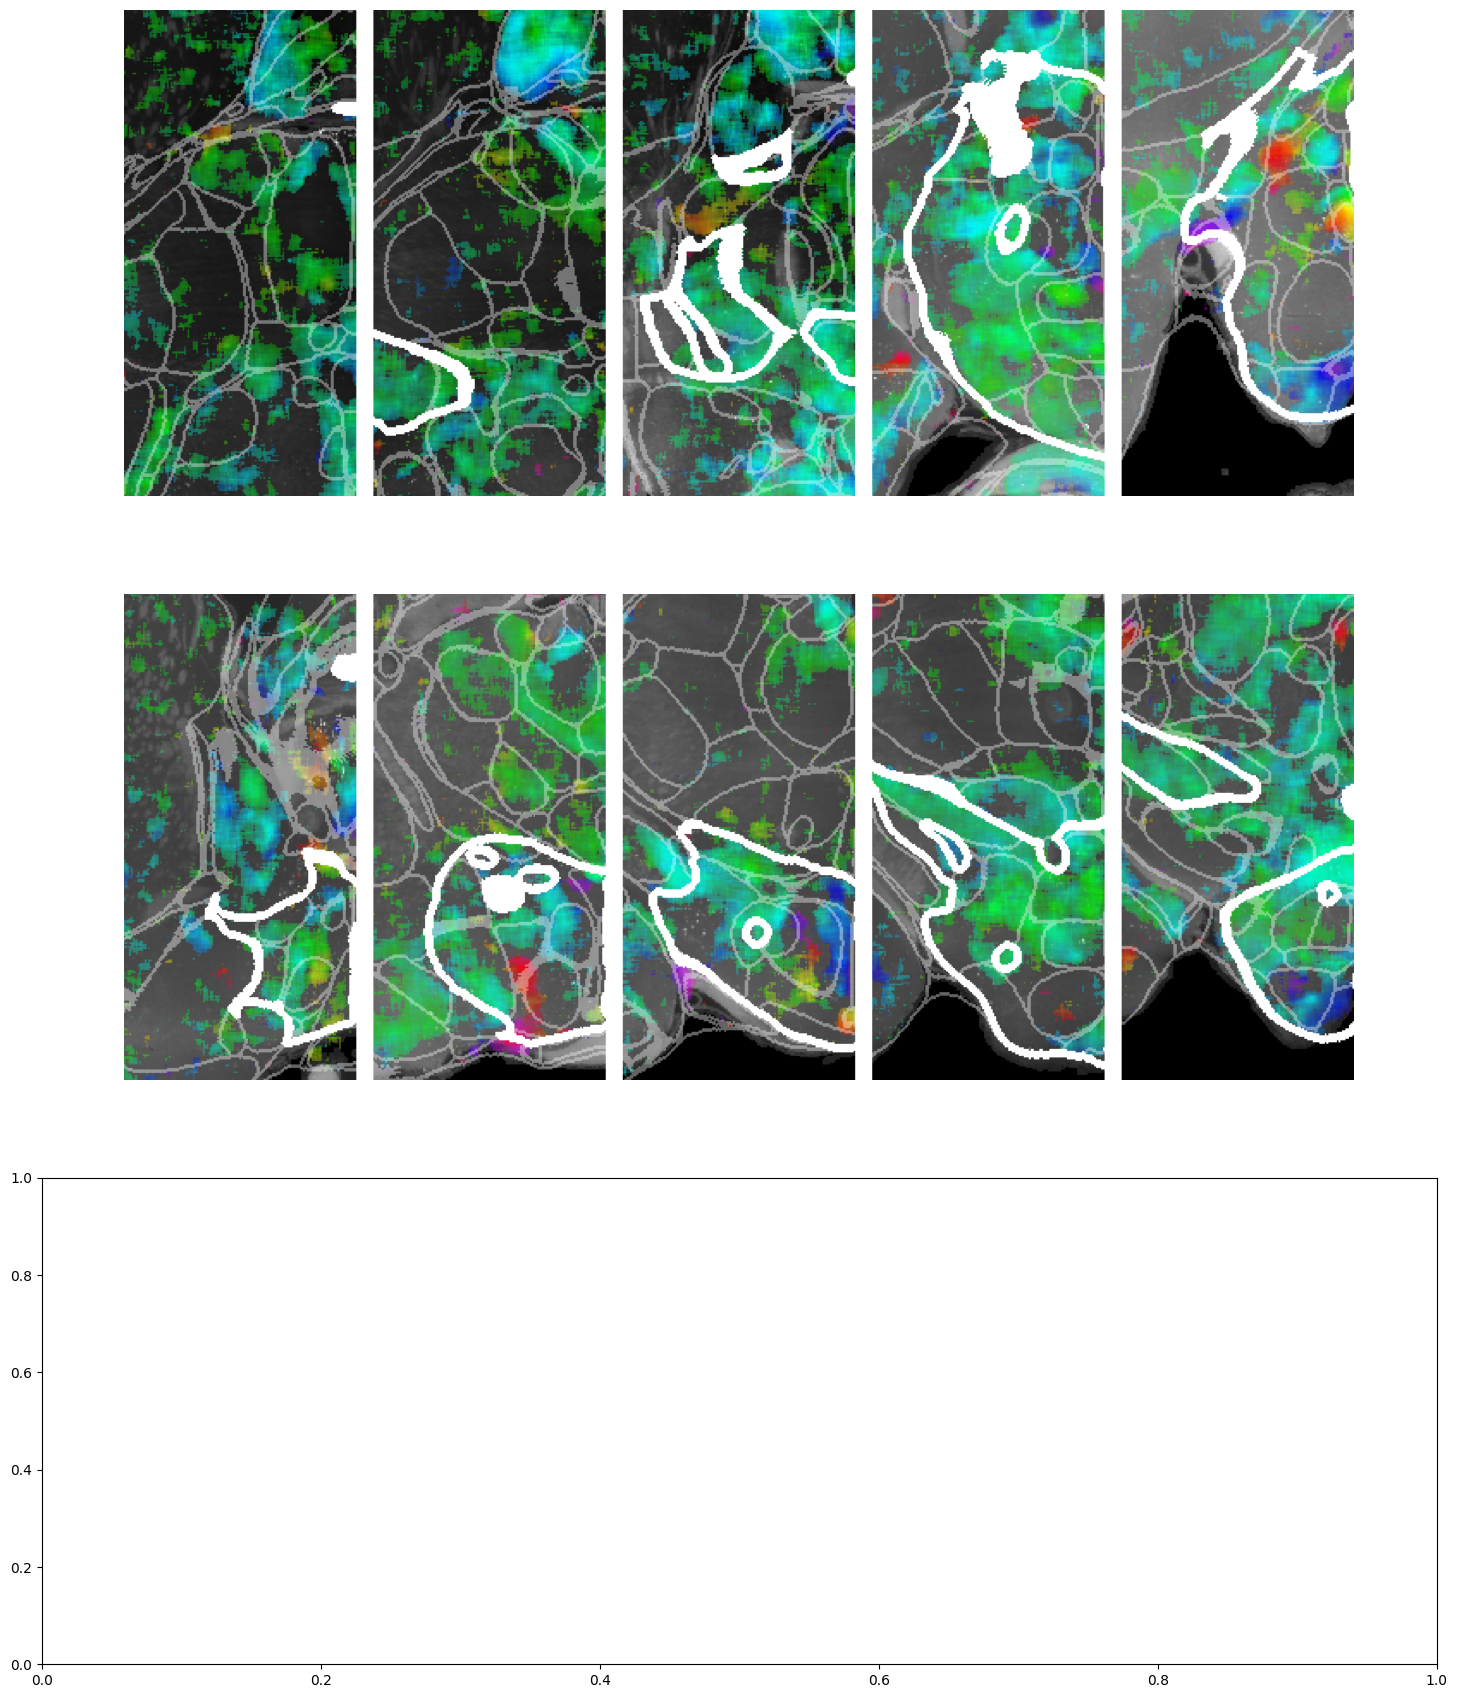

In [12]:
#align figures by regions  small and large  all right hemi  white color, scale or noscalebartrim_image_top  for databases  
from matplotlib import gridspec
from PIL import Image
import itertools
# region_rev = [194, 56, 689, 170, 749,286, 382]#[286, 194, 56, 689, 170, 749, 830, 286, 382, 726, 147, 557, 872, 38, 149, 302, 867, 1061, 162, 452]
fig_dir = savedir + "figures_article/"
os.makedirs(fig_dir, exist_ok=True)

fig_dir_whole = savedir + "whole_3D_2/"
ex_dir=savedir + "slices_ex/"
db_dir = savedir + "/slices/"
calc_fol = "whole_vb_a"
vb_r=8
mo=1
fontsize = 15
angles = ["hor", "cor", "sag"]
    
op = "hemi"

op_r = "hemi_right"# "center"
op1="fdr"
op2="nuc_atlas"

cut_angles  =["sag", "sag", "hor"]#[ "hor"] #
cut_sets = ["zcut", "ycut", "xcut"]# ["xcut"]#
# 1061, 162, 867, 149, 38  #r300egion_per_IDs_all#
# region_IDs = uni_IDs[uni_IDs.index(1127):]  # center_regions#[170, 1079] #[385, 1002, 689, 382, 726, 1079, 170]#[302, 4, 452]
region_IDs =[1097]# uni_IDs # center_regions#[170, 1079] #[385, 1002, 689, 382, 726, 1079, 170]#[302, 4, 452]


elevzs = [0]
azimzs = [-3]#,3,-3]#, 3, -3]
 # center_regions#[170, 1079] #[385, 1002, 689, 382, 726, 1079, 170]#[302, 4, 452]

elevys = [0]#, 3, -3]
azimys = [2]#, -3, 3]

vx=20
vx2 = 20
rx=vx/vx2
r = 10


for region_ID in region_IDs:
    if region_ID ==286:
        continue
    if region_ID in center_regions:
        continue

    region = ca.df_allen[ca.df_allen["ID"]==region_ID]["acronym"].iloc[0]
    print(region_ID, region)

    region_pre = region
    if "/" in region:
        region = region.replace("/", "_")
#     output_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all_tri2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, op)
#     if os.path.exists(output_path):
#         continue
        
    try:
        img0 = Image.open(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns_nf.png".format(calc_fol, vx,region, vb_r,mo, op1, "hor", op_r))



        if 7/316 * img0.height <1:
            fig = plt.figure(figsize=(18, 2))
        else:
            fig = plt.figure(figsize=(18, 7/316 * img0.height))

        gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

        region_color = tuple(df_sum[df_sum["id"]==region_ID]["rgb_triplet2"].iloc[0])

        print("size", 6/316 * img0.height )


        #non scalebar
        if 7/316 * img0.height <1:
            fig = plt.figure(figsize=(18, 2))
        else:
            fig = plt.figure(figsize=(18, 7/316 * img0.height))

        gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

        region_color = tuple(df_sum[df_sum["id"]==region_ID]["rgb_triplet2"].iloc[0])
        for n, angle in enumerate(angles):
#                             cut_angle = cut_angles[n]
#                             cut = cut_sets[n]

#                             ax =  fig.add_subplot(gs[n, 0])

#                             if cut =="xcut":

#                                 img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
#                             else:
#                     #             img_path = fig_dir  + "{}_{}_{}_slice_tri.png".format(region, cut_angle, cut)
#                                 if cut=="ycut":
#                                     if elevy==0 and azimy==0:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
#                                     else:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_elev{}_azim{}_tri2.png".format(region, cut_angle, cut,op_r, elevy, azimy)
#                                 elif cut =="zcut":
#                                     if elevz==0 and azimz==0:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
#                                     else:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_elev{}_azim{}_tri2.png".format(region, cut_angle, cut,op_r, elevz, azimz)


#                             if not os.path.exists(img_path):
#                                 print("{} not found".format(img_path))
#                             continue
#                             img = Image.open(img_path)

    #         if n==0:
    #             print(img.height)
    #             ax.text(img.width/2, -60*img.height/358, region_pre, color=region_color, ha='center', va='top',  fontsize = 25)

#                             ax.imshow(img)
#                             ax.axis("off")

            ax =  fig.add_subplot(gs[n,0])
            img = Image.open(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns_nf.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r))

    #         if n==0:
    #             print(img.height)
    #             ax.text(-140, -50*358/img.height, region_pre, color=region_color, ha='center', va='top',  fontsize = 25)

            ax.imshow(img)
            ax.axis("off")




        input_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all2_w_ns.png".format(calc_fol, vx,region, vb_r,mo, op1, op_r)
        output_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all_tri2_w_ns.png".format(calc_fol, vx,region, vb_r,mo, op1, op_r)

        plt.tight_layout()
        plt.subplots_adjust(wspace=0.01, hspace=0.01)
        fig.savefig(input_path, dpi=600)
#         fig.savefig(ex_dir + "{}_vb{}_mo{}_vb_{}_border_{}_iso_all2_w_ns.SVG".format(region, vb_r,mo, op1, op_r))
        trim_image_top(input_path, output_path, 10)
        plt.show()
        plt.close()
        

        print("size", 6/316 * img0.height )

        if 6/316 * img0.height <0.3:
            fig = plt.figure(figsize=(17, 3))
        else:
            fig = plt.figure(figsize=(17, 6/316 * img0.height))
        gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[0.13 ,0.7])
        for n, angle in enumerate(angles):
            ax =  fig.add_subplot(gs[n, 0])
            img = Image.open(fig_dir_whole+"{}_{}_tri_20.png".format(region, angle))
            if angle =="hor":
                ax.text(img.width/2-50, img.height+5, 'D -> V', color='k',  fontsize = fontsize)
            elif angle =="cor":
                ax.text(img.width/2-50, img.height+5, 'A -> P', color='k',  fontsize = fontsize)
            elif angle =="sag":
                ax.text(img.width/2-50, img.height+5, 'M -> L', color='k',  fontsize = fontsize)
                
            ax.imshow(img)
            ax.axis("off")

        ax =  fig.add_subplot(gs[0:, 1])
        img = Image.open(output_path)
        ax.imshow(img)
        ax.axis("off")

        os.makedirs(db_dir + "{}um/{}/".format(vx, region), exist_ok = True)
        fig.savefig(db_dir + "{}um/{}/{}_vb_border_slice_iso_all.png".format(vx, region, region)) 
        
        plt.show()
        plt.close()



        trim_image_pil(input_path, output_path)
    except:
        traceback.print_exc()


        

In [ ]:
#slice vb regions  with border   other regions  isometric  vx20  small and large  hemi  adjustment  white
# region_rev = [194, 56, 689, 170, 749, 830, 286, 382, 726]#, 147, 557, 872, 38, 149, 302, 867, 1061, 162, 452]
region_IDs = [147, 557, 872, 38, 149, 302, 867, 1061, 162, 452]# [56, 689, 170, 749, 830, 286]  #[382, 726]
op1="fdr"
op2="nuc_atlas"

calc_fol = "whole_vb_a"
vb_r=8
mo=1
vx = 20

angles = ["hor", "cor", "sag"]
r= 15  #15  LHA          #20  others     #50 #  DG  CA1
sca = 0#35  #CA1
CT_li2 = np.arange(0, 24, 4)
    

# n=4
# b = 0.2
# a = (1-b)/(-1)**n
op ="hemi"

sl_num = 7
md=0
mdc=0
mdh = 0#-12

zoff = 25*20/vx
yoff=10*20/vx
xoff=-10*20/vx

region_IDs = [689]#region_per_IDs_all #1061, 162, 867, 149, 38]#[262, 38, 149]#[194, 56, 689, 170, 749, 830]

rx=1

s1=-10
s11=0
s2=0
s22=0
s3=0  
s33=0
sx=0
sy=0
sz=0

ex1 =30# 30 #VLPO  70 #LGd  60 #LHA
ex2 =10# 10 #VLPO  30 #LGd    30 #LHA

offc = 0
for n, region_ID in enumerate(region_IDs):
#     if region_ID in region_rev:
#         continue

    region = ca.df_allen[ca.df_allen["ID"]==region_ID]["acronym"].iloc[0]
    print(region)
    print(region_ID)
    
  
        
    try:
        if "/" in region:
                region = region.replace("/", "_")

        if not ca.smallID_q(region_ID):
                ID_li=[]
    #             if rID in atlas_ID_li:
                ID_li.append(region_ID)

                child_IDs, child_regions, middle_IDs, middle_regions = ca.get_child_IDs2(region_ID)
                for m_ID in child_IDs + middle_IDs:
    #                 if m_ID in atlas_ID_li:
                    ID_li.append(m_ID)
        else:
            ID_li=[region_ID]



        mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), ID_li)

        # img_vx = tifffile.imread(savedir + "/vb_fig/whole_vb_{}/whole_vb_{}_{}_img.tif".format(name,op1, op2))  #whole brain vx image
        img_vx = tifffile.imread(savedir +"{}/{}um/whole/vb{}_mo{}/vb_{}_img.tif".format(calc_fol,vx,vb_r, mo, op1))

        xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
#         if (zmax-zmin) * (ymax-ymin)*(xmax_l-xmin_l) > ca.x_num*ca.y_num*ca.z_num/8:
#             print("large")
#             if not os.path.exists(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format( region, vx, r)):
#                 r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
#                 edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
#                 edge_list = make_edge(region_ID, mask0)

#                 edge_mask2, dilated_coords = thicken_specific_lines(edge_mask, edge_list, radius=2.0)

#                 edge_vx_ind = np.where(edge_mask2==1)
#                 r_edge[edge_vx_ind] = (255,255,255, 100) #other regions border
#             #     for z, y, x in dilated_coords:
#                 r_edge[dilated_coords] = (227, 178, 155, 255)#(255, 255, 255, 255)#(227, 178, 155, 255)#(139, 69, 19, 255)  #color border of region of interest

#                 r_edge[edge_mask2==0] ==  (0,0,0, 0) #non edge voxel

#                 os.makedirs(savedir + "region_edge_thick/", exist_ok=True)
#                 tifffile.imwrite(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
#             else:
#                 r_edge = tifffile.imread(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format(region, vx, r))


#         else:
#             print("smalll")
#             if not os..path.exists(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format( region, vx, r)):
        r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
        edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
        edge_vx_ind = np.where(edge_mask==1)
        r_edge[edge_vx_ind] = (255,255,255, 100) #other regions border
        edge_list = make_edge(region_ID, mask0)
        for z, y, x, _ in edge_list:
            r_edge[z, y, x] = (255, 255, 255, 255) #(227, 178, 155, 255)#(227, 178, 155, 255)  #(227, 178, 155) ##border of region of interest
        r_edge[edge_mask==0] ==  (0,0,0, 0) #non edge voxel
#                 os.makedirs(savedir + "region_edge/", exist_ok=True)
#                 tifffile.imwrite(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
# #             else:
#                 r_edge = tifffile.imread(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region, vx, r))


        r_img = tifffile.imread(savedir+"1st"+"/"+"CT0_01"+"/cfos/"+"ANTsR{}".format(vx) + "/after_ants.tif")

        hw_r = np.zeros(3)
        for l, angle in enumerate(angles):
#             if os.path.exists(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)):
#                 continue
    #         if rID==286:

#             if np.sum(np.max(mask0, axis=l)) >90 *50/vx:

            
#             xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi_0([region_ID], vx)
            xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx,r)
#             xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax 
            

            if angle=="hor":

                xmin = xmin_l 
                xmax = xmax_l 
        
        
                ymin = ymin 
                ymax = ymax 
                zmin = zmin -s1
                zmax = zmax -s11

                hw_r[0] = (ymax-ymin)/(xmax-xmin)

            elif angle=="cor":
                xmin = xmin_l 
                xmax = xmax_l
                ymin = ymin -s2
                ymax = ymax -s22
                zmin = zmin 
                zmax = zmax 

                hw_r[1] = (zmax-zmin)/(xmax-xmin)

            elif angle=="sag":
                
                xmin = int(xmin_l -s3)
                xmax = int(xmax_l -s33)

                xmin = int(xmin -s3)
                xmax = int(xmax -s33)
                ymin = ymin -sca
                ymax = ymax +sca
                zmin = zmin 
                zmax = zmax 

                hw_r[2] = (zmax-zmin)/(ymax-ymin)
        max_r = np.min(hw_r)
        print("max_r", max_r)
        maxin = np.argmax(hw_r)
        print("maxin", maxin)

        for l, angle in enumerate(angles):
#             if l>0:
#                 continue
#             if os.path.exists(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)):
#                 continue
    #         if rID==286:
            
#             xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi_0([region_ID], vx)
            xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
            


            if angle=="hor":

                xmin = xmin_l
                xmax = xmax_l
                ymin = ymin 
                ymax = ymax 
                zmin = zmin -s1
                zmax = zmax -s11

                h = max_r * (xmax-xmin)
                h_pre = ymax-ymin
                dh = h - h_pre
                ymin = ymin-dh/2
                ymax = ymax+dh/2
                if ymin<0:
                    ymin = ymin+dh/2
                    ymax = ymax+dh/2
                elif ymax > ca.y_num:
                    ymin = ymin-dh/2
                    ymax = ymax-dh/2


            elif angle=="cor":
                xmin = xmin_l 
                xmax = xmax_l 
                ymin = ymin -s2
                ymax = ymax -s22
                zmin = zmin 
                zmax = zmax 

                h = max_r * (xmax-xmin)
                h_pre = zmax-zmin
                dh = h - h_pre
                zmin = zmin-dh/2
                zmax = zmax+dh/2
                if zmin<0:
                    zmin = zmin+dh/2
                    zmax = zmax+dh/2
                elif zmax > ca.z_num:
                    zmin = zmin-dh/2
                    zmax = zmax-dh/2


            elif angle=="sag":
#                 if op=="hemi":
                xmin = int(xmin_l -s3)
                xmax = int(xmax_l -s33)
#                 else:
                xmin = int(xmin -s3)
                xmax = int(xmax -s33)
                ymin = ymin -sca
                ymax = ymax +sca
                zmin = zmin 
                zmax = zmax 

                h = max_r * (ymax-ymin)
                h_pre = zmax-zmin
                dh = h - h_pre
                zmin = zmin-dh/2
                zmax = zmax+dh/2

                if zmin<0:
                    zmin = zmin+dh/2
                    zmax = zmax+dh/2
                elif zmax > ca.z_num:
                    zmin = zmin-dh/2
                    zmax = zmax-dh/2



    #         else:
    #             xmin, xmax, ymin, ymax, zmin, zmax = mask_range([rID], vx, r)


#             if angle=="sag" and op=="hemi":
#                 r_img_c = r_img[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin_l):int(xmax_l)]
#                 img_vx_c = img_vx[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin_l):int(xmax_l)]
#                 r_edge_c = r_edge[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin_l):int(xmax_l)]
#             else:
            
            
            if angle == "hor":
                ex_x = xmax-xmin + 2*ex1
                ex_y = max_r * ex_x
                dy = (ex_y - (ymax-ymin))/2
                r_img_c = r_img[int(zmin):int(zmax), int(ymin-dy):int(ymax+dy), int(xmin-ex1):int(xmax+ex1)]
                img_vx_c = img_vx[int(zmin):int(zmax), int(ymin-dy):int(ymax+dy), int(xmin-ex1):int(xmax+ex1)]
                r_edge_c = r_edge[int(zmin):int(zmax), int(ymin-dy):int(ymax+dy), int(xmin-ex1):int(xmax+ex1)]
                print(angle, ex_x)
            elif angle == "cor":
                ex_x = xmax-xmin + 2*ex2
                ex_z = max_r * ex_x
                dz = (ex_z - (zmax-zmin))/2
                r_img_c = r_img[int(zmin-dz):int(zmax+dz), int(ymin):int(ymax), int(xmin-ex2):int(xmax+ex2)]
                img_vx_c = img_vx[int(zmin-dz):int(zmax+dz), int(ymin):int(ymax), int(xmin-ex2):int(xmax+ex2)]
                r_edge_c = r_edge[int(zmin-dz):int(zmax+dz), int(ymin):int(ymax), int(xmin-ex2):int(xmax+ex2)]
                print(angle, ex_x)
            else:
                r_img_c = r_img[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
                img_vx_c = img_vx[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
                r_edge_c = r_edge[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
                print(angle, ymax-ymin)
                      
                    


            fig = plt.figure(figsize=(25,10))

            if angle=="hor":

        #      
                slice_vs = np.linspace(0, zmax-zmin, sl_num)
            elif angle=="cor":
        #      
                slice_vs = np.linspace(0, ymax-ymin, sl_num)

            elif angle=="sag":
        #        
                slice_vs = np.linspace(0, xmax-xmin, sl_num)

        #     
            for k, sl in enumerate(slice_vs):
        #         zmin + step*sl
        #         if k==0 or k==1 or k== sl_num-1 or k==sl_num-2:
                if k==0 or k== sl_num-1:
                    continue

        #             ax = fig.add_subplot(sl_num, len(CT_li2), k*len(CT_li2)+j+1)

                if angle=="hor":
                    ax = fig.add_subplot(1, 5, k+1 -1)
                    ax.imshow(r_img_c[int(sl+mdh),:,:])
                    ax.imshow(img_vx_c[int(sl+mdh),:,:])
                    ax.imshow(r_edge_c[int(sl+mdh),:,:])
    #                 ax.set_xlim(xmin, xmax)

    #                 ax.set_ylim(ymax, ymin)

                    if k == sl_num-2:
                        width =  r_img_c.shape[0]
                        height =  r_img_c.shape[1] #ymax-ymin 
                        base = 1/ca.x_num*width

                        if base < 0.05:
                            var = 0.05
                        elif 0.05<= base < 0.1:
                            var = 0.1
                        elif 0.1<=base and base < 0.2:
                            var = 0.2
                        elif base >= 0.2 and base <0.5:
                            var = 0.5
                        elif base >= 0.5 and base <1.0:
                            var = 1.0
                        else:
                            var=1.0

                        scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                        scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(2/37*height))
                        scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
                        ax.add_patch(scalebar)
                        text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(2/45*height) )
                        ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)

                elif angle=="cor":
                    ax = fig.add_subplot(1, 5, k+1 -1)
                    ax.imshow(r_img_c[:,int(sl+mdc),:])
                    ax.imshow(img_vx_c[:,int(sl+mdc),:])
                    ax.imshow(r_edge_c[:,int(sl+mdc),:])
    #                 ax.set_ylim(zmax, zmin)
    #                 ax.set_xlim(xmin, xmax)
                    if k == sl_num-2:
                        width =  r_img_c.shape[0]
                        height =  r_img_c.shape[1] #ymax-ymin 
#                         width =  xmax-xmin
#                         height = zmax-zmin 
                        base = 1/ca.x_num*width

                        if base < 0.05:
                            var = 0.05
                        elif 0.05<= base < 0.1:
                            var = 0.1
                        elif 0.1<=base and base < 0.2:
                            var = 0.2
                        elif base >= 0.2 and base <0.5:
                            var = 0.5
                        elif base >= 0.5 and base <1.0:
                            var = 1.0
                        else:
                            var=1.0

                        scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                        scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(3/37*height))
                        scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
                        ax.add_patch(scalebar)
                        text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(4/45*height) )
                        ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)

                elif angle=="sag":

                    reversed_k = (sl_num - 1) - k
                    ax = fig.add_subplot(1, 5, reversed_k+1 -1)
                    ax.imshow(r_img_c[:,:,int(sl+md)])
                    ax.imshow(img_vx_c[:,:,int(sl+md)])
                    ax.imshow(r_edge_c[:,:,int(sl+md)])
    #                 ax.set_ylim(zmax, zmin)
    #                 ax.set_xlim(ymin, ymax)
                    if k == 1:
                        width =  r_img_c.shape[0]
                        height =  r_img_c.shape[1] #ymax-ymin 
#                         width =  ymax-ymin
#                         height = zmax-zmin 
                        base = 1/ca.y_num*width

                        if base < 0.05:
                            var = 0.05
                        elif 0.05<= base < 0.1:
                            var = 0.1
                        elif 0.1<=base and base < 0.2:
                            var = 0.2
                        elif base >= 0.2 and base <0.5:
                            var = 0.5
                        elif base >= 0.5 and base <1.0:
                            var = 1.0
                        else:
                            var=1.0

                        scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                        scalebar_position = (width - scalebar_length  , height)
                        scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
                        ax.add_patch(scalebar)
                        text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(4/45*height)  )
                        ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)


                ax.axis("off")
            plt.tight_layout()
            os.makedirs(savedir +"{}/{}um/{}/vb{}_mo{}/".format(calc_fol, vx,region, vb_r,mo), exist_ok=True)

    #         if angle =="sag" and op == "hemi":
            plt.savefig(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op))
            plt.show()



            input_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)
            output_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)

    #         if not os.path.exists(output_path):
            trim_image(input_path, output_path)
    except:
        traceback.print_exc()

In [14]:
#align figures by regions  small and large white color, scale or noscalebartrim_image_top  for databases  summary
from matplotlib import gridspec
from PIL import Image
import itertools
# region_rev = [194, 56, 689, 170, 749,286, 382]#[286, 194, 56, 689, 170, 749, 830, 286, 382, 726, 147, 557, 872, 38, 149, 302, 867, 1061, 162, 452]
fig_dir = savedir + "figures_article/"
os.makedirs(fig_dir, exist_ok=True)

fig_dir_whole = savedir + "whole_3D_2/"
ex_dir=savedir + "slices_ex/"
db_dir = savedir + "/slices2/"
os.makedirs(db_dir, exist_ok=True)
# typev = "count_ratio"
# unit="vb"
# if unit =="region":
#     if typev=="count":
#         calc_fol = "whole_region_a"
#     else:
#         calc_fol = "whole_region"
# else:
#     if typev=="count":
#         calc_fol ="whole_vb_a"
#     else:
#         calc_fol = "whole_vb"

# calc_fol = "whole_vb_a"
vb_r=8
mo=1
fontsize = 15
angles = ["hor", "cor", "sag"]
    
op = "hemi"

op_r = "center"
op1="fdr"
op2="nuc_atlas"

cut_angles  =["sag", "sag", "hor"]#[ "hor"] #
cut_sets = ["zcut", "ycut", "xcut"]# ["xcut"]#
# 1061, 162, 867, 149, 38  #r300egion_per_IDs_all#
region_IDs = uni_IDs[2:]#[170, 1079] #[385, 1002, 689, 382, 726, 1079, 170]#[302, 4, 452]


elevzs = [0]
azimzs = [-3]#,3,-3]#, 3, -3]

elevys = [0]#, 3, -3]
azimys = [2]#, -3, 3]

vx=20
vx2 = 20
rx=vx/vx2
r = 10

sets = [["count_ratio", "vb"]]# [["count", "vb"], ["count", "region"],["count_ratio", "vb"], ["count_ratio", "region"] ]


for typev, unit in sets:
    if unit =="region":
        if typev=="count":
            calc_fol = "whole_region_a"
        else:
            calc_fol = "whole_region"
    else:
        if typev=="count":
            calc_fol ="whole_vb_a"
        else:
            calc_fol = "whole_vb"
    
    for region_ID in region_IDs:
        if region_ID ==286:
            continue
    #     if region_ID in center_regions:
    #         continue

        if region_ID in center_regions:
            op_r="center"
        else:
            op_r="hemi_right"

        region = ca.df_allen[ca.df_allen["ID"]==region_ID]["acronym"].iloc[0]
        print(region_ID, region)

        region_pre = region
        if "/" in region:
            region = region.replace("/", "_")
        output_path = db_dir + "{}um/{}/{}_{}_{}_border_slice_iso_all.png".format(vx, region, region, unit,typev)
        
        # if os.path.exists(db_dir + "{}um/{}/{}_{}_{}_border_slice_iso_all.png".format(vx, region, region, typev,unit)):
        #     os.remove(db_dir + "{}um/{}/{}_{}_{}_border_slice_iso_all.png".format(vx, region, region, typev,unit))
        if os.path.exists(output_path):
    #         os.remove(output_path)
            continue

        try:
            img0 = Image.open(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns_nf_new.png".format(calc_fol, vx,region, vb_r,mo, op1, "hor", op_r))



            if 7/316 * img0.height <1:
                fig = plt.figure(figsize=(18, 2))
            else:
                fig = plt.figure(figsize=(18, 7/316 * img0.height))

            gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

            region_color = tuple(df_sum[df_sum["id"]==region_ID]["rgb_triplet2"].iloc[0])

            print("size", 6/316 * img0.height )


            #non scalebar
            if 7/316 * img0.height <1:
                fig = plt.figure(figsize=(18, 2))
            else:
                fig = plt.figure(figsize=(18, 7/316 * img0.height))

            gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

            region_color = tuple(df_sum[df_sum["id"]==region_ID]["rgb_triplet2"].iloc[0])
            for n, angle in enumerate(angles):
    #                             cut_angle = cut_angles[n]
    #                             cut = cut_sets[n]

    #                             ax =  fig.add_subplot(gs[n, 0])

    #                             if cut =="xcut":

    #                                 img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
    #                             else:
    #                     #             img_path = fig_dir  + "{}_{}_{}_slice_tri.png".format(region, cut_angle, cut)
    #                                 if cut=="ycut":
    #                                     if elevy==0 and azimy==0:

    #                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
    #                                     else:

    #                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_elev{}_azim{}_tri2.png".format(region, cut_angle, cut,op_r, elevy, azimy)
    #                                 elif cut =="zcut":
    #                                     if elevz==0 and azimz==0:

    #                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
    #                                     else:

    #                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_elev{}_azim{}_tri2.png".format(region, cut_angle, cut,op_r, elevz, azimz)


    #                             if not os.path.exists(img_path):
    #                                 print("{} not found".format(img_path))
    #                             continue
    #                             img = Image.open(img_path)

        #         if n==0:
        #             print(img.height)
        #             ax.text(img.width/2, -60*img.height/358, region_pre, color=region_color, ha='center', va='top',  fontsize = 25)

    #                             ax.imshow(img)
    #                             ax.axis("off")

                ax =  fig.add_subplot(gs[n,0])
                img = Image.open(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns_nf_new.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r))

        #         if n==0:
        #             print(img.height)
        #             ax.text(-140, -50*358/img.height, region_pre, color=region_color, ha='center', va='top',  fontsize = 25)

                ax.imshow(img)
                ax.axis("off")




            input_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all2_w_ns_new.png".format(calc_fol, vx,region, vb_r,mo, op1, op_r)
            output_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all_tri2_w_ns_new.png".format(calc_fol, vx,region, vb_r,mo, op1, op_r)

            plt.tight_layout()
            plt.subplots_adjust(wspace=0.01, hspace=0.01)
            fig.savefig(input_path, dpi=600)
    #         fig.savefig(ex_dir + "{}_vb{}_mo{}_vb_{}_border_{}_iso_all2_w_ns.SVG".format(region, vb_r,mo, op1, op_r))
            trim_image_top(input_path, output_path, 10)
            plt.show()
            plt.close()


            print("size", 6/316 * img0.height )

            if 6/316 * img0.height <0.3:
                fig = plt.figure(figsize=(17, 3))
            else:
                fig = plt.figure(figsize=(17, 6/316 * img0.height))
            gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[0.13 ,0.7])
            for n, angle in enumerate(angles):
                ax =  fig.add_subplot(gs[n, 0])
                img = Image.open(fig_dir_whole+"{}_{}_tri_20.png".format(region, angle))
                if angle =="hor":
                    ax.text(img.width/2-50, img.height+5, 'D -> V', color='k',  fontsize = fontsize)
                elif angle =="cor":
                    ax.text(img.width/2-50, img.height+5, 'A -> P', color='k',  fontsize = fontsize)
                elif angle =="sag":
                    ax.text(img.width/2-50, img.height+5, 'M -> L', color='k',  fontsize = fontsize)

                ax.imshow(img)
                ax.axis("off")

            ax =  fig.add_subplot(gs[0:, 1])
            img = Image.open(output_path)
            ax.imshow(img)
            ax.axis("off")

            os.makedirs(db_dir + "{}um/{}/".format(vx, region), exist_ok = True)


    #         fig.savefig(db_dir + "{}um/{}/{}_vb_border_slice_iso_all.png".format(vx, region, region)) 
            fig.savefig(db_dir + "{}um/{}/{}_{}_{}_border_slice_iso_all.png".format(vx, region, region, unit,typev)) 

            plt.show()
            plt.close()



            trim_image_pil(input_path, output_path)
        except:
            traceback.print_exc()


        

In [ ]:
#align figures by regions  small and large  sag right hemi and hor cor center,  white color, scale or noscalebartrim_image_top, no cut for Figures
from matplotlib import gridspec
from PIL import Image
import itertools
region_rev = [194, 56, 689, 170, 749,286, 382]#[286, 194, 56, 689, 170, 749, 830, 286, 382, 726, 147, 557, 872, 38, 149, 302, 867, 1061, 162, 452]
fig_dir = savedir + "figures_article/"
os.makedirs(fig_dir, exist_ok=True)

fig_dir_whole = savedir + "whole_3D_2/"
ex_dir=savedir + "slices_ex/"
db_dir = savedir + "/slices/"
calc_fol = "whole_vb_a"
vb_r=8
mo=1

angles = ["hor", "cor", "sag"]
    
op = "center"
op0 = "hemi_sag"
op_r = "hemi_right"
op1="fdr"
op2="nuc_atlas"

cut_angles  =["sag", "sag", "hor"]#[ "hor"] #
cut_sets = ["zcut", "ycut", "xcut"]# ["xcut"]#
# 1061, 162, 867, 149, 38  #r300egion_per_IDs_all#
region_IDs = [ 162,1061,830, 223]#,1079, 1002]#, 1079,4, 1002, 302]# uni_IDs[119:300] #[159]#, 56, 689, 170, 749, 382, 286, 726]#[382]#[194, 286, 56, 689, 382, 170, 749, 830, 385, 347,  149,  38, 10703, 1126] #[56, 689, 382, 10703, 749, 1126, 194, 830, 347, 38, 149

elevzs = [0]
azimzs = [-3]#,3,-3]#, 3, -3]

elevys = [0]#, 3, -3]
azimys = [2]#, -3, 3]

vx=20
vx2 = 20
rx=vx/vx2
r = 10


for region_ID in region_IDs:
#     if region_ID ==286:
#         continue
#     if region_ID in center_regions:
#         continue

    region = ca.df_allen[ca.df_allen["ID"]==region_ID]["acronym"].iloc[0]
    print(region_ID, region)

    region_pre = region
    if "/" in region:
        region = region.replace("/", "_")
#     output_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all_tri2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, op)
#     if os.path.exists(output_path):
#         continue
        
    try:
        img0 = Image.open(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, "hor", op))


        for elevy in elevys:
            for azimy in azimys:
                for elevz in elevzs:
                    for azimz in azimzs:

                        print("elevz, azimz: {}, {}".format(elevz, azimz) )
                        print("elevy, azimy: {}, {}".format(elevy, azimy) )


                        if 7/316 * img0.height <1:
                            fig = plt.figure(figsize=(18, 2))
                        else:
                            fig = plt.figure(figsize=(18, 7/316 * img0.height))

                        gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

                        region_color = tuple(df_sum[df_sum["id"]==region_ID]["rgb_triplet2"].iloc[0])

                        for n, angle in enumerate(angles):
                            cut_angle = cut_angles[n]
                            cut = cut_sets[n]

#                             ax =  fig.add_subplot(gs[n, 0])

#                             if cut =="xcut":

#                                 img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
#                             else:
#                     #             img_path = fig_dir  + "{}_{}_{}_slice_tri.png".format(region, cut_angle, cut)
#                                 if cut=="ycut":
#                                     if elevy==0 and azimy==0:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
#                                     else:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_elev{}_azim{}_tri2.png".format(region, cut_angle, cut,op_r, elevy, azimy)
#                                 elif cut =="zcut":
#                                     if elevz==0 and azimz==0:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
#                                     else:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_elev{}_azim{}_tri2.png".format(region, cut_angle, cut,op_r, elevz, azimz)


#                             if not os.path.exists(img_path):
#                                 print("{} not found".format(img_path))
#     #                             continue
#                             img = Image.open(img_path)

                    #         if n==0:
                    #             print(img.height)
                    #             ax.text(img.width/2, -60*img.height/358, region_pre, color=region_color, ha='center', va='top',  fontsize = 25)

#                             ax.imshow(img)
#                             ax.axis("off")

                            ax =  fig.add_subplot(gs[n, 0])
    
                            if angle =="sag":
                                img = Image.open(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r))
                            else:
                                img = Image.open(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op))
                    #         if n==0:
                    #             print(img.height)
                    #             ax.text(-140, -50*358/img.height, region_pre, color=region_color, ha='center', va='top',  fontsize = 25)

                            ax.imshow(img)
                            ax.axis("off")



                        input_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, op0)
                        output_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all_tri2_w.png".format(calc_fol, vx,region, vb_r,mo, op1, op0)

                        plt.tight_layout()
                        plt.subplots_adjust(wspace=0.01, hspace=0.01)
                        fig.savefig(input_path, dpi=600)
                        fig.savefig(ex_dir + "/{}_vb{}_mo{}_vb_{}_border_{}_iso_all2_w.SVG".format(region, vb_r,mo, op1, op0))
                        trim_image_top(input_path, output_path, 10)
                        plt.close()
                        
                        print("size", 6/316 * img0.height )

                        if 6/316 * img0.height <0.3:
                            fig = plt.figure(figsize=(17, 3))
                        else:
                            fig = plt.figure(figsize=(17, 6/316 * img0.height))
                        gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[0.15 ,0.7])
                        for n, angle in enumerate(angles):
                            ax =  fig.add_subplot(gs[n, 0])
                            img = Image.open(fig_dir_whole+"{}_{}_tri_20.png".format(region, angle))
                            ax.imshow(img)
                            ax.axis("off")

                        ax =  fig.add_subplot(gs[0:, 1])
                        img = Image.open(output_path)
                        ax.imshow(img)
                        ax.axis("off")
#                         os.makedirs(db_dir + "{}um/{}/".format(vx, region), exist_ok = True)
#                         fig.savefig(db_dir + "{}um/{}/{}_vb_border_slice_iso_all_w.png".format(vx, region, region)) 
                        fig.savefig(ex_dir + "3D_{}_{}_vb_border_{}_slice_iso_all_w.SVG".format(region, region,op0)) 
                        plt.show()
                        
                        
                        #non scalebar
                        if 7/316 * img0.height <1:
                            fig = plt.figure(figsize=(18, 2))
                        else:
                            fig = plt.figure(figsize=(18, 7/316 * img0.height))

                        gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

                        region_color = tuple(df_sum[df_sum["id"]==region_ID]["rgb_triplet2"].iloc[0])
                        for n, angle in enumerate(angles):
#                             cut_angle = cut_angles[n]
#                             cut = cut_sets[n]

#                             ax =  fig.add_subplot(gs[n, 0])

#                             if cut =="xcut":

#                                 img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
#                             else:
#                     #             img_path = fig_dir  + "{}_{}_{}_slice_tri.png".format(region, cut_angle, cut)
#                                 if cut=="ycut":
#                                     if elevy==0 and azimy==0:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
#                                     else:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_elev{}_azim{}_tri2.png".format(region, cut_angle, cut,op_r, elevy, azimy)
#                                 elif cut =="zcut":
#                                     if elevz==0 and azimz==0:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_tri2.png".format(region, cut_angle, cut,op_r)
#                                     else:

#                                         img_path = fig_dir  + "{}_{}_{}_{}_slice_elev{}_azim{}_tri2.png".format(region, cut_angle, cut,op_r, elevz, azimz)


#                             if not os.path.exists(img_path):
#                                 print("{} not found".format(img_path))
    #                             continue
#                             img = Image.open(img_path)

                    #         if n==0:
                    #             print(img.height)
                    #             ax.text(img.width/2, -60*img.height/358, region_pre, color=region_color, ha='center', va='top',  fontsize = 25)

#                             ax.imshow(img)
#                             ax.axis("off")

                            ax =  fig.add_subplot(gs[n,0])
                        
                            if angle =="sag":
                                img = Image.open(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op_r))
                            else:
                                img = Image.open(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_w_ns.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op))
                    #         if n==0:
                    #             print(img.height)
                    #             ax.text(-140, -50*358/img.height, region_pre, color=region_color, ha='center', va='top',  fontsize = 25)

                            ax.imshow(img)
                            ax.axis("off")
                            



                        input_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all2_w_ns.png".format(calc_fol, vx,region, vb_r,mo, op1, op0)
                        output_path = savedir + "{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_iso_all_tri2_w_ns.png".format(calc_fol, vx,region, vb_r,mo, op1, op0)

                        plt.tight_layout()
                        plt.subplots_adjust(wspace=0.01, hspace=0.01)
                        fig.savefig(input_path, dpi=600)
                        fig.savefig(ex_dir + "{}_vb{}_mo{}_vb_{}_border_{}_iso_all2_w_ns.SVG".format(region, vb_r,mo, op1, op0))
                        trim_image_top(input_path, output_path, 10)
                        plt.show()
                        plt.close()
                        
                        print("size", 6/316 * img0.height )

                        if 6/316 * img0.height <0.3:
                            fig = plt.figure(figsize=(17, 3))
                        else:
                            fig = plt.figure(figsize=(17, 6/316 * img0.height))
                        gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[0.15 ,0.7])
                        for n, angle in enumerate(angles):
                            ax =  fig.add_subplot(gs[n, 0])
                            img = Image.open(fig_dir_whole+"{}_{}_tri_20.png".format(region, angle))
                            ax.imshow(img)
                            ax.axis("off")

                        ax =  fig.add_subplot(gs[0:, 1])
                        img = Image.open(output_path)
                        ax.imshow(img)
                        ax.axis("off")
#                         os.makedirs(db_dir + "{}um/{}/".format(vx, region), exist_ok = True)
#                         fig.savefig(db_dir + "{}um/{}/{}_vb_border_slice_iso_all_w_ns.png".format(vx, region, region)) 
                        
                       
                        fig.savefig(ex_dir + "3D_{}_{}_vb_border_{}_slice_iso_all_w_ns.SVG".format(region, region,op0)) 
                        
                        plt.show()
                        plt.close()



                        trim_image_pil(input_path, output_path)
    except:
        traceback.print_exc()

        

In [45]:
op


'hemi'

In [11]:
dilated_coords

(array([446, 446, 446, ..., 480, 480, 480]),
 array([547, 547, 548, ..., 561, 561, 561]),
 array([433, 434, 432, ..., 418, 419, 420]))

In [24]:
#slice vb regions  with border  wide  SCH   isometric

op1="fdr"
op2="nuc_atlas"

calc_fol = "whole_vb_a"
vb_r=8
mo=1
vx = 20

angles = ["hor", "cor", "sag"]
r=100
CT_li2 = np.arange(0, 24, 4)
    
op = "hemi"
# n=4
# b = 0.2
# a = (1-b)/(-1)**n

s =0

sl_num = 7
md=0
mdc=0
mdh = 0#-12

xcenter = int(ca.x_num/2)
zoff = 25*20/vx
yoff=10*20/vx
xoff=-10*20/vx
xcoff=5*20/vx

offc=5

ID_li = [286] #[286, 347, 830, 38, 149]  #SPZ, DMH, PVN(PVH),PVT

s1=0#-9
s11=0#-4
s2=0#7
s22=0#-7
s3=0#-16
s33=0#-1
for n, rID in enumerate(ID_li):

    region = ca.df_allen[ca.df_allen["ID"]==rID]["acronym"].iloc[0]
    print(region)
    print(rID)
        
    
    if "/" in region:
            region = region.replace("/", "_")
    
    if not ca.smallID_q(rID):
            ID_li=[]
            if rID in atlas_ID_li:
                ID_li.append(rID)

            child_IDs, child_regions, middle_IDs, middle_regions = ca.get_child_IDs2(rID)
            for m_ID in child_IDs + middle_IDs:
                if m_ID in atlas_ID_li:
                    ID_li.append(m_ID)
    else:
        ID_li=[rID]
            


    mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), ID_li)

    # img_vx = tifffile.imread(savedir + "/vb_fig/whole_vb_{}/whole_vb_{}_{}_img.tif".format(name,op1, op2))  #whole brain vx image
    img_vx = tifffile.imread(savedir +"{}/{}um/whole/vb{}_mo{}/vb_{}_img.tif".format(calc_fol,vx,vb_r, mo, op1))
    

#     if not os.path.exists(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format( region, vx, r)):
    r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
    edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
    edge_vx_ind = np.where(edge_mask==1)
    r_edge[edge_vx_ind] = (255,255,255, 100) #other regions border
    edge_list = make_edge(rID, mask0)
    for z, y, x, _ in edge_list:
        r_edge[z, y, x] = (255, 255, 255, 255)#(139, 69, 19, 255)  #border of region of interest
    r_edge[edge_mask==0] ==  (0,0,0, 0) #non edge voxel
    os.makedirs(savedir + "region_edge/", exist_ok=True)
    tifffile.imwrite(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
#     else:
#         r_edge = tifffile.imread(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region, vx, r))
    
    
    r_img = tifffile.imread(savedir+"1st"+"/"+"CT0_01"+"/cfos/"+"ANTsR{}".format(vx) + "/after_ants.tif")

    hw_r = np.zeros(3)
    for l, angle in enumerate(angles):
        
        if op =="hemi" and cut =="xcut":
            xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
        else:
            xmin, xmax, ymin, ymax, zmin, zmax = mask_range([region_ID], vx, r)
        
        if angle=="hor":
#             zmin = int(8632.242/vx)
#             zmax=int(9992.238/vx -zoff)
            xmin = int(7363.42/vx)
            ymin = int(9596.6045/vx)
            xmax=int(9863.196/vx)
            ymax =int(12207.079/vx)
            
            xmin = xmin 
            xmax = xmax 
            ymin = ymin 
            ymax = ymax 
            zmin = zmin -s1
            zmax = zmax -s11
           
        
            hw_r[0] = (ymax-ymin)/(xmax-xmin)
            
        elif angle=="cor":
#             ymin = int(9596.6045/vx+yoff+15*20/vx)
#             ymax=int(12207.079/vx -yoff-50*20/vx)
            xmin = int(7363.42/vx)
            xmax=int(9863.196/vx)
            zmin =int(8519.214/vx)
            zmax=int(10133.864/vx)
            
            xmin = xmin 
            xmax = xmax 
            ymin = ymin -s2
            ymax = ymax -s22
            zmin = zmin 
            zmax = zmax 
            
            hw_r[1] = (zmax-zmin)/(xmax-xmin)
            
        elif angle=="sag":
            if op =="hemi":
#                 xmin = int(7363.42/vx)
                xmax = xcenter+xcoff
#             else:
#                 xmin =int(7363.42/vx)
#                 xmax== int(9863.196/vx)
               
            ymin = int(9596.6045/vx)
            ymax =int(12207.079/vx)
            zmin =int(8519.214/vx)
            zmax=int(10133.864/vx)
            
            xmin = xmin -s3
            xmax = xmax -s33
            ymin = ymin 
            ymax = ymax 
            zmin = zmin 
            zmax = zmax 
            
            hw_r[2] = (zmax-zmin)/(ymax-ymin)
    max_r = np.max(hw_r)
    print("max_r", max_r)
    maxin = np.argmax(max_r)
    print("maxin", maxin)
    
    for l, angle in enumerate(angles):
#         if l>0:
#             continue

        if op =="hemi" and cut =="xcut":
            xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
        else:
            xmin, xmax, ymin, ymax, zmin, zmax = mask_range([region_ID], vx, r)
            
            
        if angle=="hor":
#             zmin = int(8632.242/vx)
#             zmax=int(9992.238/vx -zoff)
            xmin = int(7363.42/vx)
            ymin = int(9596.6045/vx)
            xmax=int(9863.196/vx)
            ymax =int(12207.079/vx)
            
            xmin = xmin 
            xmax = xmax 
            ymin = ymin 
            ymax = ymax 
            zmin = zmin -s1
            zmax = zmax -s11
            
            h = max_r * (xmax-xmin)
            h_pre = ymax-ymin
            dh = h - h_pre
            ymin = ymin-dh/2
            ymax = ymax+dh/2
            
        elif angle=="cor":
#             ymin = int(9596.6045/vx+yoff+15*20/vx)
#             ymax=int(12207.079/vx -yoff-50*20/vx)
            xmin = int(7363.42/vx)
            xmax=int(9863.196/vx)
            zmin =int(8519.214/vx)
            zmax=int(10133.864/vx)
            
            xmin = xmin 
            xmax = xmax 
            ymin = ymin -s2
            ymax = ymax -s22
            zmin = zmin 
            zmax = zmax 
            
            h = max_r * (xmax-xmin)
            h_pre = zmax-zmin
            dh = h - h_pre
            zmin = zmin-dh/2
            zmax = zmax+dh/2
            
        elif angle=="sag":
            if op =="hemi":
#                 xmin = int(7363.42/vx)
                xmax = xcenter+xcoff
#             else:
#                 xmin =int(7363.42/vx)
#                 xmax== int(9863.196/vx)
               
            ymin = int(9596.6045/vx)
            ymax =int(12207.079/vx)
            zmin =int(8519.214/vx)
            zmax=int(10133.864/vx)
            
            xmin = xmin -s3
            xmax = xmax -s33
            ymin = ymin 
            ymax = ymax 
            zmin = zmin 
            zmax = zmax 
            
            h = max_r * (ymax-ymin)
            h_pre = zmax-zmin
            dh = h - h_pre
            zmin = zmin-dh/2
            zmax = zmax+dh/2
            
        print("angle", angle)
        print(xmax)
        print(xmin)

        print(ymax)
        print(ymin)
        print(zmax)
        print(zmin)
        
        if angle=="hor":   
            zmax=478
            zmin=447
            slice_vs = np.linspace(0, zmax-zmin, sl_num)
        elif angle=="cor":
            ymax=571
            ymin=530
            slice_vs = np.linspace(0, ymax-ymin, sl_num)
        elif angle=="sag":
            xmax=428
            xmin=403
            slice_vs = np.linspace(0, xmax-xmin, sl_num)  
        

        r_img_c = r_img[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
        img_vx_c = img_vx[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
        r_edge_c = r_edge[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]


        fig = plt.figure(figsize=(25,10))

        
        
    #     
        for k, sl in enumerate(slice_vs):
    #         zmin + step*sl
    #         if k==0 or k==1 or k== sl_num-1 or k==sl_num-2:
            if k==0 or k== sl_num-1:
                continue
           
    #             ax = fig.add_subplot(sl_num, len(CT_li2), k*len(CT_li2)+j+1)

            if angle=="hor":
                ax = fig.add_subplot(1, 5, k+1 -1)
                ax.imshow(r_img_c[int(sl+mdh),:,:])
                ax.imshow(img_vx_c[int(sl+mdh),:,:])
                ax.imshow(r_edge_c[int(sl+mdh),:,:])
#                 ax.set_xlim(xmin, xmax)

#                 ax.set_ylim(ymax, ymin)
                
                if k == sl_num-2:
                    width =  xmax-xmin
                    height = ymax-ymin 
                    base = 1/ca.x_num*width
                    
                    if base < 0.05:
                        var = 0.05
                    elif 0.05<= base < 0.1:
                        var = 0.1
                    elif 0.1<=base and base < 0.2:
                        var = 0.2
                    elif base >= 0.2 and base <0.5:
                        var = 0.5
                    elif base >= 0.5 and base <1.0:
                        var = 1.0
                    else:
                        var=1.0
                    
                    scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                    scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(2/37*height))
                    # スケールバーを追加します。
                    scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
                    ax.add_patch(scalebar)
                    # スケールバーの近くにテキストを追加します。
                    text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(2/45*height) )
                    ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)
                
            elif angle=="cor":
                ax = fig.add_subplot(1, 5, k+1 -1)
                ax.imshow(r_img_c[:,int(sl+mdc),:])
                ax.imshow(img_vx_c[:,int(sl+mdc),:])
                ax.imshow(r_edge_c[:,int(sl+mdc),:])
#                 ax.set_ylim(zmax, zmin)
#                 ax.set_xlim(xmin, xmax)
                if k == sl_num-2:
                    width =  xmax-xmin
                    height = zmax-zmin 
                    base = 1/ca.x_num*width
                    
                    if base < 0.05:
                        var = 0.05
                    elif 0.05<= base < 0.1:
                        var = 0.1
                    elif 0.1<=base and base < 0.2:
                        var = 0.2
                    elif base >= 0.2 and base <0.5:
                        var = 0.5
                    elif base >= 0.5 and base <1.0:
                        var = 1.0
                    else:
                        var=1.0
                    
                    scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                    scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(3/37*height))
                    # スケールバーを追加します。
                    scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
                    ax.add_patch(scalebar)
                    # スケールバーの近くにテキストを追加します。
                    text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(2/45*height) )
                    ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)

            elif angle=="sag":
                reversed_k = (sl_num - 1) - k
                ax = fig.add_subplot(1, 5, reversed_k+1 -1)
                ax.imshow(r_img_c[:,:,int(sl+md)])
                ax.imshow(img_vx_c[:,:,int(sl+md)])
                ax.imshow(r_edge_c[:,:,int(sl+md)])
#                 ax.set_ylim(zmax, zmin)
#                 ax.set_xlim(ymin, ymax)
                if k == 1:
                    width =  ymax-ymin
                    height = zmax-zmin 
                    base = 1/ca.y_num*width
                    
                    if base < 0.05:
                        var = 0.05
                    elif 0.05<= base < 0.1:
                        var = 0.1
                    elif 0.1<=base and base < 0.2:
                        var = 0.2
                    elif base >= 0.2 and base <0.5:
                        var = 0.5
                    elif base >= 0.5 and base <1.0:
                        var = 1.0
                    else:
                        var=1.0
                    
                    scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                    scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(3/37*height))
                    # スケールバーを追加します。
                    scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
                    ax.add_patch(scalebar)
                    # スケールバーの近くにテキストを追加します。
                    text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(2/45*height) )
                    ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)


            ax.axis("off")
        plt.tight_layout()
        
        os.makedirs(savedir +"{}/{}um/{}/vb{}_mo{}/".format(calc_fol, vx,region, vb_r,mo), exist_ok=True)
        
        plt.savefig(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op))
        plt.show()
    
    
        
        input_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)
        output_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)
              
        trim_image(input_path, output_path)
    
    

SCH
286


NameError: name 'cut' is not defined

In [18]:
#slice vb regions  with border  wide  SCH isometric   blindness

bc_fol = savedir + "/blindness/"
# bc_fol = savedir + "/vx_new/"
os.makedirs(bc_fol, exist_ok=True)

op1="fdr"
op2="nuc_atlas"

calc_fol = "whole_vb_a_new"
vb_r=8
mo=1
vx = 20

angles = ["hor", "cor", "sag"]
cut_angles  =["sag", "sag", "hor"]#[ "hor"] #
cut_sets = ["zcut", "ycut", "xcut"]#

r=100
CT_li2 = np.arange(0, 24, 4)
    
op = "center"
# n=4
# b = 0.2
# a = (1-b)/(-1)**n

s =0

sl_num = 7
md=0
mdc=0
mdh = 0#-12

xcenter = int(ca.x_num/2)
zoff = 25*20/vx
yoff=10*20/vx
xoff=-10*20/vx
xcoff=5*20/vx

offc=5

ID_li = [286] #[286, 347, 830, 38, 149]  #SPZ, DMH, PVN(PVH),PVT
region_ID=286

s1=0#-9
s11=0#-4
s2=0#7
s22=0#-7
s3=0#-16
s33=0#-1
for n, rID in enumerate(ID_li):

    region = ca.df_allen[ca.df_allen["ID"]==rID]["acronym"].iloc[0]
    print(region)
    print(rID)
        
    
    if "/" in region:
            region = region.replace("/", "_")
    
    if not ca.smallID_q(rID):
            ID_li=[]
            if rID in atlas_ID_li:
                ID_li.append(rID)

            child_IDs, child_regions, middle_IDs, middle_regions = ca.get_child_IDs2(rID)
            for m_ID in child_IDs + middle_IDs:
                if m_ID in atlas_ID_li:
                    ID_li.append(m_ID)
    else:
        ID_li=[rID]
            


    mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), ID_li)

    # img_vx = tifffile.imread(savedir + "/vb_fig/whole_vb_{}/whole_vb_{}_{}_img.tif".format(name,op1, op2))  #whole brain vx image
    img_vx = tifffile.imread(savedir +"{}/{}um/whole/vb{}_mo{}/vb_{}_img.tif".format(calc_fol,vx,vb_r, mo, op1))
    

#     if not os.path.exists(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format( region, vx, r)):
#     r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
#     edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
#     edge_list = make_edge(rID, mask0)

#     edge_mask2, dilated_coords = thicken_specific_lines(edge_mask, edge_list, radius=1.5)

#     edge_vx_ind = np.where(edge_mask2==1)
#     r_edge[edge_vx_ind] = (255,255,255, 100) #other regions border
# #     for z, y, x in dilated_coords:
#     r_edge[dilated_coords] = (139, 69, 19, 255)  #color border of region of interest

#     r_edge[edge_mask2==0] ==  (0,0,0, 0) #non edge voxel

#     os.makedirs(savedir + "region_edge_thick/", exist_ok=True)
#     tifffile.imwrite(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
    r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
    edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
    edge_vx_ind = np.where(edge_mask==1)
    r_edge[edge_vx_ind] = (255,255,255, 100) #other regions border
    edge_list = make_edge(rID, mask0)
    for z, y, x, _ in edge_list:
        r_edge[z, y, x] = (255, 255, 255, 255)#(139, 69, 19, 255)  #border of region of interest
    r_edge[edge_mask==0] ==  (0,0,0, 0) #non edge voxel
#     os.makedirs(savedir + "region_edge/", exist_ok=True)
#     tifffile.imwrite(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
#     else:
#         r_edge = tifffile.imread(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region, vx, r))
    
    
    r_img = tifffile.imread(savedir+"1st"+"/"+"CT0_01"+"/cfos/"+"ANTsR{}".format(vx) + "/after_ants.tif")

    hw_r = np.zeros(3)
    for l, angle in enumerate(angles):
        cut_angle = cut_angles[l]
        cut = cut_sets[l]
        
        if op =="hemi" and cut =="xcut":
            xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
        else:
            xmin, xmax, ymin, ymax, zmin, zmax = mask_range([region_ID], vx, r)
        
        if angle=="hor":
#             zmin = int(8632.242/vx)
#             zmax=int(9992.238/vx -zoff)
            xmin = int(7363.42/vx)
            ymin = int(9596.6045/vx)
            xmax=int(9863.196/vx)
            ymax =int(12207.079/vx)
            
            xmin = xmin 
            xmax = xmax 
            ymin = ymin 
            ymax = ymax 
            zmin = zmin -s1
            zmax = zmax -s11
           
        
            hw_r[0] = (ymax-ymin)/(xmax-xmin)
            
        elif angle=="cor":
#             ymin = int(9596.6045/vx+yoff+15*20/vx)
#             ymax=int(12207.079/vx -yoff-50*20/vx)
            xmin = int(7363.42/vx)
            xmax=int(9863.196/vx)
            zmin =int(8519.214/vx)
            zmax=int(10133.864/vx)
            
            xmin = xmin 
            xmax = xmax 
            ymin = ymin -s2
            ymax = ymax -s22
            zmin = zmin 
            zmax = zmax 
            
            hw_r[1] = (zmax-zmin)/(xmax-xmin)
            
        elif angle=="sag":
            if op =="hemi":
#                 xmin = int(7363.42/vx)
                xmax = xcenter+xcoff
#             else:
#                 xmin =int(7363.42/vx)
#                 xmax== int(9863.196/vx)
               
            ymin = int(9596.6045/vx)
            ymax =int(12207.079/vx)
            zmin =int(8519.214/vx)
            zmax=int(10133.864/vx)
            
            xmin = xmin -s3
            xmax = xmax -s33
            ymin = ymin 
            ymax = ymax 
            zmin = zmin 
            zmax = zmax 
            
            hw_r[2] = (zmax-zmin)/(ymax-ymin)
    max_r = np.max(hw_r)
    print("max_r", max_r)
    maxin = np.argmax(max_r)
    print("maxin", maxin)
    
    for l, angle in enumerate(angles):
        cut_angle = cut_angles[l]
        cut = cut_sets[l]
        
#         if l>0:
#             continue

        if op =="hemi" and cut =="xcut":
            xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
        else:
            xmin, xmax, ymin, ymax, zmin, zmax = mask_range([region_ID], vx, r)
            
            
        if angle=="hor":
#             zmin = int(8632.242/vx)
#             zmax=int(9992.238/vx -zoff)
            xmin = int(7363.42/vx)
            ymin = int(9596.6045/vx)
            xmax=int(9863.196/vx)
            ymax =int(12207.079/vx)
            
            xmin = xmin 
            xmax = xmax 
            ymin = ymin 
            ymax = ymax 
            zmin = zmin -s1
            zmax = zmax -s11
            
            h = max_r * (xmax-xmin)
            h_pre = ymax-ymin
            dh = h - h_pre
            ymin = ymin-dh/2
            ymax = ymax+dh/2
            
        elif angle=="cor":
#             ymin = int(9596.6045/vx+yoff+15*20/vx)
#             ymax=int(12207.079/vx -yoff-50*20/vx)
            xmin = int(7363.42/vx)
            xmax=int(9863.196/vx)
            zmin =int(8519.214/vx)
            zmax=int(10133.864/vx)
            
            xmin = xmin 
            xmax = xmax 
            ymin = ymin -s2
            ymax = ymax -s22
            zmin = zmin 
            zmax = zmax 
            
            h = max_r * (xmax-xmin)
            h_pre = zmax-zmin
            dh = h - h_pre
            zmin = zmin-dh/2
            zmax = zmax+dh/2
            
        elif angle=="sag":
            if op =="hemi":
#                 xmin = int(7363.42/vx)
                xmax = xcenter+xcoff
#             else:
#                 xmin =int(7363.42/vx)
#                 xmax== int(9863.196/vx)
               
            ymin = int(9596.6045/vx)
            ymax =int(12207.079/vx)
            zmin =int(8519.214/vx)
            zmax=int(10133.864/vx)
            
            xmin = xmin -s3
            xmax = xmax -s33
            ymin = ymin 
            ymax = ymax 
            zmin = zmin 
            zmax = zmax 
            
            h = max_r * (ymax-ymin)
            h_pre = zmax-zmin
            dh = h - h_pre
            zmin = zmin-dh/2
            zmax = zmax+dh/2
            
        print("angle", angle)
        print(xmax)
        print(xmin)

        print(ymax)
        print(ymin)
        print(zmax)
        print(zmin)
        
        if angle=="hor":   
            zmax=478
            zmin=447
            slice_vs = np.linspace(0, zmax-zmin, sl_num)
        elif angle=="cor":
            ymax=571
            ymin=530
            slice_vs = np.linspace(0, ymax-ymin, sl_num)
        elif angle=="sag":
            xmax=428
            xmin=403
            slice_vs = np.linspace(0, xmax-xmin, sl_num)  
        

        r_img_c = r_img[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
        img_vx_c = img_vx2[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
        r_edge_c = r_edge[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]


        fig = plt.figure(figsize=(25,10))

        
        
    #     
        for k, sl in enumerate(slice_vs):
    #         zmin + step*sl
    #         if k==0 or k==1 or k== sl_num-1 or k==sl_num-2:
            if k==0 or k== sl_num-1:
                continue
           
    #             ax = fig.add_subplot(sl_num, len(CT_li2), k*len(CT_li2)+j+1)

            if angle=="hor":
                ax = fig.add_subplot(1, 5, k+1 -1)
                r_img_c2 = r_img_c[int(sl+mdh),:,:]
                # r_img_c2 = np.fliplr(r_img_c2)
                img_vx_c2 = img_vx_c[int(sl+mdh),:,:]
                # img_vx_c2 = np.fliplr(img_vx_c2)
                r_edge_c2 = r_edge_c[int(sl+mdh),:,:]
                # r_edge_c2 = np.fliplr(r_edge_c2)


                ax.imshow(r_img_c2)
                ax.imshow(img_vx_c2)
                ax.imshow(r_edge_c2)
                
                if k == sl_num-2:
                    width =  xmax-xmin
                    height = ymax-ymin 
                    base = 1/ca.x_num*width
                    
                    if base < 0.05:
                        var = 0.05
                    elif 0.05<= base < 0.1:
                        var = 0.1
                    elif 0.1<=base and base < 0.2:
                        var = 0.2
                    elif base >= 0.2 and base <0.5:
                        var = 0.5
                    elif base >= 0.5 and base <1.0:
                        var = 1.0
                    else:
                        var=1.0
                    
                    scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                    scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(2/37*height))
                    # スケールバーを追加します。
                    scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
#                     ax.add_patch(scalebar)
                    # スケールバーの近くにテキストを追加します。
                    text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(2/45*height) )
#                     ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)
                
            elif angle=="cor":
                ax = fig.add_subplot(1, 5, k+1 -1)
                r_img_c2 = r_img_c[:,int(sl+mdc),:]
                # r_img_c2 = np.fliplr(r_img_c2)
                img_vx_c2 = img_vx_c[:,int(sl+mdc),:]
                # img_vx_c2 = np.fliplr(img_vx_c2)
                r_edge_c2 = r_edge_c[:,int(sl+mdc),:]
                # r_edge_c2 = np.fliplr(r_edge_c2)

                ax.imshow(r_img_c2)
                ax.imshow(img_vx_c2)
                ax.imshow(r_edge_c2)
                
                if k == sl_num-2:
                    width =  xmax-xmin
                    height = zmax-zmin 
                    base = 1/ca.x_num*width
                    
                    if base < 0.05:
                        var = 0.05
                    elif 0.05<= base < 0.1:
                        var = 0.1
                    elif 0.1<=base and base < 0.2:
                        var = 0.2
                    elif base >= 0.2 and base <0.5:
                        var = 0.5
                    elif base >= 0.5 and base <1.0:
                        var = 1.0
                    else:
                        var=1.0
                    
                    scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                    scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(3/37*height))
                    # スケールバーを追加します。
                    scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
#                     ax.add_patch(scalebar)
                    # スケールバーの近くにテキストを追加します。
                    text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(2/45*height) )
#                     ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)

            elif angle=="sag":
                reversed_k = (sl_num - 1) - k
                ax = fig.add_subplot(1, 5, reversed_k+1 -1)
                ax.imshow(r_img_c[:,:,int(sl+md)])
                ax.imshow(img_vx_c[:,:,int(sl+md)])
                ax.imshow(r_edge_c[:,:,int(sl+md)])
#                 ax.set_ylim(zmax, zmin)
#                 ax.set_xlim(ymin, ymax)
                if k == 1:
                    width =  ymax-ymin
                    height = zmax-zmin 
                    base = 1/ca.y_num*width
                    
                    if base < 0.05:
                        var = 0.05
                    elif 0.05<= base < 0.1:
                        var = 0.1
                    elif 0.1<=base and base < 0.2:
                        var = 0.2
                    elif base >= 0.2 and base <0.5:
                        var = 0.5
                    elif base >= 0.5 and base <1.0:
                        var = 1.0
                    else:
                        var=1.0
                    
                    scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                    scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(3/37*height))
                    # スケールバーを追加します。
                    scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
#                     ax.add_patch(scalebar)
                    # スケールバーの近くにテキストを追加します。
                    text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(2/45*height) )
#                     ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)


            ax.axis("off")
        plt.tight_layout()
        
        os.makedirs(savedir +"{}/{}um/{}/vb{}_mo{}/".format(calc_fol, vx,region, vb_r,mo), exist_ok=True)
        
        plt.savefig(bc_fol +"/{}_{}_{}_bc.png".format(vx,region,  angle))
        plt.show()
    
    
        
        # input_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2_ns_bc.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)
        # output_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_ns_bc.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)
              
        # trim_image(input_path, output_path)
    
    
    

428.0
368
610
479
534.144
396.856


In [ ]:
#slice vb regions  with border  wide  SCH isometric  

op1="fdr"
op2="nuc_atlas"

calc_fol = "whole_vb_a"
vb_r=8
mo=1
vx = 20

angles = ["hor", "cor", "sag"]
cut_angles  =["sag", "sag", "hor"]#[ "hor"] #
cut_sets = ["zcut", "ycut", "xcut"]#

r=100
CT_li2 = np.arange(0, 24, 4)
    
op = "center"
# n=4
# b = 0.2
# a = (1-b)/(-1)**n

s =0

sl_num = 7
md=0
mdc=0
mdh = 0#-12

xcenter = int(ca.x_num/2)
zoff = 25*20/vx
yoff=10*20/vx
xoff=-10*20/vx
xcoff=5*20/vx

offc=5

ID_li = [286] #[286, 347, 830, 38, 149]  #SPZ, DMH, PVN(PVH),PVT
region_ID=286

s1=0#-9
s11=0#-4
s2=0#7
s22=0#-7
s3=0#-16
s33=0#-1
for n, rID in enumerate(ID_li):

    region = ca.df_allen[ca.df_allen["ID"]==rID]["acronym"].iloc[0]
    print(region)
    print(rID)
        
    
    if "/" in region:
            region = region.replace("/", "_")
    
    if not ca.smallID_q(rID):
            ID_li=[]
            if rID in atlas_ID_li:
                ID_li.append(rID)

            child_IDs, child_regions, middle_IDs, middle_regions = ca.get_child_IDs2(rID)
            for m_ID in child_IDs + middle_IDs:
                if m_ID in atlas_ID_li:
                    ID_li.append(m_ID)
    else:
        ID_li=[rID]
            


    mask0 = np.isin(np.swapaxes((ca.voxel_ID_order_all).reshape(ca.x_num, ca.y_num, ca.z_num), 0, 2), ID_li)

    # img_vx = tifffile.imread(savedir + "/vb_fig/whole_vb_{}/whole_vb_{}_{}_img.tif".format(name,op1, op2))  #whole brain vx image
    img_vx = tifffile.imread(savedir +"{}/{}um/whole/vb{}_mo{}/vb_{}_img.tif".format(calc_fol,vx,vb_r, mo, op1))
    

#     if not os.path.exists(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format( region, vx, r)):
#     r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
#     edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
#     edge_list = make_edge(rID, mask0)

#     edge_mask2, dilated_coords = thicken_specific_lines(edge_mask, edge_list, radius=1.5)

#     edge_vx_ind = np.where(edge_mask2==1)
#     r_edge[edge_vx_ind] = (255,255,255, 100) #other regions border
# #     for z, y, x in dilated_coords:
#     r_edge[dilated_coords] = (139, 69, 19, 255)  #color border of region of interest

#     r_edge[edge_mask2==0] ==  (0,0,0, 0) #non edge voxel

#     os.makedirs(savedir + "region_edge_thick/", exist_ok=True)
#     tifffile.imwrite(savedir + "region_edge_thick/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
    r_edge = np.zeros((ca.z_num, ca.y_num, ca.x_num, 4), dtype="uint8")
    edge_mask = tifffile.imread(rdir +"{}um/edge_mask.tif".format(vx))
    edge_vx_ind = np.where(edge_mask==1)
    r_edge[edge_vx_ind] = (255,255,255, 100) #other regions border
    edge_list = make_edge(rID, mask0)
    for z, y, x, _ in edge_list:
        r_edge[z, y, x] = (255, 255, 255, 255)#(139, 69, 19, 255)  #border of region of interest
    r_edge[edge_mask==0] ==  (0,0,0, 0) #non edge voxel
#     os.makedirs(savedir + "region_edge/", exist_ok=True)
#     tifffile.imwrite(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region,vx, r), r_edge)
#     else:
#         r_edge = tifffile.imread(savedir + "region_edge/"+ "edge_{}_{}um_{}_vb.tif".format(region, vx, r))
    
    
    r_img = tifffile.imread(savedir+"1st"+"/"+"CT0_01"+"/cfos/"+"ANTsR{}".format(vx) + "/after_ants.tif")

    hw_r = np.zeros(3)
    for l, angle in enumerate(angles):
        cut_angle = cut_angles[l]
        cut = cut_sets[l]
        
        if op =="hemi" and cut =="xcut":
            xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
        else:
            xmin, xmax, ymin, ymax, zmin, zmax = mask_range([region_ID], vx, r)
        
        if angle=="hor":
#             zmin = int(8632.242/vx)
#             zmax=int(9992.238/vx -zoff)
            xmin = int(7363.42/vx)
            ymin = int(9596.6045/vx)
            xmax=int(9863.196/vx)
            ymax =int(12207.079/vx)
            
            xmin = xmin 
            xmax = xmax 
            ymin = ymin 
            ymax = ymax 
            zmin = zmin -s1
            zmax = zmax -s11
           
        
            hw_r[0] = (ymax-ymin)/(xmax-xmin)
            
        elif angle=="cor":
#             ymin = int(9596.6045/vx+yoff+15*20/vx)
#             ymax=int(12207.079/vx -yoff-50*20/vx)
            xmin = int(7363.42/vx)
            xmax=int(9863.196/vx)
            zmin =int(8519.214/vx)
            zmax=int(10133.864/vx)
            
            xmin = xmin 
            xmax = xmax 
            ymin = ymin -s2
            ymax = ymax -s22
            zmin = zmin 
            zmax = zmax 
            
            hw_r[1] = (zmax-zmin)/(xmax-xmin)
            
        elif angle=="sag":
            if op =="hemi":
#                 xmin = int(7363.42/vx)
                xmax = xcenter+xcoff
#             else:
#                 xmin =int(7363.42/vx)
#                 xmax== int(9863.196/vx)
               
            ymin = int(9596.6045/vx)
            ymax =int(12207.079/vx)
            zmin =int(8519.214/vx)
            zmax=int(10133.864/vx)
            
            xmin = xmin -s3
            xmax = xmax -s33
            ymin = ymin 
            ymax = ymax 
            zmin = zmin 
            zmax = zmax 
            
            hw_r[2] = (zmax-zmin)/(ymax-ymin)
    max_r = np.max(hw_r)
    print("max_r", max_r)
    maxin = np.argmax(max_r)
    print("maxin", maxin)
    
    for l, angle in enumerate(angles):
        cut_angle = cut_angles[l]
        cut = cut_sets[l]
        
#         if l>0:
#             continue

        if op =="hemi" and cut =="xcut":
            xmin_l, xmax_l,xmin_r, xmax_r, ymin, ymax, zmin, zmax =  mask_range_hemi([region_ID], vx, r)
        else:
            xmin, xmax, ymin, ymax, zmin, zmax = mask_range([region_ID], vx, r)
            
            
        if angle=="hor":
#             zmin = int(8632.242/vx)
#             zmax=int(9992.238/vx -zoff)
            xmin = int(7363.42/vx)
            ymin = int(9596.6045/vx)
            xmax=int(9863.196/vx)
            ymax =int(12207.079/vx)
            
            xmin = xmin 
            xmax = xmax 
            ymin = ymin 
            ymax = ymax 
            zmin = zmin -s1
            zmax = zmax -s11
            
            h = max_r * (xmax-xmin)
            h_pre = ymax-ymin
            dh = h - h_pre
            ymin = ymin-dh/2
            ymax = ymax+dh/2
            
        elif angle=="cor":
#             ymin = int(9596.6045/vx+yoff+15*20/vx)
#             ymax=int(12207.079/vx -yoff-50*20/vx)
            xmin = int(7363.42/vx)
            xmax=int(9863.196/vx)
            zmin =int(8519.214/vx)
            zmax=int(10133.864/vx)
            
            xmin = xmin 
            xmax = xmax 
            ymin = ymin -s2
            ymax = ymax -s22
            zmin = zmin 
            zmax = zmax 
            
            h = max_r * (xmax-xmin)
            h_pre = zmax-zmin
            dh = h - h_pre
            zmin = zmin-dh/2
            zmax = zmax+dh/2
            
        elif angle=="sag":
            if op =="hemi":
#                 xmin = int(7363.42/vx)
                xmax = xcenter+xcoff
#             else:
#                 xmin =int(7363.42/vx)
#                 xmax== int(9863.196/vx)
               
            ymin = int(9596.6045/vx)
            ymax =int(12207.079/vx)
            zmin =int(8519.214/vx)
            zmax=int(10133.864/vx)
            
            xmin = xmin -s3
            xmax = xmax -s33
            ymin = ymin 
            ymax = ymax 
            zmin = zmin 
            zmax = zmax 
            
            h = max_r * (ymax-ymin)
            h_pre = zmax-zmin
            dh = h - h_pre
            zmin = zmin-dh/2
            zmax = zmax+dh/2
            
        print("angle", angle)
        print(xmax)
        print(xmin)

        print(ymax)
        print(ymin)
        print(zmax)
        print(zmin)
        
        if angle=="hor":   
            zmax=478
            zmin=447
            slice_vs = np.linspace(0, zmax-zmin, sl_num)
        elif angle=="cor":
            ymax=571
            ymin=530
            slice_vs = np.linspace(0, ymax-ymin, sl_num)
        elif angle=="sag":
            xmax=428
            xmin=403
            slice_vs = np.linspace(0, xmax-xmin, sl_num)  
        

        r_img_c = r_img[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
        img_vx_c = img_vx[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]
        r_edge_c = r_edge[int(zmin):int(zmax), int(ymin):int(ymax), int(xmin):int(xmax)]


        fig = plt.figure(figsize=(25,10))

        
        
    #     
        for k, sl in enumerate(slice_vs):
    #         zmin + step*sl
    #         if k==0 or k==1 or k== sl_num-1 or k==sl_num-2:
            if k==0 or k== sl_num-1:
                continue
           
    #             ax = fig.add_subplot(sl_num, len(CT_li2), k*len(CT_li2)+j+1)

            if angle=="hor":
                ax = fig.add_subplot(1, 5, k+1 -1)
                r_img_c2 = r_img_c[int(sl+mdh),:,:]
                r_img_c2 = np.fliplr(r_img_c2)
                img_vx_c2 = img_vx_c[int(sl+mdh),:,:]
                img_vx_c2 = np.fliplr(img_vx_c2)
                r_edge_c2 = r_edge_c[int(sl+mdh),:,:]
                r_edge_c2 = np.fliplr(r_edge_c2)


                ax.imshow(r_img_c2)
                ax.imshow(img_vx_c2)
                ax.imshow(r_edge_c2)
                
                if k == sl_num-2:
                    width =  xmax-xmin
                    height = ymax-ymin 
                    base = 1/ca.x_num*width
                    
                    if base < 0.05:
                        var = 0.05
                    elif 0.05<= base < 0.1:
                        var = 0.1
                    elif 0.1<=base and base < 0.2:
                        var = 0.2
                    elif base >= 0.2 and base <0.5:
                        var = 0.5
                    elif base >= 0.5 and base <1.0:
                        var = 1.0
                    else:
                        var=1.0
                    
                    scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                    scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(2/37*height))
                    # スケールバーを追加します。
                    scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
#                     ax.add_patch(scalebar)
                    # スケールバーの近くにテキストを追加します。
                    text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(2/45*height) )
#                     ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)
                
            elif angle=="cor":
                ax = fig.add_subplot(1, 5, k+1 -1)
                r_img_c2 = r_img_c[:,int(sl+mdc),:]
                r_img_c2 = np.fliplr(r_img_c2)
                img_vx_c2 = img_vx_c[:,int(sl+mdc),:]
                img_vx_c2 = np.fliplr(img_vx_c2)
                r_edge_c2 = r_edge_c[:,int(sl+mdc),:]
                r_edge_c2 = np.fliplr(r_edge_c2)

                ax.imshow(r_img_c2)
                ax.imshow(img_vx_c2)
                ax.imshow(r_edge_c2)
                
                if k == sl_num-2:
                    width =  xmax-xmin
                    height = zmax-zmin 
                    base = 1/ca.x_num*width
                    
                    if base < 0.05:
                        var = 0.05
                    elif 0.05<= base < 0.1:
                        var = 0.1
                    elif 0.1<=base and base < 0.2:
                        var = 0.2
                    elif base >= 0.2 and base <0.5:
                        var = 0.5
                    elif base >= 0.5 and base <1.0:
                        var = 1.0
                    else:
                        var=1.0
                    
                    scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                    scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(3/37*height))
                    # スケールバーを追加します。
                    scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
#                     ax.add_patch(scalebar)
                    # スケールバーの近くにテキストを追加します。
                    text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(2/45*height) )
#                     ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)

            elif angle=="sag":
                reversed_k = (sl_num - 1) - k
                ax = fig.add_subplot(1, 5, reversed_k+1 -1)
                ax.imshow(r_img_c[:,:,int(sl+md)])
                ax.imshow(img_vx_c[:,:,int(sl+md)])
                ax.imshow(r_edge_c[:,:,int(sl+md)])
#                 ax.set_ylim(zmax, zmin)
#                 ax.set_xlim(ymin, ymax)
                if k == 1:
                    width =  ymax-ymin
                    height = zmax-zmin 
                    base = 1/ca.y_num*width
                    
                    if base < 0.05:
                        var = 0.05
                    elif 0.05<= base < 0.1:
                        var = 0.1
                    elif 0.1<=base and base < 0.2:
                        var = 0.2
                    elif base >= 0.2 and base <0.5:
                        var = 0.5
                    elif base >= 0.5 and base <1.0:
                        var = 1.0
                    else:
                        var=1.0
                    
                    scalebar_length =  var*1000/vx #mm   #x_num * 0.1  # distance in img
                    scalebar_position = (width - scalebar_length - int(15/147*width) , height-int(3/37*height))
                    # スケールバーを追加します。
                    scalebar = patches.Rectangle(scalebar_position, scalebar_length, 0.8/93*height, color='brown')
#                     ax.add_patch(scalebar)
                    # スケールバーの近くにテキストを追加します。
                    text_position = (scalebar_position[0]  + scalebar_length / 2 , scalebar_position[1]-int(2/45*height) )
#                     ax.text(*text_position, '{} mm'.format(var), color='brown', ha='center', fontsize = 15)


            ax.axis("off")
        plt.tight_layout()
        
        os.makedirs(savedir +"{}/{}um/{}/vb{}_mo{}/".format(calc_fol, vx,region, vb_r,mo), exist_ok=True)
        
        plt.savefig(savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2_ns.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op))
        plt.show()
    
    
        
        input_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso2_ns.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)
        output_path = savedir +"{}/{}um/{}/vb{}_mo{}/vb_{}_border_{}_{}_iso_tri2_ns.png".format(calc_fol, vx,region, vb_r,mo, op1, angle, op)
              
        trim_image(input_path, output_path)
    
    
    

In [15]:
img_vx.shape

(607, 1100, 847, 4)

In [16]:
def trim_image_top(input_path, output_path, margin_top=10):
    # PNG画像を読み込む
    image = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)
    
    print(image.shape)
    
    image_zero = np.ones((image.shape[0], image.shape[1]), dtype="uint8")*0
    image_zero[np.where(image[:, :, :3] != (255, 255, 255))[0:2]] = 255

    coords = cv2.findNonZero(image_zero)
    x, y, w, h = cv2.boundingRect(coords)

    # yをmargin_topだけ上にシフト、hをその分増やす
    y = max(y - margin_top, 0)  # y座標が0未満にならないようにする
    h = min(h + margin_top, image.shape[0] - y)  # hが画像範囲を超えないようにする

    trimmed_image = image[y:y+h, x:x+w]

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(trimmed_image, cv2.COLOR_BGRA2RGBA))
    plt.axis('off')
    plt.show()

    # トリミングした画像を保存
    cv2.imwrite(output_path, trimmed_image)

# # 使用例
# input_path = 'input_image.png'
# output_path = 'output_image.png'
# trim_image(input_path, output_path, margin_top=10)